In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt


**Question 2**

In [ ]:
# Load the file into a pandas DataFrame
df = pd.read_csv('imdb_top_1000.csv')

In [ ]:
df.head(10)

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   
5  https://m.media-amazon.com/images/M/MV5BNzA5ZD...   
6  https://m.media-amazon.com/images/M/MV5BNGNhMD...   
7  https://m.media-amazon.com/images/M/MV5BNDE4OT...   
8  https://m.media-amazon.com/images/M/MV5BMjAxMz...   
9  https://m.media-amazon.com/images/M/MV5BMmEzNT...   

                                    Series_Title Released_Year Certificate  \
0                       The Shawshank Redemption          1994           A   
1                                  The Godfather          1972           A   
2                                The Dark Knight          2008          UA   
3                         The Godfather: Part II          1974           A   
4                                   12 Angry Men          1957           U   
5  The Lord of the Rings: The Return of the King          2003           U   
6                                   Pulp Fiction          1994           A   
7                               Schindler's List          1993           A   
8                                      Inception          2010          UA   
9                                     Fight Club          1999           A   

   Runtime                      Genre  IMDB_Rating  \
0  142 min                      Drama          9.3   
1  175 min               Crime, Drama          9.2   
2  152 min       Action, Crime, Drama          9.0   
3  202 min               Crime, Drama          9.0   
4   96 min               Crime, Drama          9.0   
5  201 min   Action, Adventure, Drama          8.9   
6  154 min               Crime, Drama          8.9   
7  195 min  Biography, Drama, History          8.9   
8  148 min  Action, Adventure, Sci-Fi          8.8   
9  139 min                      Drama          8.8   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   
5  Gandalf and Aragorn lead the World of Men agai...        94.0   
6  The lives of two mob hitmen, a boxer, a gangst...        94.0   
7  In German-occupied Poland during World War II,...        94.0   
8  A thief who steals corporate secrets through t...        74.0   
9  An insomniac office worker and a devil-may-car...        66.0   

               Director              Star1                 Star2  \
0        Frank Darabont        Tim Robbins        Morgan Freeman   
1  Francis Ford Coppola      Marlon Brando             Al Pacino   
2     Christopher Nolan     Christian Bale          Heath Ledger   
3  Francis Ford Coppola          Al Pacino        Robert De Niro   
4          Sidney Lumet        Henry Fonda           Lee J. Cobb   
5         Peter Jackson        Elijah Wood       Viggo Mortensen   
6     Quentin Tarantino      John Travolta           Uma Thurman   
7      Steven Spielberg        Liam Neeson         Ralph Fiennes   
8     Christopher Nolan  Leonardo DiCaprio  Joseph Gordon-Levitt   
9         David Fincher          Brad Pitt         Edward Norton   

               Star3             Star4  
0         Bob Gunton    William Sadler  
1         James Caan      Diane Keaton  
2      Aaron Eckhart     Michael Caine  
3      Robert Duvall      Diane Keaton  
4      Martin Balsam      John Fiedler  
5       Ian McKellen     Orlando Bloom  
6  Samuel L. Jackson      Bruce Willis  
7       Ben Kingsley  Caroline Goodall  
8        Elliot Page      Ken Watanabe  
9          Meat Loaf      Zach Grenier

**Question 3**

In [ ]:
# Download necessary resources
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stopword removal
nltk.download('wordnet')  # For lemmatization
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Load the stopwords
stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def text_preprocess(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Punctuation removal
    tokens = [token for token in tokens if token not in string.punctuation]

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove numbers
    number_pattern = r'\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|twenty|thirty|forty|fifty|sixty|seventy|eighty|ninety|hundred|thousand|\d+)\b'
    tokens = [re.sub(number_pattern, '', token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    # Remove additional whitespace
    preprocessed_text = re.sub(r'\s+', ' ', preprocessed_text)

    return preprocessed_text.strip()


In [ ]:
# Apply preprocessing to the 'Overview' column
df['Preprocessed_Overview'] = df['Overview'].apply(text_preprocess)

In [ ]:
df['Overview'][10]

'A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.'

In [ ]:
df['Preprocessed_Overview'][10]

'meek hobbit shire companion set journey destroy powerful ring save middle-earth dark lord sauron'

***Recommendations based on Overview , Director , Star1 , Star 2 , Star 3 ***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import re

def text_preprocess(text):
    """Clean and normalize text"""
    if pd.isna(text):
        return ""
    # Convert to lowercase and remove extra spaces
    text = str(text).lower().strip()
    # Remove punctuation and special characters (optional)
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    return text

def prepare_movie_features(df):
    """
    Prepare and combine movie features without using weights

    Parameters:
    df (pandas.DataFrame): DataFrame containing movie data

    Returns:
    tuple: Combined feature matrix and indices mapping
    """
    # Preprocess each feature
    df['Overview_Clean'] = df['Overview'].apply(text_preprocess)
    df['Director_Clean'] = df['Director'].apply(text_preprocess)

    # Combine all stars into a single feature
    df['Stars_Combined'] = df.apply(
        lambda row: ' '.join(filter(None, [
            text_preprocess(row.get('Star1', '')),
            text_preprocess(row.get('Star2', '')),
            text_preprocess(row.get('Star3', ''))
        ])),
        axis=1
    )

    # Create a single combined content column
    # We're simply concatenating all features with spaces
    df['Combined_Features'] = df.apply(
        lambda row: ' '.join(filter(None, [
            row['Overview_Clean'],
            row['Director_Clean'],
            row['Stars_Combined']
        ])),
        axis=1
    )

    # Create TF-IDF vectors for the combined features
    tfidf = TfidfVectorizer(stop_words='english')
    feature_matrix = tfidf.fit_transform(df['Combined_Features'])

    # Calculate cosine similarity matrix
    cosine_sim = cosine_similarity(feature_matrix)

    # Create indices mapping for lookups
    indices = pd.Series(df.index, index=df['Series_Title']).drop_duplicates()

    return cosine_sim, indices

def get_recommendations(title, similarity_matrix, indices, df, top_n=10):
    """
    Get movie recommendations based on similarity

    Parameters:
    title (str): Movie title to get recommendations for
    similarity_matrix (numpy.ndarray): Similarity matrix
    indices (pandas.Series): Series mapping movie titles to indices
    df (pandas.DataFrame): Original dataframe with movie data
    top_n (int): Number of recommendations to return

    Returns:
    pandas.DataFrame: DataFrame with recommended movies and their similarity scores
    """
    # Get the index of the movie
    try:
        idx = indices[title]
    except KeyError:
        return f"Movie '{title}' not found in the database."

    # Get similarity scores for all movies with the target movie
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N most similar movies (excluding the movie itself)
    sim_scores = sim_scores[1:top_n+1]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return recommended movies with similarity scores
    recommendations = df.iloc[movie_indices][['Series_Title', 'Overview', 'Director', 'Star1', 'Star2', 'Star3']]

    # Add similarity scores to the output
    recommendations['Similarity_Score'] = [i[1] for i in sim_scores]

    return recommendations

def visualize_recommendations(recommendations, title):
    """
    Create a bar chart visualization of movie recommendations based on similarity scores

    Parameters:
    recommendations (pandas.DataFrame): DataFrame containing recommended movies and similarity scores
    title (str): Original movie title used for recommendations
    """
    # Check if recommendations is a DataFrame (successful recommendation)
    if not isinstance(recommendations, pd.DataFrame):
        print(recommendations)  # Print error message if not a DataFrame
        return

    # Create a figure with appropriate size
    plt.figure(figsize=(12, 8))

    # Sort by similarity score (highest first)
    recommendations_sorted = recommendations.sort_values('Similarity_Score', ascending=False)

    # Create a bar chart using seaborn for better aesthetics
    ax = sns.barplot(
        x='Similarity_Score',
        y='Series_Title',
        data=recommendations_sorted,
        palette='viridis'
    )

    # Add values on the bars
    for i, v in enumerate(recommendations_sorted['Similarity_Score']):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center')

    # Set plot title and labels
    plt.title(f'Movies Similar to "{title}"', fontsize=16, pad=20)
    plt.xlabel('Similarity Score', fontsize=12)
    plt.ylabel('Movie Title', fontsize=12)
    plt.xlim(0, max(recommendations_sorted['Similarity_Score']) * 1.15)  # Add some padding

    # Adjust layout and display
    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Full example of how to use the system
def run_movie_recommender(df, movie_title="The Dark Knight", top_n=20):
    """
    Run the movie recommender system for a given title

    Parameters:
    df (pandas.DataFrame): DataFrame containing movie data
    movie_title (str): Movie title to get recommendations for
    top_n (int): Number of recommendations to return

    Returns:
    pandas.DataFrame: DataFrame with recommended movies
    """
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)

    # Get and display recommendations
    recommendations = get_recommendations(movie_title, similarity_matrix, indices, df, top_n)

    # Print tabular results
    if isinstance(recommendations, pd.DataFrame):
        print(f"Top {top_n} movies similar to '{movie_title}':")
        print(recommendations[['Series_Title', 'Similarity_Score']].to_string(index=False))

        # Visualize the recommendations
        visualize_recommendations(recommendations, movie_title)
    else:
        print(recommendations)  # Print error message

    return recommendations




Top 20 movies similar to 'Prisoners':
              Series_Title  Similarity_Score
         Blade Runner 2049          0.136844
                     Logan          0.110356
        Brokeback Mountain          0.103090
              End of Watch          0.100548
                   Arrival          0.099522
                 Incendies          0.096806
              The Prestige          0.093602
X-Men: Days of Future Past          0.089850
                   Sicario          0.089619
               October Sky          0.082211
              Nightcrawler          0.082173
                  The Help          0.081309
       Edward Scissorhands          0.077251
              Donnie Darko          0.076208
                 Searching          0.071613
                    Zodiac          0.070495
                   Kahaani          0.061553
              Paddington 2          0.057516
           American Beauty          0.057026
            Kelly's Heroes          0.054218


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


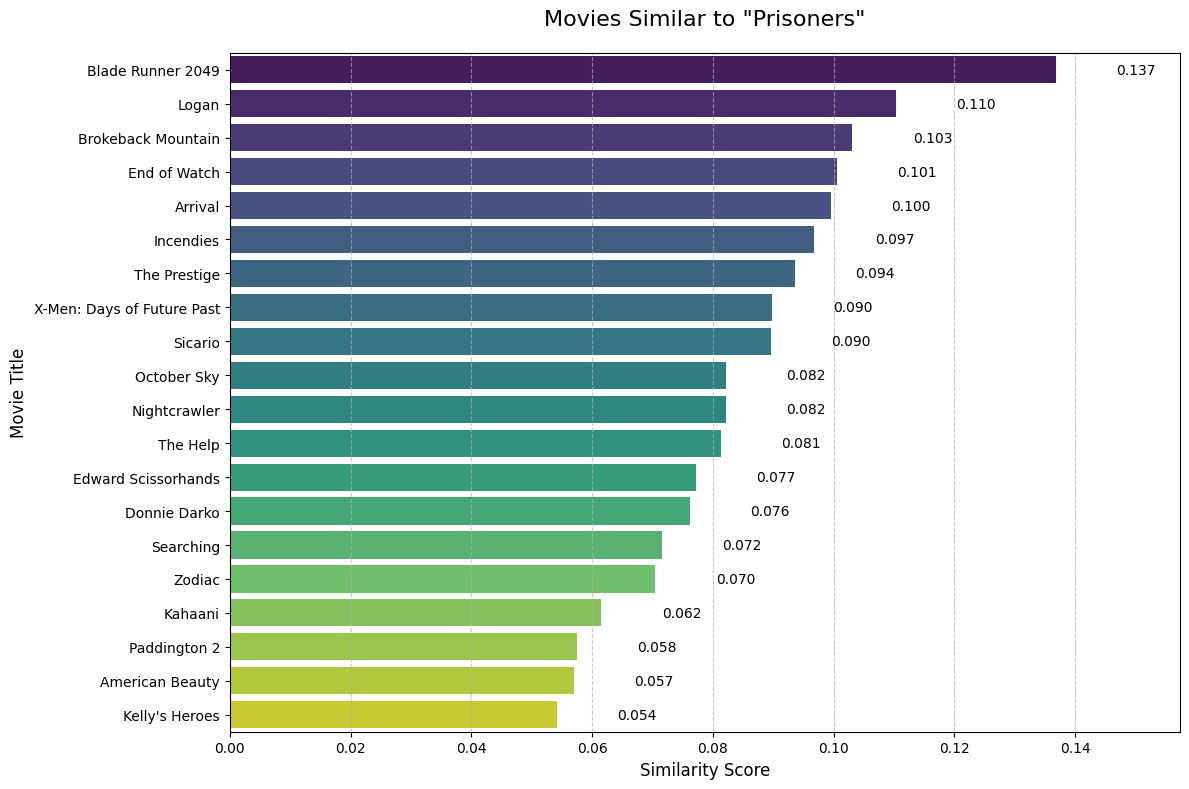

Series_Title  \
340           Blade Runner 2049   
202                       Logan   
773          Brokeback Mountain   
901                End of Watch   
476                     Arrival   
90                    Incendies   
36                 The Prestige   
479  X-Men: Days of Future Past   
893                     Sicario   
650                 October Sky   
474                Nightcrawler   
347                    The Help   
524         Edward Scissorhands   
382                Donnie Darko   
878                   Searching   
767                      Zodiac   
220                     Kahaani   
576                Paddington 2   
98              American Beauty   
991              Kelly's Heroes   

                                              Overview           Director  \
340  Young Blade Runner K's discovery of a long-bur...   Denis Villeneuve   
202  In a future where mutants are nearly extinct, ...      James Mangold   
773  The story of a forbidden and secretive relatio...            Ang Lee   
901  Shot documentary-style, this film follows the ...         David Ayer   
476  A linguist works with the military to communic...   Denis Villeneuve   
90   Twins journey to the Middle East to discover t...   Denis Villeneuve   
36   After a tragic accident, two stage magicians e...  Christopher Nolan   
479  The X-Men send Wolverine to the past in a desp...       Bryan Singer   
893  An idealistic FBI agent is enlisted by a gover...   Denis Villeneuve   
650  The true story of Homer Hickam, a coal miner's...       Joe Johnston   
474  When Louis Bloom, a con man desperate for work...         Dan Gilroy   
347  An aspiring author during the civil rights mov...        Tate Taylor   
524  An artificial man, who was incompletely constr...         Tim Burton   
382  After narrowly escaping a bizarre accident, a ...      Richard Kelly   
878  After his teenage daughter goes missing, a des...    Aneesh Chaganty   
767  In the late 1960s/early 1970s, a San Francisco...      David Fincher   
220  A pregnant woman's search for her missing husb...        Sujoy Ghosh   
576  Paddington (Ben Whishaw), now happily settled ...          Paul King   
98   A sexually frustrated suburban father has a mi...         Sam Mendes   
991  A group of U.S. soldiers sneaks across enemy l...    Brian G. Hutton   

               Star1                      Star2               Star3  \
340    Harrison Ford               Ryan Gosling        Ana de Armas   
202     Hugh Jackman            Patrick Stewart          Dafne Keen   
773  Jake Gyllenhaal               Heath Ledger   Michelle Williams   
901  Jake Gyllenhaal               Michael Peña       Anna Kendrick   
476        Amy Adams              Jeremy Renner     Forest Whitaker   
90      Lubna Azabal  Mélissa Désormeaux-Poulin      Maxim Gaudette   
36    Christian Bale               Hugh Jackman  Scarlett Johansson   
479  Patrick Stewart               Ian McKellen        Hugh Jackman   
893      Emily Blunt                Josh Brolin    Benicio Del Toro   
650  Jake Gyllenhaal               Chris Cooper          Laura Dern   
474  Jake Gyllenhaal                 Rene Russo         Bill Paxton   
347       Emma Stone                Viola Davis     Octavia Spencer   
524      Johnny Depp               Winona Ryder        Dianne Wiest   
382  Jake Gyllenhaal                Jena Malone      Mary McDonnell   
878         John Cho              Debra Messing          Joseph Lee   
767  Jake Gyllenhaal          Robert Downey Jr.        Mark Ruffalo   
220      Vidya Balan   Parambrata Chattopadhyay  Indraneil Sengupta   
576      Ben Whishaw                 Hugh Grant     Hugh Bonneville   
98      Kevin Spacey             Annette Bening         Thora Birch   
991   Clint Eastwood              Telly Savalas         Don Rickles   

     Similarity_Score  
340          0.136844  
202          0.110356  
773          0.103090  
901          0.100548  
476          0.099522  
90           0.096806  
36   

In [ ]:
run_movie_recommender(df, "Prisoners", 20)

Using Siamese Neural Networks

In [ ]:
import pandas as pd

# Load the file into a pandas DataFrame
df = pd.read_csv('imdb_top_1000.csv')

df.head(10)


Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   
5  https://m.media-amazon.com/images/M/MV5BNzA5ZD...   
6  https://m.media-amazon.com/images/M/MV5BNGNhMD...   
7  https://m.media-amazon.com/images/M/MV5BNDE4OT...   
8  https://m.media-amazon.com/images/M/MV5BMjAxMz...   
9  https://m.media-amazon.com/images/M/MV5BMmEzNT...   

                                    Series_Title Released_Year Certificate  \
0                       The Shawshank Redemption          1994           A   
1                                  The Godfather          1972           A   
2                                The Dark Knight          2008          UA   
3                         The Godfather: Part II          1974           A   
4                                   12 Angry Men          1957           U   
5  The Lord of the Rings: The Return of the King          2003           U   
6                                   Pulp Fiction          1994           A   
7                               Schindler's List          1993           A   
8                                      Inception          2010          UA   
9                                     Fight Club          1999           A   

   Runtime                      Genre  IMDB_Rating  \
0  142 min                      Drama          9.3   
1  175 min               Crime, Drama          9.2   
2  152 min       Action, Crime, Drama          9.0   
3  202 min               Crime, Drama          9.0   
4   96 min               Crime, Drama          9.0   
5  201 min   Action, Adventure, Drama          8.9   
6  154 min               Crime, Drama          8.9   
7  195 min  Biography, Drama, History          8.9   
8  148 min  Action, Adventure, Sci-Fi          8.8   
9  139 min                      Drama          8.8   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   
5  Gandalf and Aragorn lead the World of Men agai...        94.0   
6  The lives of two mob hitmen, a boxer, a gangst...        94.0   
7  In German-occupied Poland during World War II,...        94.0   
8  A thief who steals corporate secrets through t...        74.0   
9  An insomniac office worker and a devil-may-car...        66.0   

               Director              Star1                 Star2  \
0        Frank Darabont        Tim Robbins        Morgan Freeman   
1  Francis Ford Coppola      Marlon Brando             Al Pacino   
2     Christopher Nolan     Christian Bale          Heath Ledger   
3  Francis Ford Coppola          Al Pacino        Robert De Niro   
4          Sidney Lumet        Henry Fonda           Lee J. Cobb   
5         Peter Jackson        Elijah Wood       Viggo Mortensen   
6     Quentin Tarantino      John Travolta           Uma Thurman   
7      Steven Spielberg        Liam Neeson         Ralph Fiennes   
8     Christopher Nolan  Leonardo DiCaprio  Joseph Gordon-Levitt   
9         David Fincher          Brad Pitt         Edward Norton   

               Star3             Star4  
0         Bob Gunton    William Sadler  
1         James Caan      Diane Keaton  
2      Aaron Eckhart     Michael Caine  
3      Robert Duvall      Diane Keaton  
4      Martin Balsam      John Fiedler  
5       Ian McKellen     Orlando Bloom  
6  Samuel L. Jackson      Bruce Willis  
7       Ben Kingsley  Caroline Goodall  
8        Elliot Page      Ken Watanabe  
9          Meat Loaf      Zach Grenier

In [ ]:
import random

def calculate_similarity(movie1, movie2):
    """
    Calculate similarity between two movies by counting matching features
    Without weights - all features are treated equally
    """
    similarity = 0
    if movie1['Overview'] == movie2['Overview']:
        similarity += 1
    if movie1['Star1'] == movie2['Star1']:
        similarity += 1
    if movie1['Director'] == movie2['Director']:
        similarity += 1
    if movie1['Star2'] == movie2['Star2']:
        similarity += 1
    if movie1['Star3'] == movie2['Star3']:
        similarity += 1

    return similarity

def create_movie_pairs(df):
    """
    Create pairs of similar and dissimilar movies for training
    All features are treated equally (no weights)
    """
    movie_pairs = []
    labels = []

    # Group movies by genre
    grouped_movies = df.groupby('Genre')

    # Total number of features we're comparing
    total_features = 5  # Overview, Star1, Director, Star2, Star3

    # Threshold is now half of total features (without weights)
    similarity_threshold = total_features / 2

    for genre, movies in grouped_movies:
        for i in range(len(movies)):
            movie1 = movies.iloc[i]
            for j in range(i + 1, len(movies)):
                movie2 = movies.iloc[j]
                similarity = calculate_similarity(movie1, movie2)

                # Consider movies similar if they match on at least half of features
                if similarity >= similarity_threshold:
                    movie_pairs.append((movie1['Series_Title'], movie2['Series_Title']))
                    labels.append(1)

    # Create negative pairs (dissimilar movies)
    movie_titles = df['Series_Title'].unique()
    for _ in range(len(movie_pairs)):
        title1, title2 = random.sample(list(movie_titles), 2)
        movie1 = df[df['Series_Title'] == title1].iloc[0]
        movie2 = df[df['Series_Title'] == title2].iloc[0]
        if movie1['Genre'] != movie2['Genre']:
            movie_pairs.append((title1, title2))
            labels.append(0)

    return movie_pairs, labels

# Generate pairs and labels
movie_pairs, labels = create_movie_pairs(df)




In [ ]:
from transformers import BertModel, BertTokenizer
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

# Define a dataset class
class MoviePairDataset(Dataset):
    def __init__(self, movie_pairs, labels, df, tokenizer, model):
        self.movie_pairs = movie_pairs
        self.labels = labels
        self.df = df
        self.tokenizer = tokenizer
        self.model = model

    def __len__(self):
        return len(self.movie_pairs)

    def __getitem__(self, idx):
        title1, title2 = self.movie_pairs[idx]
        label = self.labels[idx]

        movie1 = self.df[self.df['Series_Title'] == title1].iloc[0]
        movie2 = self.df[self.df['Series_Title'] == title2].iloc[0]

        embedding1 = self.get_movie_embedding(movie1)
        embedding2 = self.get_movie_embedding(movie2)

        return embedding1, embedding2, label

    def get_movie_embedding(self, movie):
        text = f"{movie['Series_Title']} {movie['Overview']} {movie['Star1']} {movie['Director']} {movie['Star2']} {movie['Star3']}"
        inputs = self.tokenizer(text, return_tensors='pt', max_length=128, truncation=True, padding='max_length')
        outputs = self.model(**inputs)
        embedding = outputs.last_hidden_state[:, 0, :]
        return embedding

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Create the dataset and dataloader
dataset = MoviePairDataset(movie_pairs, labels, df, tokenizer, model)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the Siamese Network
class SiameseNetwork(nn.Module):
    def __init__(self, embedding_dim):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(embedding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )

    def forward(self, x):
        return self.fc(x)

embedding_dim = 768  # BERT embedding dimension
siamese_network = SiameseNetwork(embedding_dim)

# Define the training loop
def train_siamese_network(dataloader, siamese_network, epochs=3 ):
    optimizer = torch.optim.Adam(siamese_network.parameters(), lr=0.001)
    for epoch in range(epochs):
        total_loss = 0
        for embedding1, embedding2, label in dataloader:
            optimizer.zero_grad()
            output1 = siamese_network(embedding1)
            output2 = siamese_network(embedding2)
            loss = contrastive_loss(output1, output2, label)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(dataloader)}")

# Contrastive loss function
def contrastive_loss(embedding1, embedding2, label, margin=1.0):
    distance = F.pairwise_distance(embedding1, embedding2)
    loss = (label) * torch.pow(distance, 2) + \
           (1 - label) * torch.pow(torch.clamp(margin - distance, min=0.0), 2)
    return loss.mean()

# Train the model
train_siamese_network(dataloader, siamese_network)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1/3, Loss: 0.41034290194511414
Epoch 2/3, Loss: 0.24982372671365738
Epoch 3/3, Loss: 0.2877507954835892


In [ ]:
def recommend_movies(input_movie_name, df, siamese_network, tokenizer, model):
    input_movie = df[df['Series_Title'] == input_movie_name].iloc[0]
    input_embedding = get_movie_embedding(input_movie, tokenizer, model)
    input_embedding = siamese_network(input_embedding)

    similarities = []
    for _, movie in df.iterrows():
        if movie['Genre'] == input_movie['Genre']:  # Ensure the same genre
            movie_embedding = get_movie_embedding(movie, tokenizer, model)
            movie_embedding = siamese_network(movie_embedding)
            similarity = F.cosine_similarity(input_embedding, movie_embedding).item()
            similarities.append((movie['Series_Title'], similarity))

    # Sort by similarity
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Create a DataFrame for the top 20 recommendations
    recommendations_df = pd.DataFrame(similarities[:20], columns=['Series_Title', 'Cosine Similarity'])
    return recommendations_df

def get_movie_embedding(movie, tokenizer, model):
    text = f"{movie['Series_Title']} {movie['Overview']} {movie['Star1']} {movie['Director']} {movie['Star2']} {movie['Star3']}"
    inputs = tokenizer(text, return_tensors='pt', max_length=128, truncation=True, padding='max_length')
    outputs = model(**inputs)
    embedding = outputs.last_hidden_state[:, 0, :]
    return embedding







In [ ]:
# Example usage
input_movie_name = "Prisoners"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                       Series_Title  Cosine Similarity
0                         Prisoners           1.000000
1                       Le samouraï           0.980165
2          In the Heat of the Night           0.979021
3                      Contratiempo           0.973558
4       Witness for the Prosecution           0.972865
5                 Der Name der Rose           0.965741
6               La migliore offerta           0.958697
7   The Girl with the Dragon Tattoo           0.955464
8                        Inside Man           0.953187
9               Glengarry Glen Ross           0.951754
10                   Gone Baby Gone           0.950293
11                             Rope           0.950272
12              Anatomy of a Murder           0.948328
13                L.A. Confidential           0.939663
14            Män som hatar kvinnor           0.938037
15                       Wind River           0.933476
16                      Primal Fear           0.928952
17        

**Movie recommendation for porsline**

Soroush Bajogli

 Popstar: Never Stop Never Stopping فیلم حنثی

based on good score

Top 20 movies similar to 'Groundhog Day':
              Series_Title  Similarity_Score
                Short Cuts          0.276379
          Harold and Maude          0.101445
             The Gold Rush          0.096163
          Edge of Tomorrow          0.077844
               The Visitor          0.075747
              Mary and Max          0.073189
          The Long Goodbye          0.071714
            A Star Is Born          0.069444
         Midnight in Paris          0.065974
                  Rushmore          0.065383
              Ghostbusters          0.061292
             Despicable Me          0.060371
       Lost in Translation          0.058236
         Fantastic Mr. Fox          0.056062
                   Platoon          0.055298
  The Grand Budapest Hotel          0.047416
           Smultronstället          0.046832
             La dolce vita          0.046161
                   Amadeus          0.045008
La double vie de Véronique          0.043567


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


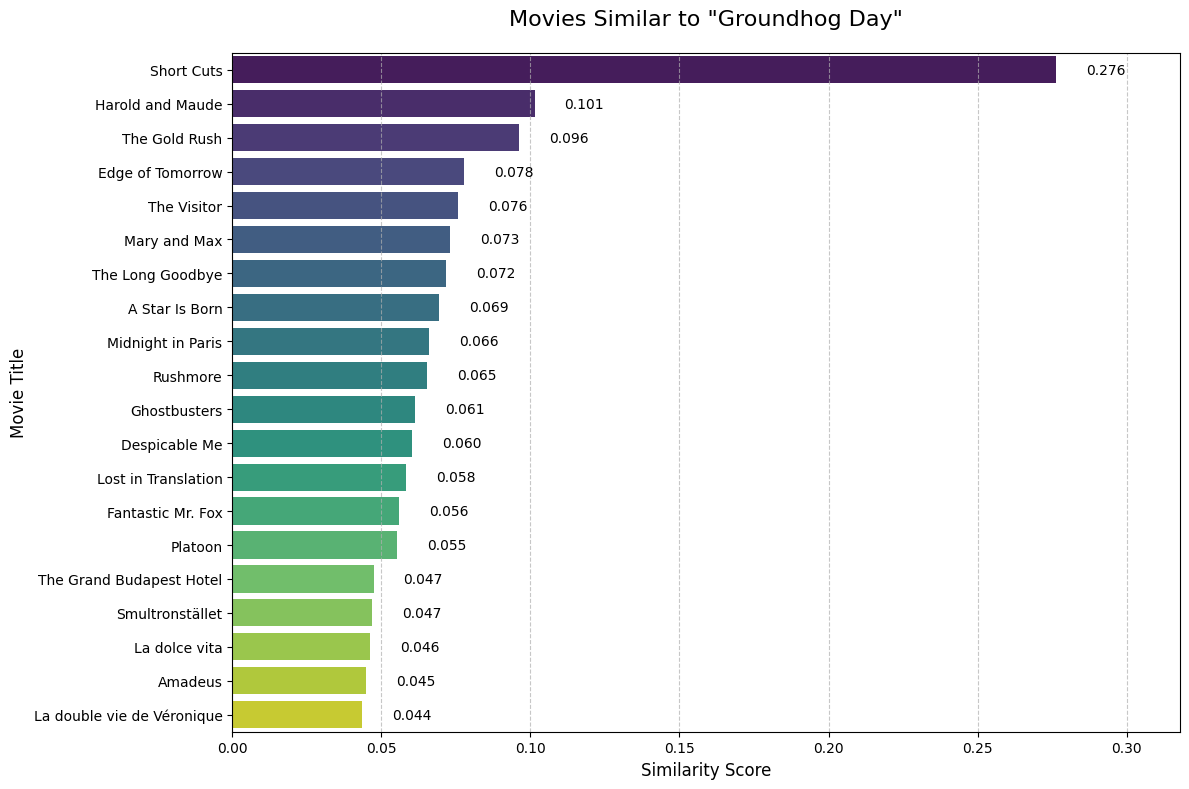

Series_Title  \
817                  Short Cuts   
541            Harold and Maude   
193               The Gold Rush   
482            Edge of Tomorrow   
916                 The Visitor   
229                Mary and Max   
989            The Long Goodbye   
903              A Star Is Born   
743           Midnight in Paris   
803                    Rushmore   
685                Ghostbusters   
906               Despicable Me   
780         Lost in Translation   
499           Fantastic Mr. Fox   
268                     Platoon   
209    The Grand Budapest Hotel   
184             Smultronstället   
435               La dolce vita   
107                     Amadeus   
668  La double vie de Véronique   

                                              Overview              Director  \
817  The day-to-day lives of several suburban Los A...         Robert Altman   
541  Young, rich, and obsessed with death, Harold f...             Hal Ashby   
193  A prospector goes to the Klondike in search of...       Charles Chaplin   
482  A soldier fighting aliens gets to relive the s...            Doug Liman   
916  A college professor travels to New York City t...          Tom McCarthy   
229  A tale of friendship between two unlikely pen ...           Adam Elliot   
989  Private investigator Philip Marlowe helps a fr...         Robert Altman   
903  A musician helps a young singer find fame as a...        Bradley Cooper   
743  While on a trip to Paris with his fiancée's fa...           Woody Allen   
803  The extracurricular king of Rushmore Preparato...          Wes Anderson   
685  Three former parapsychology professors set up ...          Ivan Reitman   
906  When a criminal mastermind uses a trio of orph...         Pierre Coffin   
780  A faded movie star and a neglected young woman...         Sofia Coppola   
499  An urbane fox cannot resist returning to his f...          Wes Anderson   
268  Chris Taylor, a neophyte recruit in Vietnam, f...          Oliver Stone   
209  A writer encounters the owner of an aging high...          Wes Anderson   
184  After living a life marked by coldness, an agi...        Ingmar Bergman   
435  A series of stories following a week in the li...      Federico Fellini   
107  The life, success and troubles of Wolfgang Ama...          Milos Forman   
668  Two parallel stories about two identical women...  Krzysztof Kieslowski   

                    Star1                   Star2                 Star3  \
817       Andie MacDowell          Julianne Moore           Tim Robbins   
541           Ruth Gordon                Bud Cort        Vivian Pickles   
193       Charles Chaplin              Mack Swain            Tom Murray   
482            Tom Cruise             Emily Blunt           Bill Paxton   
916       Richard Jenkins            Haaz Sleiman          Danai Gurira   
229         Toni Collette  Philip Seymour Hoffman             Eric Bana   
989         Elliott Gould       Nina van Pallandt       Sterling Hayden   
903             Lady Gaga          Bradley Cooper           Sam Elliott   
743           Owen Wilson          Rachel McAdams           Kathy Bates   
803     Jason Schwartzman             Bill Murray       Olivia Williams   
685           Bill Murray             Dan Aykroyd      Sigourney Weaver   
906          Chris Renaud            Steve Carell           Jason Segel   
780           Bill Murray      Scarlett Johansson       Giovanni Ribisi   
499        George Clooney            Meryl Streep           Bill Murray   
268         Charlie Sheen            Tom Berenger          Willem Dafoe   
209         Ralph Fiennes       F. Murray Abraham       Mathieu Amalric   
184       Victor Sjöström          Bibi Andersson         Ingrid Thulin   
435  Marcello Mastroianni            Anita Ekberg           Anouk Aimée   
107     F. Murray Abraham               Tom Hulce    Elizabeth Berridge   
668           Irène Jacob      Wladyslaw Kowalski  Halina Gryglaszewska   

     Similarity_Score  
81

In [ ]:

run_movie_recommender(df, 'Groundhog Day', 20)

In [ ]:
# Example usage
input_movie_name = "Groundhog Day"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

               Series_Title  Cosine Similarity
0             Groundhog Day           1.000000
1  The Purple Rose of Cairo           0.961083
2         Midnight in Paris           0.953006


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Groundhog Day"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Groundhog Day':
Recommended movie: Midnight in Paris
Similarity score: 0.9530
Source: Both approaches


Based on bad scores

Top 20 movies similar to 'Shaun of the Dead':
                         Series_Title  Similarity_Score
                             Hot Fuzz          0.414443
                            Star Trek          0.106522
                          Baby Driver          0.105393
                 The Bourne Ultimatum          0.078923
                            Tombstone          0.070044
                         The Notebook          0.067412
                          Frost/Nixon          0.065657
                    Finding Neverland          0.063072
Eternal Sunshine of the Spotless Mind          0.059537
                         Vikram Vedha          0.059141
                              Yip Man          0.058659
                         The Thin Man          0.058628
                              Titanic          0.056015
                    The Thin Red Line          0.054869
                           Zombieland          0.054162
                         Forrest Gump          0.053568
  

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


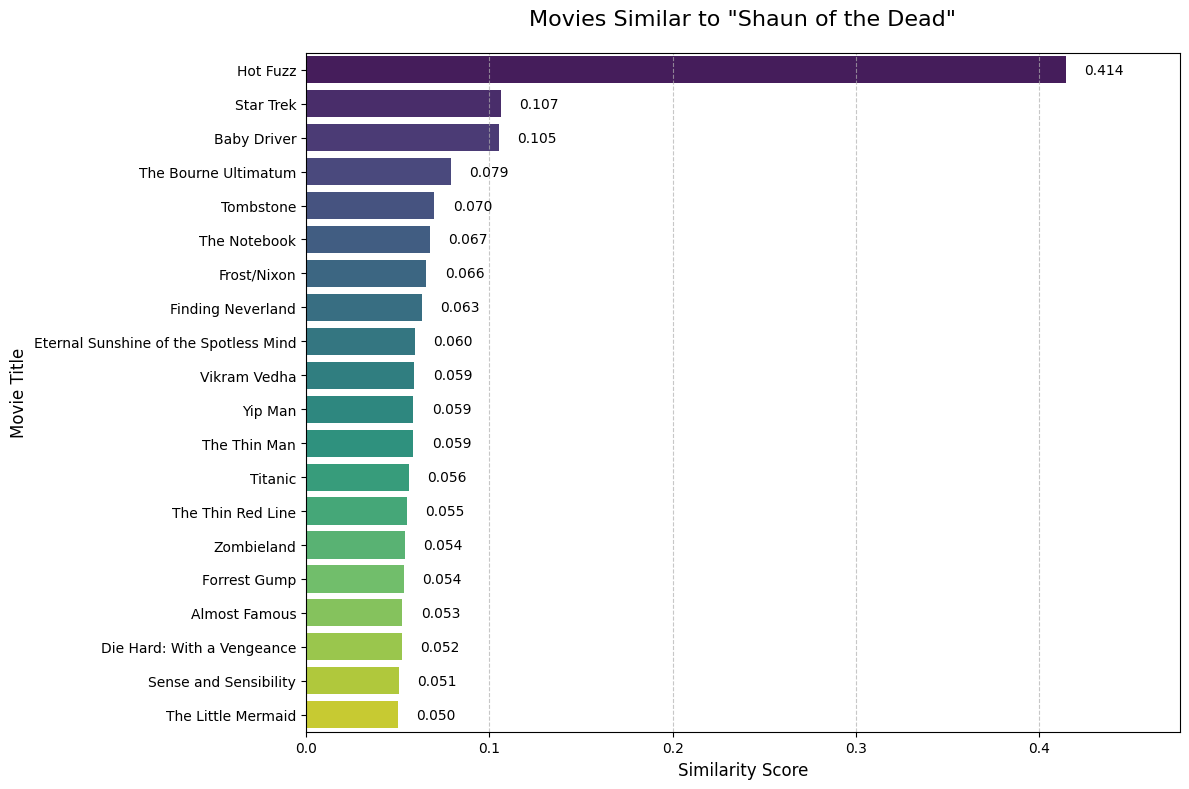

Series_Title  \
627                               Hot Fuzz   
493                              Star Trek   
888                            Baby Driver   
362                   The Bourne Ultimatum   
659                              Tombstone   
637                           The Notebook   
757                            Frost/Nixon   
940                      Finding Neverland   
94   Eternal Sunshine of the Spotless Mind   
55                            Vikram Vedha   
351                                Yip Man   
460                           The Thin Man   
652                                Titanic   
955                      The Thin Red Line   
912                             Zombieland   
11                            Forrest Gump   
514                          Almost Famous   
963             Die Hard: With a Vengeance   
962                  Sense and Sensibility   
976                     The Little Mermaid   

                                              Overview            Director  \
627  A skilled London police officer is transferred...        Edgar Wright   
493  The brash James T. Kirk tries to live up to hi...         J.J. Abrams   
888  After being coerced into working for a crime b...        Edgar Wright   
362  Jason Bourne dodges a ruthless C.I.A. official...     Paul Greengrass   
659  A successful lawman's plans to retire anonymou...  George P. Cosmatos   
637  A poor yet passionate young man falls in love ...     Nick Cassavetes   
757  A dramatic retelling of the post-Watergate tel...          Ron Howard   
940  The story of Sir J.M. Barrie's friendship with...        Marc Forster   
94   When their relationship turns sour, a couple u...       Michel Gondry   
55   Vikram, a no-nonsense police officer, accompan...             Gayatri   
351  During the Japanese invasion of China, a wealt...          Wilson Yip   
460  Former detective Nick Charles and his wealthy ...       W.S. Van Dyke   
652  A seventeen-year-old aristocrat falls in love ...       James Cameron   
955  Adaptation of James Jones' autobiographical 19...     Terrence Malick   
912  A shy student trying to reach his family in Oh...     Ruben Fleischer   
11   The presidencies of Kennedy and Johnson, the e...     Robert Zemeckis   
514  A high-school boy is given the chance to write...       Cameron Crowe   
963  John McClane and a Harlem store owner are targ...      John McTiernan   
962  Rich Mr. Dashwood dies, leaving his second wif...             Ang Lee   
976  A mermaid princess makes a Faustian bargain in...        Ron Clements   

                 Star1           Star2               Star3  Similarity_Score  
627         Simon Pegg      Nick Frost      Martin Freeman          0.414443  
493         Chris Pine  Zachary Quinto          Simon Pegg          0.106522  
888       Ansel Elgort    Jon Bernthal            Jon Hamm          0.105393  
362         Matt Damon   Edgar Ramírez          Joan Allen          0.078923  
659        Kevin Jarre    Kurt Russell          Val Kilmer          0.070044  
637      Gena Rowlands    James Garner      Rachel McAdams          0.067412  
757     Frank Langella   Michael Sheen         Kevin Bacon          0.065657  
940        Johnny Depp    Kate Winslet      Julie Christie          0.063072  
94          Jim Carrey    Kate Winslet       Tom Wilkinson          0.059537  
55             Pushkar        Madhavan    Vijay Sethupathi          0.059141  
351         Donnie Yen       Simon Yam        Siu-Wong Fan          0.058659  
460     William Powell       Myrna Loy  Maureen O'Sullivan          0.058628  
652  Leonardo DiCaprio    Kate Winslet          Billy Zane          0.056015  
955       Jim Caviezel       Sean Penn          Nick Nolte          0.054869  
912    Jesse Eisenberg      Emma Stone     Woody Harrelson          0.054162  
11           Tom Hanks    Robin Wright         Gary Sinise          0.053568  
514       Billy Crudup   Patrick Fugit         Kate Hudson          0.052576  
96

In [ ]:

run_movie_recommender(df, "Shaun of the Dead", 20)

In [ ]:
# Example usage
input_movie_name = "Shaun of the Dead"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                Series_Title  Cosine Similarity
0          Shaun of the Dead           1.000000
1  What We Do in the Shadows           0.791759


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Shaun of the Dead"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Shaun of the Dead':
Recommended movie: What We Do in the Shadows
Similarity score: 0.7918
Source: Siamese network


Soroush 2 (Ali Abbasi)

The Assassination of Jesse James by the Coward Robert Ford

**Good movies**

Top 20 movies similar to 'Prisoners':
              Series_Title  Similarity_Score
         Blade Runner 2049          0.136844
                     Logan          0.110356
        Brokeback Mountain          0.103090
              End of Watch          0.100548
                   Arrival          0.099522
                 Incendies          0.096806
              The Prestige          0.093602
X-Men: Days of Future Past          0.089850
                   Sicario          0.089619
               October Sky          0.082211
              Nightcrawler          0.082173
                  The Help          0.081309
       Edward Scissorhands          0.077251
              Donnie Darko          0.076208
                 Searching          0.071613
                    Zodiac          0.070495
                   Kahaani          0.061553
              Paddington 2          0.057516
           American Beauty          0.057026
            Kelly's Heroes          0.054218


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


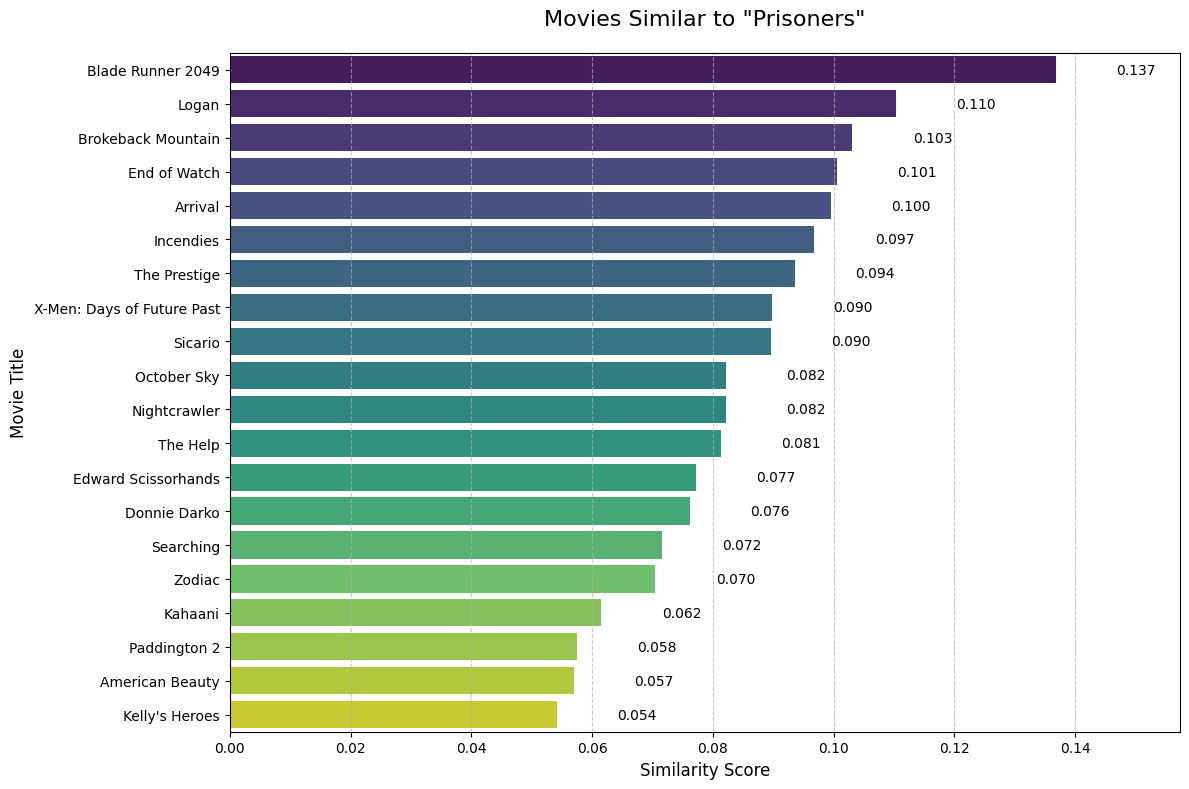

Series_Title  \
340           Blade Runner 2049   
202                       Logan   
773          Brokeback Mountain   
901                End of Watch   
476                     Arrival   
90                    Incendies   
36                 The Prestige   
479  X-Men: Days of Future Past   
893                     Sicario   
650                 October Sky   
474                Nightcrawler   
347                    The Help   
524         Edward Scissorhands   
382                Donnie Darko   
878                   Searching   
767                      Zodiac   
220                     Kahaani   
576                Paddington 2   
98              American Beauty   
991              Kelly's Heroes   

                                              Overview           Director  \
340  Young Blade Runner K's discovery of a long-bur...   Denis Villeneuve   
202  In a future where mutants are nearly extinct, ...      James Mangold   
773  The story of a forbidden and secretive relatio...            Ang Lee   
901  Shot documentary-style, this film follows the ...         David Ayer   
476  A linguist works with the military to communic...   Denis Villeneuve   
90   Twins journey to the Middle East to discover t...   Denis Villeneuve   
36   After a tragic accident, two stage magicians e...  Christopher Nolan   
479  The X-Men send Wolverine to the past in a desp...       Bryan Singer   
893  An idealistic FBI agent is enlisted by a gover...   Denis Villeneuve   
650  The true story of Homer Hickam, a coal miner's...       Joe Johnston   
474  When Louis Bloom, a con man desperate for work...         Dan Gilroy   
347  An aspiring author during the civil rights mov...        Tate Taylor   
524  An artificial man, who was incompletely constr...         Tim Burton   
382  After narrowly escaping a bizarre accident, a ...      Richard Kelly   
878  After his teenage daughter goes missing, a des...    Aneesh Chaganty   
767  In the late 1960s/early 1970s, a San Francisco...      David Fincher   
220  A pregnant woman's search for her missing husb...        Sujoy Ghosh   
576  Paddington (Ben Whishaw), now happily settled ...          Paul King   
98   A sexually frustrated suburban father has a mi...         Sam Mendes   
991  A group of U.S. soldiers sneaks across enemy l...    Brian G. Hutton   

               Star1                      Star2               Star3  \
340    Harrison Ford               Ryan Gosling        Ana de Armas   
202     Hugh Jackman            Patrick Stewart          Dafne Keen   
773  Jake Gyllenhaal               Heath Ledger   Michelle Williams   
901  Jake Gyllenhaal               Michael Peña       Anna Kendrick   
476        Amy Adams              Jeremy Renner     Forest Whitaker   
90      Lubna Azabal  Mélissa Désormeaux-Poulin      Maxim Gaudette   
36    Christian Bale               Hugh Jackman  Scarlett Johansson   
479  Patrick Stewart               Ian McKellen        Hugh Jackman   
893      Emily Blunt                Josh Brolin    Benicio Del Toro   
650  Jake Gyllenhaal               Chris Cooper          Laura Dern   
474  Jake Gyllenhaal                 Rene Russo         Bill Paxton   
347       Emma Stone                Viola Davis     Octavia Spencer   
524      Johnny Depp               Winona Ryder        Dianne Wiest   
382  Jake Gyllenhaal                Jena Malone      Mary McDonnell   
878         John Cho              Debra Messing          Joseph Lee   
767  Jake Gyllenhaal          Robert Downey Jr.        Mark Ruffalo   
220      Vidya Balan   Parambrata Chattopadhyay  Indraneil Sengupta   
576      Ben Whishaw                 Hugh Grant     Hugh Bonneville   
98      Kevin Spacey             Annette Bening         Thora Birch   
991   Clint Eastwood              Telly Savalas         Don Rickles   

     Similarity_Score  
340          0.136844  
202          0.110356  
773          0.103090  
901          0.100548  
476          0.099522  
90           0.096806  
36   

In [ ]:

run_movie_recommender(df, "Prisoners", 20)

In [ ]:
# Example usage
input_movie_name = "Prisoners"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                       Series_Title  Cosine Similarity
0                         Prisoners           1.000000
1                        Inside Man           0.983652
2                       Primal Fear           0.976215
3                        Wind River           0.975926
4                    Salinui chueok           0.970812
5                      Contratiempo           0.969792
6                      Mystic River           0.965100
7                             Se7en           0.964122
8          In the Heat of the Night           0.959795
9                 L.A. Confidential           0.959698
10              Anatomy of a Murder           0.957217
11                           Zodiac           0.953903
12              La migliore offerta           0.952007
13  The Girl with the Dragon Tattoo           0.951254
14      Witness for the Prosecution           0.950233
15                   Gone Baby Gone           0.949926
16                Der Name der Rose           0.949232
17        

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Prisoners"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Prisoners':
Recommended movie: Zodiac
Similarity score: 0.9539
Source: Both approaches


Bad movie

Top 20 movies similar to 'Spotlight':
           Series_Title  Similarity_Score
    The Boondock Saints          0.130891
  A Man for All Seasons          0.130357
        Le Petit Prince          0.092813
           Sherlock Jr.          0.089711
     The Blues Brothers          0.081996
         Shutter Island          0.081439
      Midnight in Paris          0.080377
           The Notebook          0.075729
        Sherlock Holmes          0.073753
            Dark Waters          0.071668
             C.R.A.Z.Y.          0.071028
             About Time          0.070500
            The Visitor          0.066698
         The Green Mile          0.065133
            The General          0.063899
                   Togo          0.063809
                 Zodiac          0.062482
              Apollo 13          0.061948
The Godfather: Part III          0.057105
      The Station Agent          0.054774


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


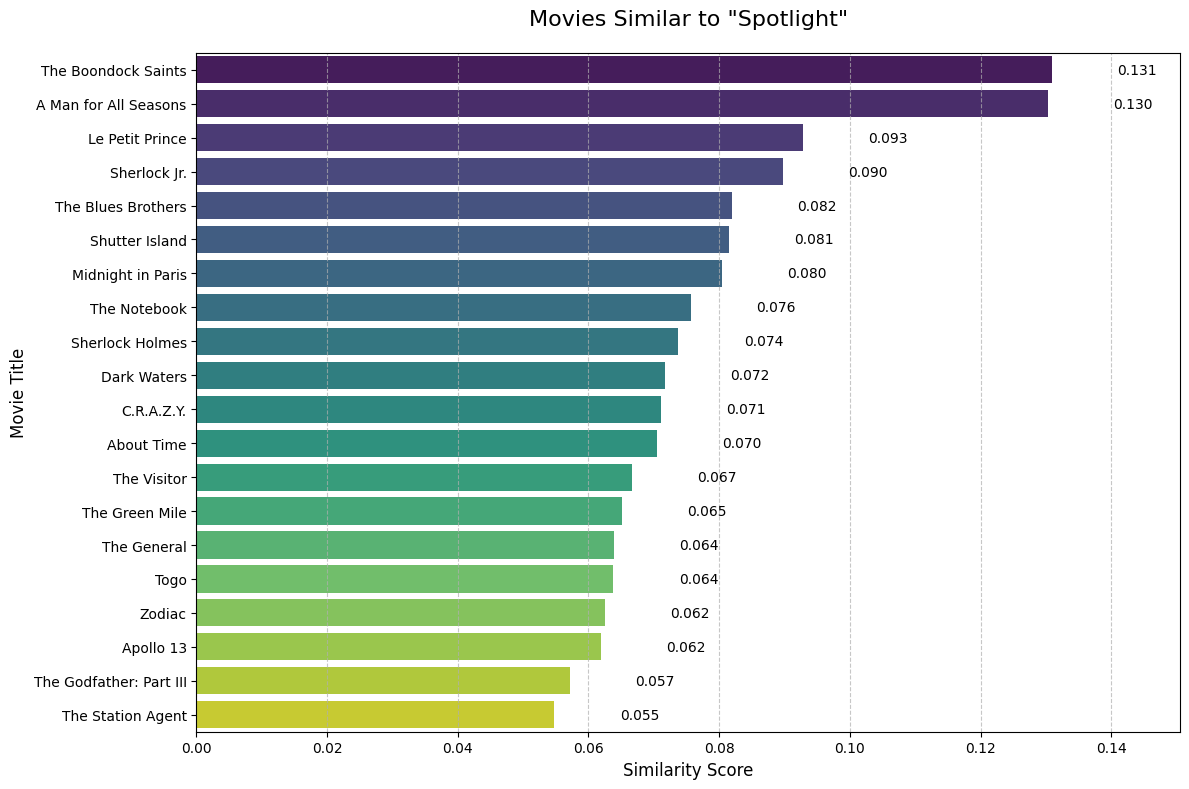

Series_Title  \
648      The Boondock Saints   
858    A Man for All Seasons   
741          Le Petit Prince   
194             Sherlock Jr.   
532       The Blues Brothers   
145           Shutter Island   
743        Midnight in Paris   
637             The Notebook   
914          Sherlock Holmes   
877              Dark Waters   
500               C.R.A.Z.Y.   
593               About Time   
916              The Visitor   
25            The Green Mile   
320              The General   
323                     Togo   
767                   Zodiac   
966                Apollo 13   
974  The Godfather: Part III   
937        The Station Agent   

                                              Overview              Director  \
648  Two Irish Catholic brothers become vigilantes ...            Troy Duffy   
858  The story of Sir Thomas More, who stood up to ...        Fred Zinnemann   
741  A little girl lives in a very grown-up world w...          Mark Osborne   
194  A film projectionist longs to be a detective, ...         Buster Keaton   
532  Jake Blues, just released from prison, puts to...           John Landis   
145  In 1954, a U.S. Marshal investigates the disap...       Martin Scorsese   
743  While on a trip to Paris with his fiancée's fa...           Woody Allen   
637  A poor yet passionate young man falls in love ...       Nick Cassavetes   
914  Detective Sherlock Holmes and his stalwart par...           Guy Ritchie   
877  A corporate defense attorney takes on an envir...           Todd Haynes   
500  A young French-Canadian, growing up in the 196...      Jean-Marc Vallée   
593  At the age of 21, Tim discovers he can travel ...        Richard Curtis   
916  A college professor travels to New York City t...          Tom McCarthy   
25   The lives of guards on Death Row are affected ...        Frank Darabont   
320  When Union spies steal an engineer's beloved l...        Clyde Bruckman   
323  The story of Togo, the sled dog who led the 19...          Ericson Core   
767  In the late 1960s/early 1970s, a San Francisco...         David Fincher   
966  NASA must devise a strategy to return Apollo 1...            Ron Howard   
974  Follows Michael Corleone, now in his 60s, as h...  Francis Ford Coppola   
937  When his only friend dies, a man born with dwa...          Tom McCarthy   

                 Star1                  Star2                  Star3  \
648       Willem Dafoe   Sean Patrick Flanery          Norman Reedus   
858      Paul Scofield           Wendy Hiller            Robert Shaw   
741       Jeff Bridges          Mackenzie Foy         Rachel McAdams   
194      Buster Keaton        Kathryn McGuire             Joe Keaton   
532       John Belushi            Dan Aykroyd           Cab Calloway   
145  Leonardo DiCaprio         Emily Mortimer           Mark Ruffalo   
743        Owen Wilson         Rachel McAdams            Kathy Bates   
637      Gena Rowlands           James Garner         Rachel McAdams   
914  Robert Downey Jr.               Jude Law         Rachel McAdams   
877       Mark Ruffalo          Anne Hathaway            Tim Robbins   
500        Michel Côté     Marc-André Grondin        Danielle Proulx   
593   Domhnall Gleeson         Rachel McAdams             Bill Nighy   
916    Richard Jenkins           Haaz Sleiman           Danai Gurira   
25           Tom Hanks  Michael Clarke Duncan            David Morse   
320      Buster Keaton          Buster Keaton            Marion Mack   
323       Willem Dafoe     Julianne Nicholson  Christopher Heyerdahl   
767    Jake Gyllenhaal      Robert Downey Jr.           Mark Ruffalo   
966          Tom Hanks            Bill Paxton            Kevin Bacon   
974          Al Pacino           Diane Keaton            Andy Garcia   
937     Peter Dinklage      Patricia Clarkson        Bobby Cannavale   

     Similarity_Score  
648          0.130891  
858          0.130357  
741          0.092813  
194          0.089711  
532          0.081996  
145  

In [ ]:

run_movie_recommender(df, "Spotlight", 20)

In [ ]:
# Example usage
input_movie_name = "Spotlight"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                          Series_Title  Cosine Similarity
0                            Spotlight           1.000000
1                           Just Mercy           0.964600
2                                 Blow           0.958352
3                    American Gangster           0.932710
4            In the Name of the Father           0.932004
5                           Goodfellas           0.923290
6   Butch Cassidy and the Sundance Kid           0.922489
7                    Dog Day Afternoon           0.921003
8              The Wolf of Wall Street           0.914031
9                        Donnie Brasco           0.910064
10                             Serpico           0.909491
11                 Catch Me If You Can           0.907267
12                            Papillon           0.897359
13                          Changeling           0.896878
14                        The Irishman           0.871794
15                    Midnight Express           0.826558


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Spotlight"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Spotlight':
Recommended movie: Just Mercy
Similarity score: 0.9646
Source: Siamese network


مطهره وکیلی

Game Night

**Good movies**

Top 20 movies similar to 'Knives Out':
                         Series_Title  Similarity_Score
                    Blade Runner 2049          0.120803
                   The Maltese Falcon          0.102824
Harry Potter and the Sorcerer's Stone          0.095402
                           Home Alone          0.091793
      The Girl with the Dragon Tattoo          0.090068
                 The Royal Tenenbaums          0.087386
                               Gifted          0.087138
           Captain America: Civil War          0.084803
                        Incredibles 2          0.083280
                      The Incredibles          0.082954
                         The Avengers          0.079204
                              Skyfall          0.077339
                        The Godfather          0.075638
                                 Rush          0.072416
  Captain America: The Winter Soldier          0.071754
                       Shutter Island          0.069474
         

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


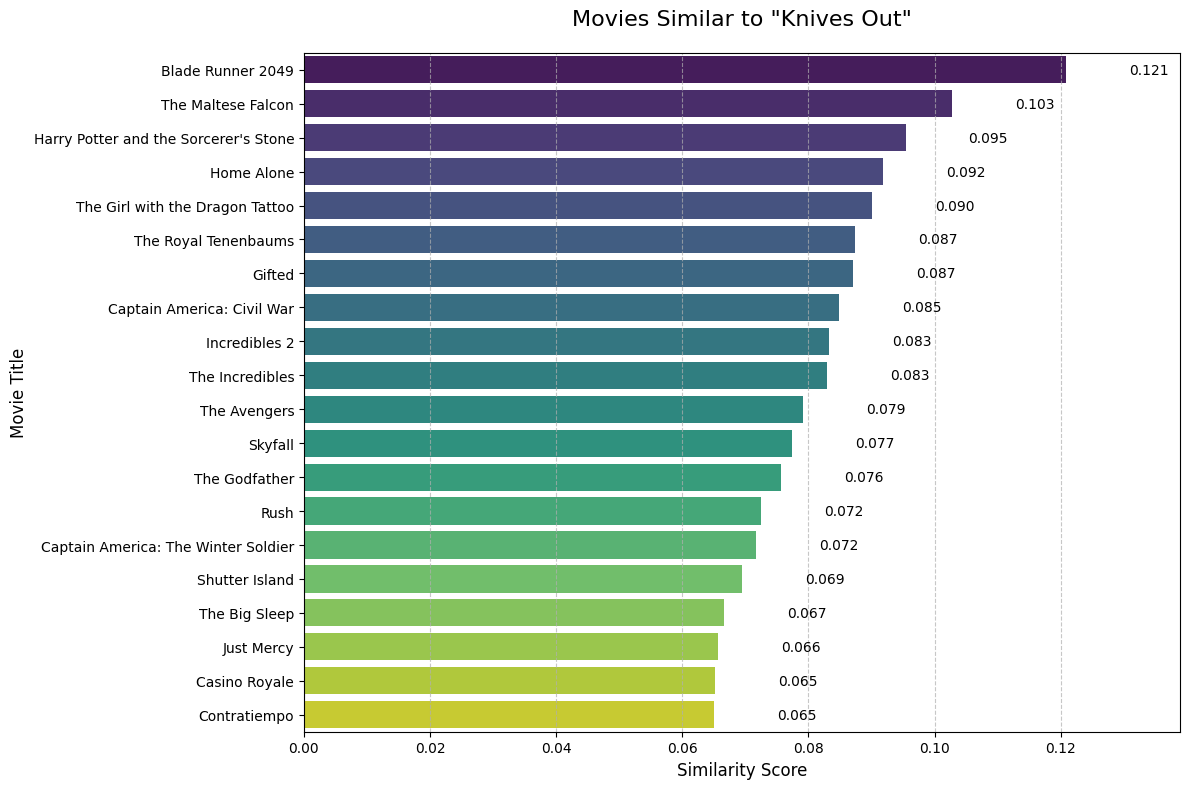

Series_Title  \
340                      Blade Runner 2049   
456                     The Maltese Falcon   
947  Harry Potter and the Sorcerer's Stone   
973                             Home Alone   
603        The Girl with the Dragon Tattoo   
945                   The Royal Tenenbaums   
883                                 Gifted   
583             Captain America: Civil War   
891                          Incredibles 2   
378                        The Incredibles   
357                           The Avengers   
751                                Skyfall   
1                            The Godfather   
216                                   Rush   
737    Captain America: The Winter Soldier   
145                         Shutter Island   
560                          The Big Sleep   
882                             Just Mercy   
368                          Casino Royale   
198                           Contratiempo   

                                              Overview               Director  \
340  Young Blade Runner K's discovery of a long-bur...       Denis Villeneuve   
456  A private detective takes on a case that invol...            John Huston   
947  An orphaned boy enrolls in a school of wizardr...         Chris Columbus   
973  An eight-year-old troublemaker must protect hi...         Chris Columbus   
603  Journalist Mikael Blomkvist is aided in his se...          David Fincher   
945  The eccentric members of a dysfunctional famil...           Wes Anderson   
883  Frank, a single man raising his child prodigy ...              Marc Webb   
583  Political involvement in the Avengers' affairs...          Anthony Russo   
891  The Incredibles family takes on a new mission ...              Brad Bird   
378  A family of undercover superheroes, while tryi...              Brad Bird   
357  Earth's mightiest heroes must come together an...            Joss Whedon   
751  James Bond's loyalty to M is tested when her p...             Sam Mendes   
1    An organized crime dynasty's aging patriarch t...   Francis Ford Coppola   
216  The merciless 1970s rivalry between Formula On...             Ron Howard   
737  As Steve Rogers struggles to embrace his role ...          Anthony Russo   
145  In 1954, a U.S. Marshal investigates the disap...        Martin Scorsese   
560  Private detective Philip Marlowe is hired by a...           Howard Hawks   
882  World-renowned civil rights defense attorney B...  Destin Daniel Cretton   
368  After earning 00 status and a licence to kill,...        Martin Campbell   
198  A successful entrepreneur accused of murder an...            Oriol Paulo   

                 Star1              Star2                Star3  \
340      Harrison Ford       Ryan Gosling         Ana de Armas   
456    Humphrey Bogart         Mary Astor        Gladys George   
947   Daniel Radcliffe       Rupert Grint       Richard Harris   
973    Macaulay Culkin          Joe Pesci         Daniel Stern   
603       Daniel Craig        Rooney Mara  Christopher Plummer   
945       Gene Hackman    Gwyneth Paltrow      Anjelica Huston   
883        Chris Evans      Mckenna Grace       Lindsay Duncan   
583          Joe Russo        Chris Evans    Robert Downey Jr.   
891    Craig T. Nelson       Holly Hunter         Sarah Vowell   
378    Craig T. Nelson  Samuel L. Jackson         Holly Hunter   
357  Robert Downey Jr.        Chris Evans   Scarlett Johansson   
751       Daniel Craig      Javier Bardem        Naomie Harris   
1        Marlon Brando          Al Pacino           James Caan   
216       Daniel Brühl    Chris Hemsworth         Olivia Wilde   
737          Joe Russo        Chris Evans    Samuel L. Jackson   
145  Leonardo DiCaprio     Emily Mortimer         Mark Ruffalo   
560    Humphrey Bogart      Lauren Bacall         John Ridgely   
882  Michael B. Jordan         Jamie Foxx          Brie Larson   
368       Daniel Craig          Eva Green           Judi Dench   
198        Mario Casas        Ana Wagener

In [ ]:

run_movie_recommender(df, "Knives Out", 20)

In [ ]:
# Example usage
input_movie_name = "Knives Out"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                                 Series_Title  Cosine Similarity
0                                  Knives Out           1.000000
1                                   In Bruges           0.983177
2                             American Psycho           0.972512
3   Three Billboards Outside Ebbing, Missouri           0.972288
4                                 Adams æbler           0.960228
5                                 After Hours           0.957785
6                                  Paper Moon           0.952311
7                          The King of Comedy           0.950874
8                               Do lok tin si           0.950312
9                            The Long Goodbye           0.946231
10                                Down by Law           0.945234
11                             Dom za vesanje           0.930384
12                                  The Sting           0.927586
13                            Rang De Basanti           0.849158
14                       

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Knives Out"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Knives Out':
Recommended movie: In Bruges
Similarity score: 0.9832
Source: Siamese network


**Bad Movie**

Top 20 movies similar to 'The Prestige':
              Series_Title  Similarity_Score
             Batman Begins          0.164547
     The Dark Knight Rises          0.134480
           The Dark Knight          0.125264
               Jojo Rabbit          0.101749
                   Dunkirk          0.099659
                       Her          0.095446
       Lost in Translation          0.095268
X-Men: Days of Future Past          0.094034
                 Prisoners          0.093602
         Empire of the Sun          0.090235
               Match Point          0.088092
              3:10 to Yuma          0.087100
                     Logan          0.087020
           Sherlock Holmes          0.086970
              The Avengers          0.086832
            Marriage Story          0.082187
                   Memento          0.079935
              Interstellar          0.079382
             The Machinist          0.078189
            Ford v Ferrari          0.077639


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


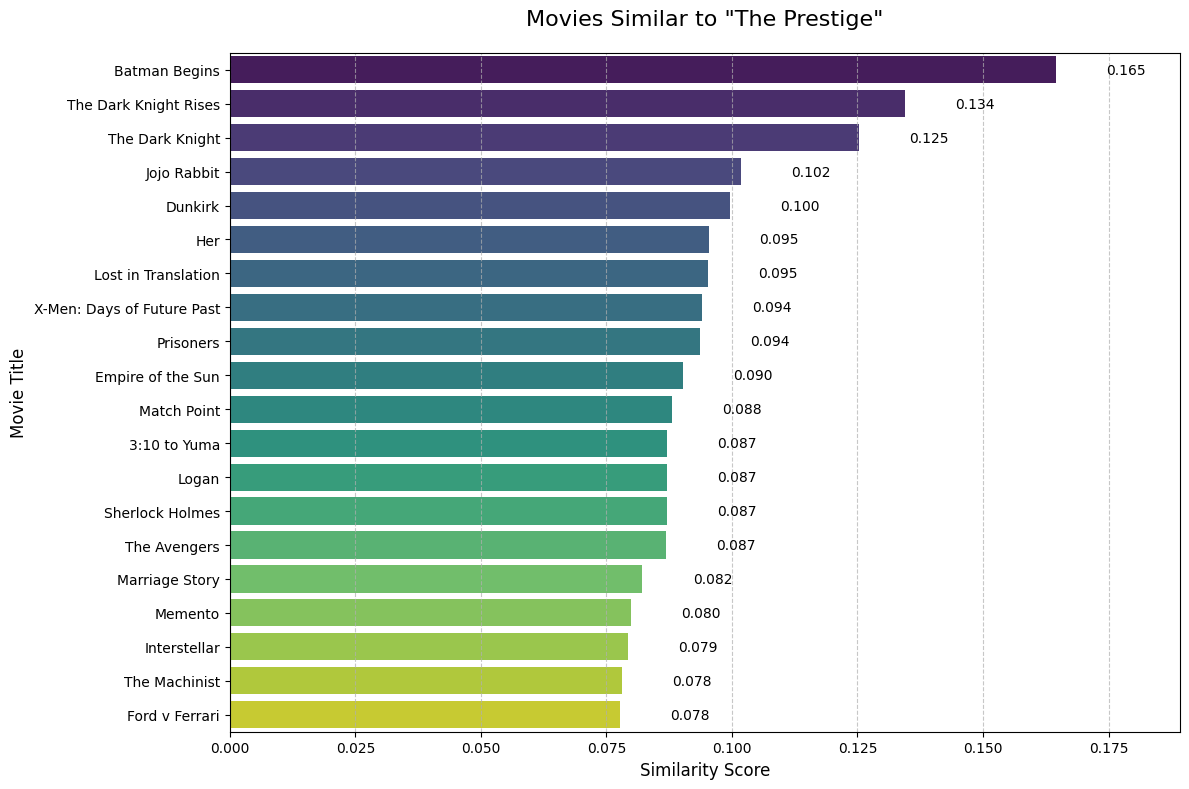

Series_Title  \
155               Batman Begins   
63        The Dark Knight Rises   
2               The Dark Knight   
475                 Jojo Rabbit   
573                     Dunkirk   
341                         Her   
780         Lost in Translation   
479  X-Men: Days of Future Past   
222                   Prisoners   
832           Empire of the Sun   
929                 Match Point   
774                3:10 to Yuma   
202                       Logan   
914             Sherlock Holmes   
357                The Avengers   
466              Marriage Story   
69                      Memento   
21                 Interstellar   
778               The Machinist   
217              Ford v Ferrari   

                                              Overview           Director  \
155  After training with his mentor, Batman begins ...  Christopher Nolan   
63   Eight years after the Joker's reign of anarchy...  Christopher Nolan   
2    When the menace known as the Joker wreaks havo...  Christopher Nolan   
475  A young boy in Hitler's army finds out his mot...      Taika Waititi   
573  Allied soldiers from Belgium, the British Empi...  Christopher Nolan   
341  In a near future, a lonely writer develops an ...        Spike Jonze   
780  A faded movie star and a neglected young woman...      Sofia Coppola   
479  The X-Men send Wolverine to the past in a desp...       Bryan Singer   
222  When Keller Dover's daughter and her friend go...   Denis Villeneuve   
832  A young English boy struggles to survive under...   Steven Spielberg   
929  At a turning point in his life, a former tenni...        Woody Allen   
774  A small-time rancher agrees to hold a captured...      James Mangold   
202  In a future where mutants are nearly extinct, ...      James Mangold   
914  Detective Sherlock Holmes and his stalwart par...        Guy Ritchie   
357  Earth's mightiest heroes must come together an...        Joss Whedon   
466  Noah Baumbach's incisive and compassionate loo...      Noah Baumbach   
69   A man with short-term memory loss attempts to ...  Christopher Nolan   
21   A team of explorers travel through a wormhole ...  Christopher Nolan   
778  An industrial worker who hasn't slept in a yea...      Brad Anderson   
217  American car designer Carroll Shelby and drive...      James Mangold   

                   Star1                 Star2                 Star3  \
155       Christian Bale         Michael Caine          Ken Watanabe   
63        Christian Bale             Tom Hardy         Anne Hathaway   
2         Christian Bale          Heath Ledger         Aaron Eckhart   
475  Roman Griffin Davis     Thomasin McKenzie    Scarlett Johansson   
573      Fionn Whitehead         Barry Keoghan          Mark Rylance   
341      Joaquin Phoenix             Amy Adams    Scarlett Johansson   
780          Bill Murray    Scarlett Johansson       Giovanni Ribisi   
479      Patrick Stewart          Ian McKellen          Hugh Jackman   
222         Hugh Jackman       Jake Gyllenhaal           Viola Davis   
832       Christian Bale        John Malkovich    Miranda Richardson   
929   Scarlett Johansson  Jonathan Rhys Meyers        Emily Mortimer   
774        Russell Crowe        Christian Bale            Ben Foster   
202         Hugh Jackman       Patrick Stewart            Dafne Keen   
914    Robert Downey Jr.              Jude Law        Rachel McAdams   
357    Robert Downey Jr.           Chris Evans    Scarlett Johansson   
466          Adam Driver    Scarlett Johansson           Julia Greer   
69            Guy Pearce      Carrie-Anne Moss        Joe Pantoliano   
21   Matthew McConaughey         Anne Hathaway      Jessica Chastain   
778       Christian Bale  Jennifer Jason Leigh  Aitana Sánchez-Gijón   
217           Matt Damon        Christian Bale          Jon Bernthal   

     Similarity_Score  
155          0.164547  
63           0.134480  
2            0.125264  
475          0.101749  
573          0.099659  
341     

In [ ]:

run_movie_recommender(df, "The Prestige", 20)

In [ ]:
# Example usage
input_movie_name = "The Prestige"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

    Series_Title  Cosine Similarity
0   The Prestige           1.000000
1   Donnie Darko           0.993420
2           Moon           0.972308
3        Solaris           0.944355
4  Abre los ojos           0.884260


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "The Prestige"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'The Prestige':
Recommended movie: Donnie Darko
Similarity score: 0.9934
Source: Siamese network


شهلا جعفری

Edge of Tomorrow

Good movies

Top 20 movies similar to 'Lethal Weapon':
                             Series_Title  Similarity_Score
                               Braveheart          0.166697
                         The Color Purple          0.098781
                    The French Connection          0.097952
                                Mad Max 2          0.088808
                               Apocalypto          0.085583
                                High Noon          0.084843
                                 Dead Man          0.084029
                                      Saw          0.083401
                              The Goonies          0.080525
                            Hacksaw Ridge          0.076273
                          Blazing Saddles          0.073194
                            Trainspotting          0.066597
                                  Flipped          0.059435
                                Okuribito          0.053469
                      Remember the Titans          0.05268

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


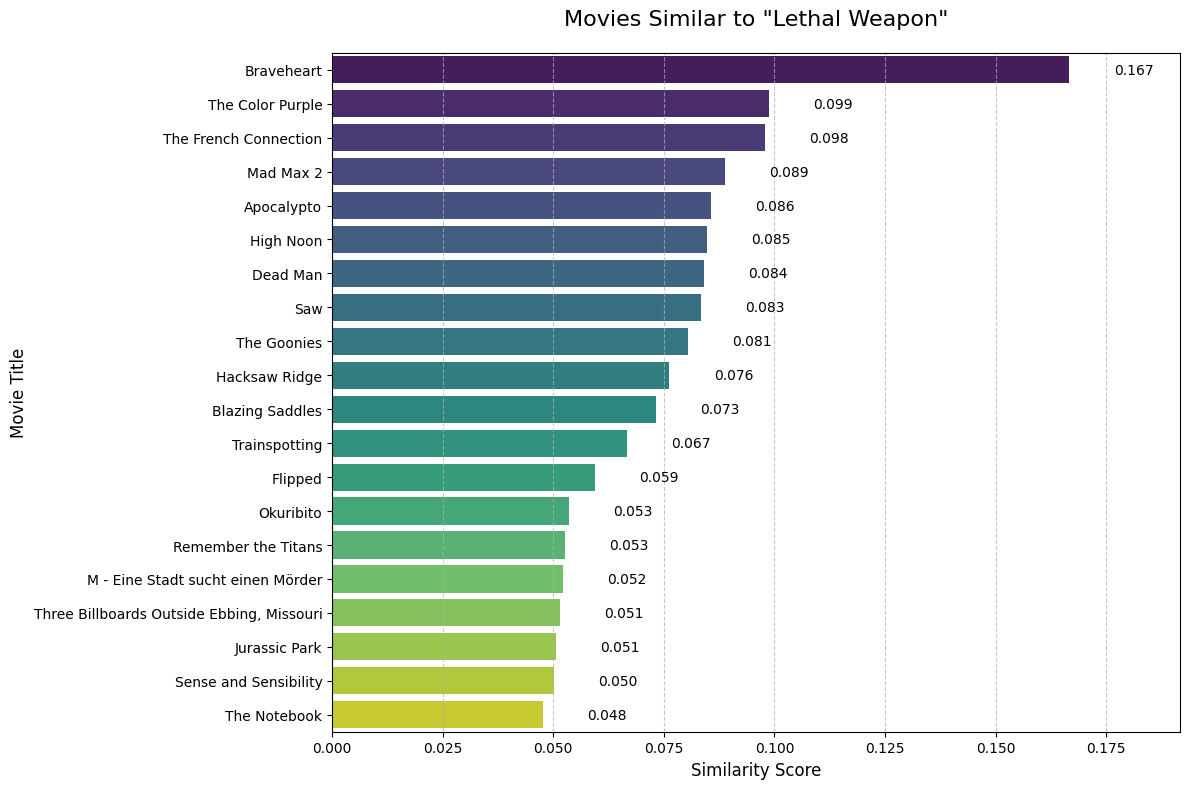

Series_Title  \
102                                 Braveheart   
682                           The Color Purple   
852                      The French Connection   
982                                  Mad Max 2   
625                                 Apocalypto   
555                                  High Noon   
964                                   Dead Man   
932                                        Saw   
681                                The Goonies   
212                              Hacksaw Ridge   
848                            Blazing Saddles   
254                              Trainspotting   
760                                    Flipped   
227                                  Okuribito   
644                        Remember the Titans   
125          M - Eine Stadt sucht einen Mörder   
132  Three Billboards Outside Ebbing, Missouri   
262                              Jurassic Park   
962                      Sense and Sensibility   
637                               The Notebook   

                                              Overview          Director  \
102  Scottish warrior William Wallace leads his cou...        Mel Gibson   
682  A black Southern woman struggles to find her i...  Steven Spielberg   
852  A pair of NYC cops in the Narcotics Bureau stu...  William Friedkin   
982  In the post-apocalyptic Australian wasteland, ...     George Miller   
625  As the Mayan kingdom faces its decline, a youn...        Mel Gibson   
555  A town Marshal, despite the disagreements of h...    Fred Zinnemann   
964  On the run after murdering a man, accountant W...      Jim Jarmusch   
932  Two strangers awaken in a room with no recolle...         James Wan   
681  A group of young misfits called The Goonies di...    Richard Donner   
212  World War II American Army Medic Desmond T. Do...        Mel Gibson   
848  In order to ruin a western town, a corrupt pol...        Mel Brooks   
254  Renton, deeply immersed in the Edinburgh drug ...       Danny Boyle   
760  Two eighth-graders start to have feelings for ...        Rob Reiner   
227  A newly unemployed cellist takes a job prepari...     Yôjirô Takita   
644  The true story of a newly appointed African-Am...        Boaz Yakin   
125  When the police in a German city are unable to...        Fritz Lang   
132  A mother personally challenges the local autho...   Martin McDonagh   
262  A pragmatic paleontologist visiting an almost ...  Steven Spielberg   
962  Rich Mr. Dashwood dies, leaving his second wif...           Ang Lee   
637  A poor yet passionate young man falls in love ...   Nick Cassavetes   

                 Star1               Star2              Star3  \
102         Mel Gibson      Sophie Marceau   Patrick McGoohan   
682       Danny Glover     Whoopi Goldberg      Oprah Winfrey   
852       Gene Hackman        Roy Scheider       Fernando Rey   
982         Mel Gibson        Bruce Spence    Michael Preston   
625   Gerardo Taracena  Raoul Max Trujillo    Dalia Hernández   
555        Gary Cooper         Grace Kelly    Thomas Mitchell   
964        Johnny Depp         Gary Farmer     Crispin Glover   
932         Cary Elwes      Leigh Whannell       Danny Glover   
681         Sean Astin         Josh Brolin         Jeff Cohen   
212    Andrew Garfield     Sam Worthington        Luke Bracey   
848     Cleavon Little         Gene Wilder       Slim Pickens   
254      Ewan McGregor        Ewen Bremner   Jonny Lee Miller   
760   Madeline Carroll    Callan McAuliffe  Rebecca De Mornay   
227    Masahiro Motoki       Ryôko Hirosue   Tsutomu Yamazaki   
644  Denzel Washington         Will Patton        Wood Harris   
125        Peter Lorre       Ellen Widmann       Inge Landgut   
132  Frances McDormand     Woody Harrelson       Sam Rockwell   
262          Sam Neill          Laura Dern      Jeff Goldblum   
962      Emma Thompson        Kate Winslet        James Fleet   
637      Gena Rowlands        James Garner     Rachel McAdams   

     Similarity_Scor

In [ ]:

run_movie_recommender(df, "Lethal Weapon", 20)

In [ ]:
# Example usage
input_movie_name = "Lethal Weapon"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                         Series_Title  Cosine Similarity
0                       Lethal Weapon           1.000000
1                    Lat sau san taam           0.943179
2                        The Warriors           0.932422
3                 The Boondock Saints           0.931316
4  The Taking of Pelham One Two Three           0.928483
5                   Kill Bill: Vol. 2           0.912452
6                                Baby           0.908513
7                          Chugyeokja           0.894259
8                         Dirty Harry           0.886982
9            Serbuan maut 2: Berandal           0.796220


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Lethal Weapon"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Lethal Weapon':
Recommended movie: Lat sau san taam
Similarity score: 0.9432
Source: Siamese network


Bad Movie

Top 20 movies similar to 'Blade Runner 2049':
                      Series_Title  Similarity_Score
                      Blade Runner          0.282477
                         Prisoners          0.136844
                        Knives Out          0.120803
                           Arrival          0.087699
                         Incendies          0.085305
                           Sicario          0.078972
                        La La Land          0.075336
                             Drive          0.074913
                       Blue Velvet          0.074243
                     The Big Short          0.069516
Indiana Jones and the Last Crusade          0.069115
                          Deadpool          0.064074
   The Girl with the Dragon Tattoo          0.063650
       Once Upon a Time in America          0.062617
           When Harry Met Sally...          0.057197
                Back to the Future          0.055641
           Raiders of the Lost Ark          0.054651


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


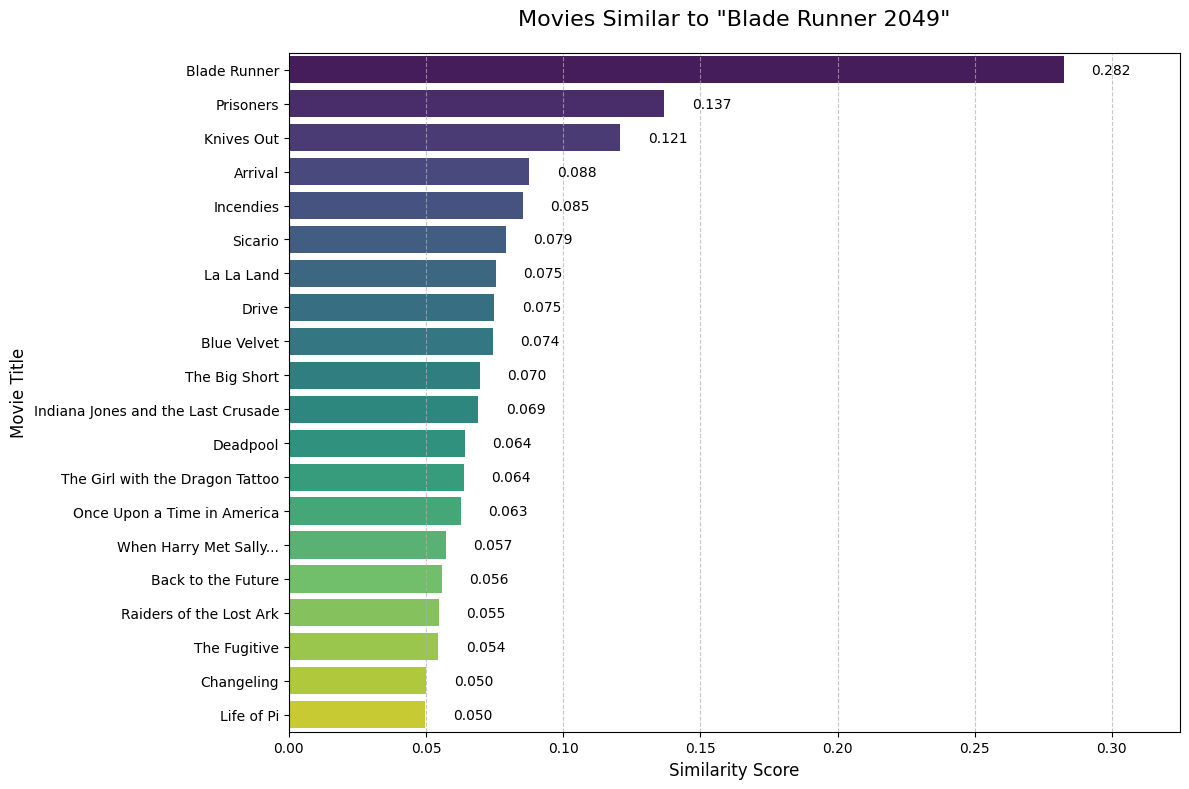

Series_Title  \
275                        Blade Runner   
222                           Prisoners   
463                          Knives Out   
476                             Arrival   
90                            Incendies   
893                             Sicario   
327                          La La Land   
621                               Drive   
834                         Blue Velvet   
600                       The Big Short   
168  Indiana Jones and the Last Crusade   
348                            Deadpool   
603     The Girl with the Dragon Tattoo   
71          Once Upon a Time in America   
975             When Harry Met Sally...   
47                   Back to the Future   
72              Raiders of the Lost Ark   
663                        The Fugitive   
759                          Changeling   
498                          Life of Pi   

                                              Overview              Director  \
275  A blade runner must pursue and terminate four ...          Ridley Scott   
222  When Keller Dover's daughter and her friend go...      Denis Villeneuve   
463  A detective investigates the death of a patria...          Rian Johnson   
476  A linguist works with the military to communic...      Denis Villeneuve   
90   Twins journey to the Middle East to discover t...      Denis Villeneuve   
893  An idealistic FBI agent is enlisted by a gover...      Denis Villeneuve   
327  While navigating their careers in Los Angeles,...       Damien Chazelle   
621  A mysterious Hollywood stuntman and mechanic m...  Nicolas Winding Refn   
834  The discovery of a severed human ear found in ...           David Lynch   
600  In 2006-2007 a group of investors bet against ...            Adam McKay   
168  In 1938, after his father Professor Henry Jone...      Steven Spielberg   
348  A wisecracking mercenary gets experimented on ...            Tim Miller   
603  Journalist Mikael Blomkvist is aided in his se...         David Fincher   
71   A former Prohibition-era Jewish gangster retur...          Sergio Leone   
975  Harry and Sally have known each other for year...            Rob Reiner   
47   Marty McFly, a 17-year-old high school student...       Robert Zemeckis   
72   In 1936, archaeologist and adventurer Indiana ...      Steven Spielberg   
663  Dr. Richard Kimble, unjustly accused of murder...          Andrew Davis   
759  Grief-stricken mother Christine Collins (Angel...        Clint Eastwood   
498  A young man who survives a disaster at sea is ...               Ang Lee   

                   Star1                      Star2                Star3  \
275        Harrison Ford               Rutger Hauer           Sean Young   
222         Hugh Jackman            Jake Gyllenhaal          Viola Davis   
463         Daniel Craig                Chris Evans         Ana de Armas   
476            Amy Adams              Jeremy Renner      Forest Whitaker   
90          Lubna Azabal  Mélissa Désormeaux-Poulin       Maxim Gaudette   
893          Emily Blunt                Josh Brolin     Benicio Del Toro   
327         Ryan Gosling                 Emma Stone     Rosemarie DeWitt   
621         Ryan Gosling             Carey Mulligan       Bryan Cranston   
834  Isabella Rossellini            Kyle MacLachlan        Dennis Hopper   
600       Christian Bale               Steve Carell         Ryan Gosling   
168        Harrison Ford               Sean Connery         Alison Doody   
348        Ryan Reynolds            Morena Baccarin          T.J. Miller   
603         Daniel Craig                Rooney Mara  Christopher Plummer   
71        Robert De Niro                James Woods   Elizabeth McGovern   
975        Billy Crystal                   Meg Ryan        Carrie Fisher   
47        Michael J. Fox          Christopher Lloyd         Lea Thompson   
72         Harrison Ford                Karen Allen         Paul Freeman   
663        Harrison Ford            Tommy Lee Jones            Sela Ward  

In [ ]:

run_movie_recommender(df, "Blade Runner 2049", 20)

In [ ]:
# Example usage
input_movie_name = "Blade Runner 2049"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

        Series_Title  Cosine Similarity
0  Blade Runner 2049           1.000000
1           Watchmen           0.969818
2           The Game           0.926422
3            Seppuku           0.918668
4           Oldeuboi           0.877890


دکتر نوربهبهانی

The Babadook

Good movie

Top 20 movies similar to 'The Sixth Sense':
                       Series_Title  Similarity_Score
               Little Miss Sunshine          0.119000
                   The Big Lebowski          0.104788
                   Moonrise Kingdom          0.099699
                       Mary and Max          0.096799
                  Good Will Hunting          0.092017
                     Twelve Monkeys          0.091185
                           Die Hard          0.091040
                       Evil Dead II          0.090699
         Die Hard: With a Vengeance          0.087347
                  The Fifth Element          0.084575
                       The Exorcist          0.076075
                          True Grit          0.073275
Willy Wonka & the Chocolate Factory          0.068963
    Who's Afraid of Virginia Woolf?          0.065460
                          Mad Max 2          0.064816
         E.T. the Extra-Terrestrial          0.063590
                            Solaris   

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


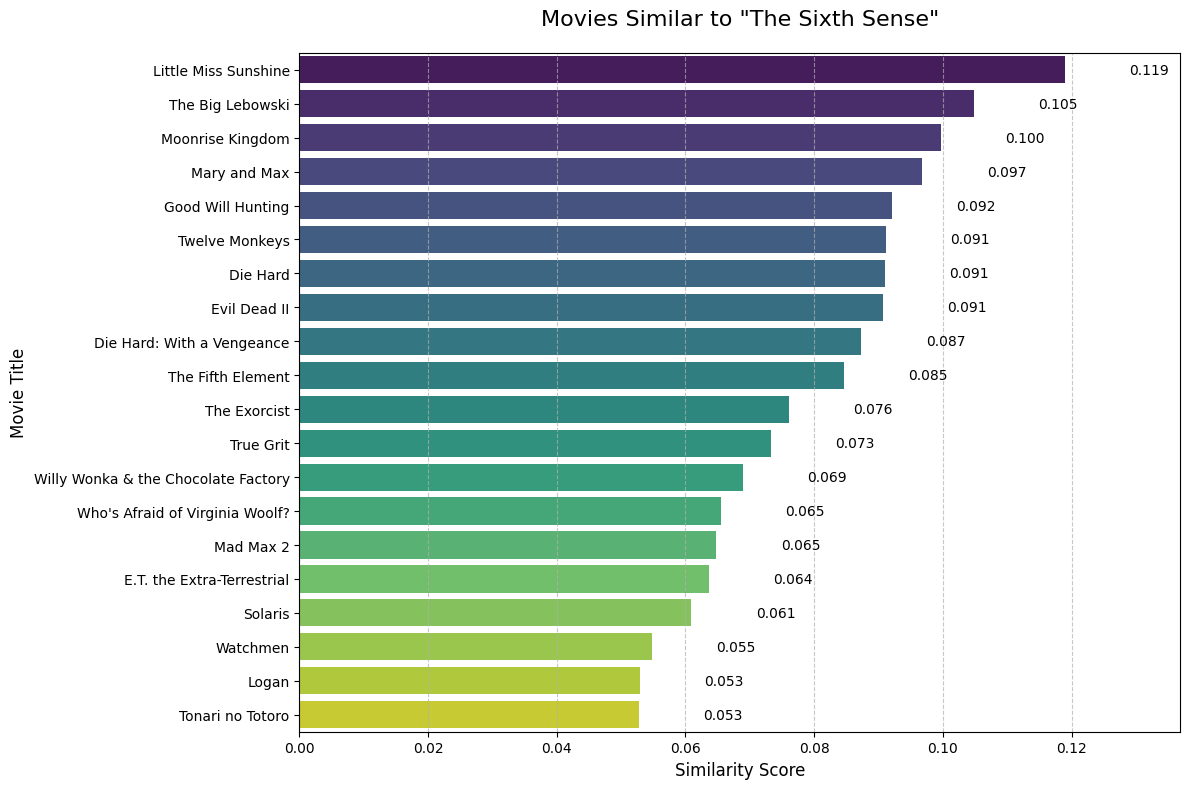

Series_Title  \
626                 Little Miss Sunshine   
252                     The Big Lebowski   
598                     Moonrise Kingdom   
229                         Mary and Max   
99                     Good Will Hunting   
393                       Twelve Monkeys   
171                             Die Hard   
678                         Evil Dead II   
963           Die Hard: With a Vengeance   
807                    The Fifth Element   
419                         The Exorcist   
904                            True Grit   
698  Willy Wonka & the Chocolate Factory   
428      Who's Afraid of Virginia Woolf?   
982                            Mad Max 2   
688           E.T. the Extra-Terrestrial   
286                              Solaris   
930                             Watchmen   
202                                Logan   
170                     Tonari no Totoro   

                                              Overview          Director  \
626  A family determined to get their young daughte...   Jonathan Dayton   
252  Jeff "The Dude" Lebowski, mistaken for a milli...         Joel Coen   
598  A pair of young lovers flee their New England ...      Wes Anderson   
229  A tale of friendship between two unlikely pen ...       Adam Elliot   
99   Will Hunting, a janitor at M.I.T., has a gift ...      Gus Van Sant   
393  In a future world devastated by disease, a con...     Terry Gilliam   
171  An NYPD officer tries to save his wife and sev...    John McTiernan   
678  The lone survivor of an onslaught of flesh-pos...         Sam Raimi   
963  John McClane and a Harlem store owner are targ...    John McTiernan   
807  In the colorful future, a cab driver unwitting...        Luc Besson   
419  When a 12-year-old girl is possessed by a myst...  William Friedkin   
904  A stubborn teenager enlists the help of a toug...        Ethan Coen   
698  A poor but hopeful boy seeks one of the five c...        Mel Stuart   
428  A bitter, aging couple, with the help of alcoh...      Mike Nichols   
982  In the post-apocalyptic Australian wasteland, ...     George Miller   
688  A troubled child summons the courage to help a...  Steven Spielberg   
286  A psychologist is sent to a station orbiting a...  Andrei Tarkovsky   
930  In 1985 where former superheroes exist, the mu...       Zack Snyder   
202  In a future where mutants are nearly extinct, ...     James Mangold   
170  When two girls move to the country to be near ...    Hayao Miyazaki   

                  Star1                   Star2              Star3  \
626       Valerie Faris            Steve Carell      Toni Collette   
252          Ethan Coen            Jeff Bridges       John Goodman   
598        Jared Gilman            Kara Hayward       Bruce Willis   
229       Toni Collette  Philip Seymour Hoffman          Eric Bana   
99       Robin Williams              Matt Damon        Ben Affleck   
393        Bruce Willis         Madeleine Stowe          Brad Pitt   
171        Bruce Willis            Alan Rickman     Bonnie Bedelia   
678      Bruce Campbell             Sarah Berry          Dan Hicks   
963        Bruce Willis            Jeremy Irons  Samuel L. Jackson   
807        Bruce Willis          Milla Jovovich        Gary Oldman   
419       Ellen Burstyn           Max von Sydow        Linda Blair   
904           Joel Coen            Jeff Bridges         Matt Damon   
698         Gene Wilder          Jack Albertson       Peter Ostrum   
428    Elizabeth Taylor          Richard Burton       George Segal   
982          Mel Gibson            Bruce Spence    Michael Preston   
688        Henry Thomas          Drew Barrymore       Peter Coyote   
286  Natalya Bondarchuk        Donatas Banionis        Jüri Järvet   
930  Jackie Earle Haley          Patrick Wilson       Carla Gugino   
202        Hugh Jackman         Patrick Stewart         Dafne Keen   
170      Hitoshi Takagi           Noriko Hidaka     Chika Sakamoto   

     Similarity_Score  
626        

In [ ]:

run_movie_recommender(df, "The Sixth Sense", 20)

In [ ]:
# Example usage
input_movie_name = "The Sixth Sense"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

          Series_Title  Cosine Similarity
0      The Sixth Sense           1.000000
1          Blue Velvet           0.986868
2     The Conversation           0.981773
3            Chinatown           0.970542
4            Gone Girl           0.956413
5               Blowup           0.949211
6            Searching           0.913835
7  The Lives of Others           0.907272
8       Mulholland Dr.           0.837489


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "The Sixth Sense"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'The Sixth Sense':
Recommended movie: Blue Velvet
Similarity score: 0.9869
Source: Siamese network


Bad **Movie**

Top 20 movies similar to 'Halloween':
                                   Series_Title  Similarity_Score
                         Hannah and Her Sisters          0.118226
               The Man Who Shot Liberty Valance          0.104764
                 The Nightmare Before Christmas          0.098063
                         Sweet Smell of Success          0.096502
                                The Deer Hunter          0.085624
                                Out of the Past          0.075742
                               Some Like It Hot          0.073185
                             The Man from Earth          0.072521
                                      The Thing          0.067592
                One Flew Over the Cuckoo's Nest          0.066184
Das weiße Band - Eine deutsche Kindergeschichte          0.064642
                                  The Quiet Man          0.063437
                                   The Fugitive          0.061332
                                      

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


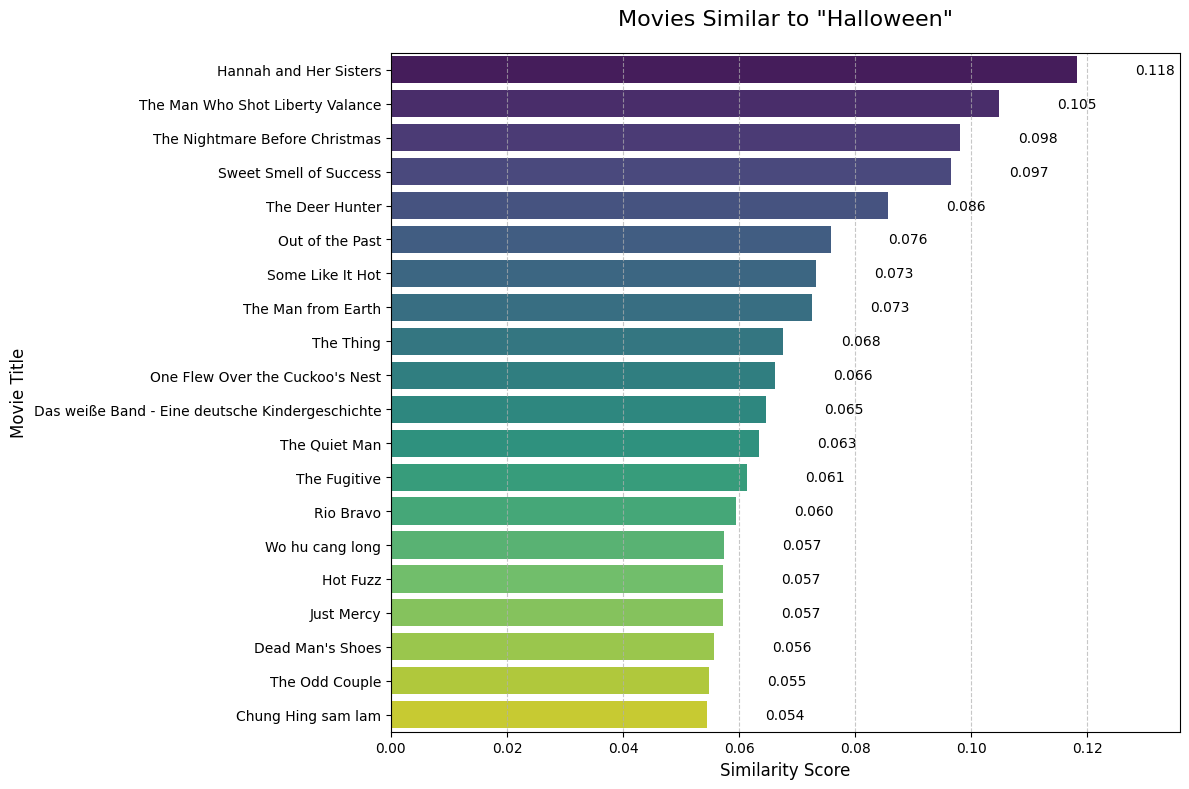

Series_Title  \
528                           Hannah and Her Sisters   
295                 The Man Who Shot Liberty Valance   
395                   The Nightmare Before Christmas   
440                           Sweet Smell of Success   
278                                  The Deer Hunter   
451                                  Out of the Past   
183                                 Some Like It Hot   
495                               The Man from Earth   
271                                        The Thing   
17                   One Flew Over the Cuckoo's Nest   
610  Das weiße Band - Eine deutsche Kindergeschichte   
871                                    The Quiet Man   
663                                     The Fugitive   
436                                        Rio Bravo   
645                                  Wo hu cang long   
627                                         Hot Fuzz   
882                                       Just Mercy   
926                                 Dead Man's Shoes   
855                                   The Odd Couple   
261                               Chung Hing sam lam   

                                              Overview               Director  \
528  Between two Thanksgivings two years apart, Han...            Woody Allen   
295  A senator returns to a western town for the fu...              John Ford   
395  Jack Skellington, king of Halloween Town, disc...           Henry Selick   
440  Powerful but unethical Broadway columnist J.J....  Alexander Mackendrick   
278  An in-depth examination of the ways in which t...         Michael Cimino   
451  A private eye escapes his past to run a gas st...       Jacques Tourneur   
183  After two male musicians witness a mob hit, th...           Billy Wilder   
495  An impromptu goodbye party for Professor John ...      Richard Schenkman   
271  A research team in Antarctica is hunted by a s...         John Carpenter   
17   A criminal pleads insanity and is admitted to ...           Milos Forman   
610  Strange events happen in a small village in th...         Michael Haneke   
871  A retired American boxer returns to the villag...              John Ford   
663  Dr. Richard Kimble, unjustly accused of murder...           Andrew Davis   
436  A small-town sheriff in the American West enli...           Howard Hawks   
645  A young Chinese warrior steals a sword from a ...                Ang Lee   
627  A skilled London police officer is transferred...           Edgar Wright   
882  World-renowned civil rights defense attorney B...  Destin Daniel Cretton   
926  A disaffected soldier returns to his hometown ...          Shane Meadows   
855  Two friends try sharing an apartment, but thei...              Gene Saks   
261  Two melancholy Hong Kong policemen fall in lov...           Kar-Wai Wong   

                 Star1               Star2                Star3  \
528         Mia Farrow        Dianne Wiest        Michael Caine   
295      James Stewart          John Wayne           Vera Miles   
395       Danny Elfman      Chris Sarandon     Catherine O'Hara   
440     Burt Lancaster         Tony Curtis       Susan Harrison   
278     Robert De Niro  Christopher Walken          John Cazale   
451     Robert Mitchum          Jane Greer         Kirk Douglas   
183     Marilyn Monroe         Tony Curtis          Jack Lemmon   
495    David Lee Smith           Tony Todd     John Billingsley   
271       Kurt Russell     Wilford Brimley          Keith David   
17      Jack Nicholson     Louise Fletcher     Michael Berryman   
610  Christian Friedel        Ernst Jacobi       Leonie Benesch   
871         John Wayne      Maureen O'Hara     Barry Fitzgerald   
663      Harrison Ford     Tommy Lee Jones            Sela Ward   
436         John Wayne         Dean Martin         Ricky Nelson   
645       Yun-Fat Chow       Michelle Yeoh           Ziyi Zhang   
627         Simon Pegg          Nick Frost       Martin Freeman   
882  Michael B. Jordan

In [ ]:

run_movie_recommender(df, "Halloween", 20)

In [ ]:
# Example usage
input_movie_name = "Halloween"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

               Series_Title  Cosine Similarity
0                 Halloween            1.00000
1  Night of the Living Dead            0.98219


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Halloween"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Halloween':
Recommended movie: Night of the Living Dead
Similarity score: 0.9502
Source: Siamese network


کیانا نوربهبهانی

The Place Beyond the Pines

Good Movie

Top 20 movies similar to 'Room':
            Series_Title  Similarity_Score
                  Wonder          0.115473
              Just Mercy          0.110068
           Short Term 12          0.101408
         Rang De Basanti          0.099430
                Iron Man          0.097078
            The Notebook          0.082541
       Kramer vs. Kramer          0.081295
            Blade Runner          0.078493
       Tengoku to jigoku          0.077458
          Manbiki kazoku          0.076996
                  Aliens          0.076195
          V for Vendetta          0.073161
           Carlito's Way          0.068284
          The Iron Giant          0.067847
     Fanny och Alexander          0.067403
             Joyeux Noël          0.063966
       Empire of the Sun          0.056395
The Grand Budapest Hotel          0.054671
          Hidden Figures          0.054670
   Män som hatar kvinnor          0.052639


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


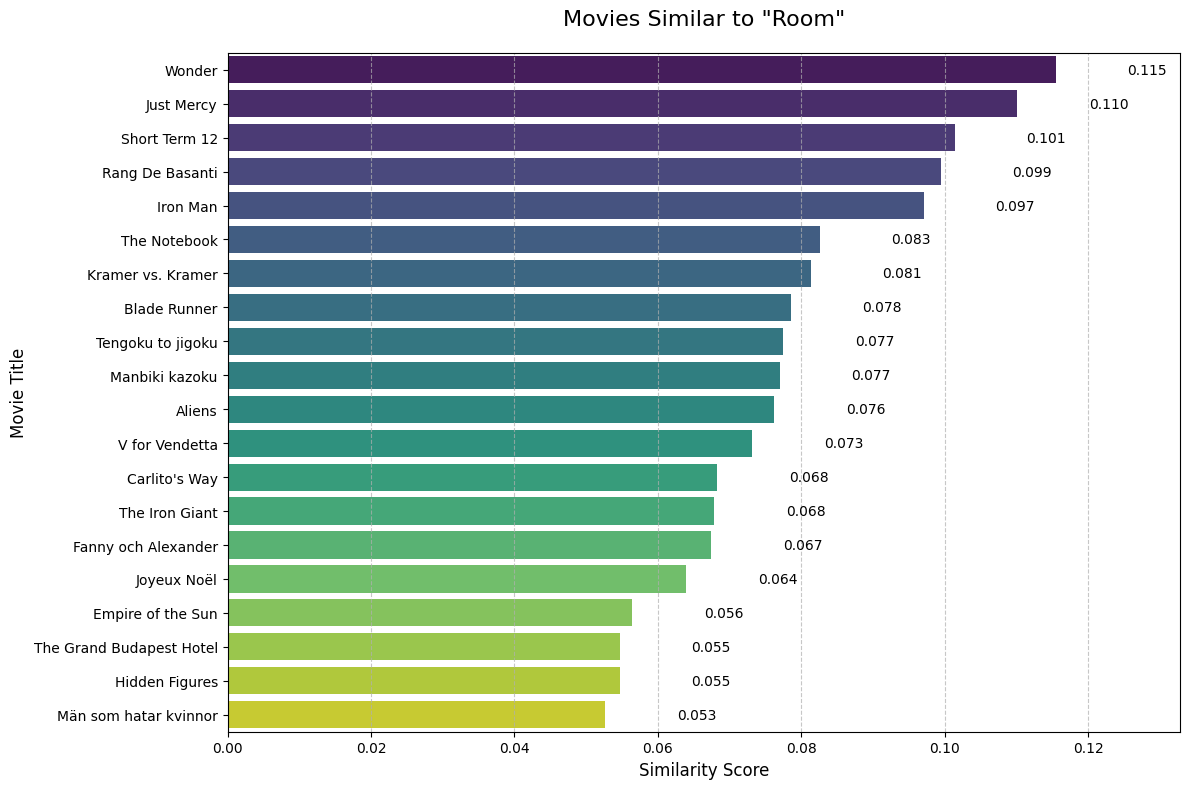

Series_Title  \
333                    Wonder   
882                Just Mercy   
336             Short Term 12   
153           Rang De Basanti   
502                  Iron Man   
637              The Notebook   
689         Kramer vs. Kramer   
275              Blade Runner   
77          Tengoku to jigoku   
465            Manbiki kazoku   
106                    Aliens   
152            V for Vendetta   
523             Carlito's Way   
389            The Iron Giant   
274       Fanny och Alexander   
769               Joyeux Noël   
832         Empire of the Sun   
209  The Grand Budapest Hotel   
575            Hidden Figures   
611     Män som hatar kvinnor   

                                              Overview  \
333  Based on the New York Times bestseller, this m...   
882  World-renowned civil rights defense attorney B...   
336  A 20-something supervising staff member of a r...   
153  The story of six young Indians who assist an E...   
502  After being held captive in an Afghan cave, bi...   
637  A poor yet passionate young man falls in love ...   
689  Ted Kramer's wife leaves him, allowing for a l...   
275  A blade runner must pursue and terminate four ...   
77   An executive of a shoe company becomes a victi...   
465  A family of small-time crooks take in a child ...   
106  Fifty-seven years after surviving an apocalypt...   
152  In a future British tyranny, a shadowy freedom...   
523  A Puerto Rican former convict, just released f...   
389  A young boy befriends a giant robot from outer...   
274  Two young Swedish children experience the many...   
769  In December 1914, an unofficial Christmas truc...   
832  A young English boy struggles to survive under...   
209  A writer encounters the owner of an aging high...   
575  The story of a team of female African-American...   
611  A journalist is aided by a young female hacker...   

                    Director              Star1              Star2  \
333          Stephen Chbosky     Jacob Tremblay        Owen Wilson   
882    Destin Daniel Cretton  Michael B. Jordan         Jamie Foxx   
336    Destin Daniel Cretton        Brie Larson      Frantz Turner   
153  Rakeysh Omprakash Mehra         Aamir Khan      Soha Ali Khan   
502              Jon Favreau  Robert Downey Jr.    Gwyneth Paltrow   
637          Nick Cassavetes      Gena Rowlands       James Garner   
689            Robert Benton     Dustin Hoffman       Meryl Streep   
275             Ridley Scott      Harrison Ford       Rutger Hauer   
77            Akira Kurosawa     Toshirô Mifune        Yutaka Sada   
465         Hirokazu Koreeda        Lily Franky        Sakura Andô   
106            James Cameron   Sigourney Weaver      Michael Biehn   
152           James McTeigue       Hugo Weaving    Natalie Portman   
523           Brian De Palma          Al Pacino          Sean Penn   
389                Brad Bird     Eli Marienthal  Harry Connick Jr.   
274           Ingmar Bergman        Bertil Guve    Pernilla Allwin   
769         Christian Carion       Diane Kruger      Benno Fürmann   
832         Steven Spielberg     Christian Bale     John Malkovich   
209             Wes Anderson      Ralph Fiennes  F. Murray Abraham   
575           Theodore Melfi   Taraji P. Henson    Octavia Spencer   
611        Niels Arden Oplev    Michael Nyqvist       Noomi Rapace   

                   Star3  Similarity_Score  
333      Izabela Vidovic          0.115473  
882          Brie Larson          0.110068  
336   John Gallagher Jr.          0.101408  
153            Siddharth          0.099430  
502      Terrence Howard          0.097078  
637       Rachel McAdams          0.082541  
689       Jane Alexander          0.081295  
275           Sean Young          0.078493  
77       Tatsuya Nakadai          0.077458  
465           Kirin Kiki          0.076996  
106          Carrie Henn          0.076195  
152        Rupert Graves          0.073161  
523  Penelope Ann Miller          0.068284  
389

In [ ]:

run_movie_recommender(df, "Room", 20)

In [ ]:
# Example usage
input_movie_name = "Room"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                Series_Title  Cosine Similarity
0                       Room           1.000000
1             A Few Good Men           0.966611
2                     Misery           0.963966
3                  Die Welle           0.952959
4              The Machinist           0.952147
5             Das Experiment           0.947353
6              Amores perros           0.943851
7                   Kokuhaku           0.941499
8                    Persona           0.929820
9                       Pink           0.913094
10                 Cape Fear           0.906543
11  The Manchurian Candidate           0.892341
12              Le locataire           0.871904
13                Black Swan           0.867878


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Room"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Room':
Recommended movie: A Few Good Men
Similarity score: 0.9666
Source: Siamese network


Bad Movies

Top 20 movies similar to 'Prisoners':
              Series_Title  Similarity_Score
         Blade Runner 2049          0.136844
                     Logan          0.110356
        Brokeback Mountain          0.103090
              End of Watch          0.100548
                   Arrival          0.099522
                 Incendies          0.096806
              The Prestige          0.093602
X-Men: Days of Future Past          0.089850
                   Sicario          0.089619
               October Sky          0.082211
              Nightcrawler          0.082173
                  The Help          0.081309
       Edward Scissorhands          0.077251
              Donnie Darko          0.076208
                 Searching          0.071613
                    Zodiac          0.070495
                   Kahaani          0.061553
              Paddington 2          0.057516
           American Beauty          0.057026
            Kelly's Heroes          0.054218


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


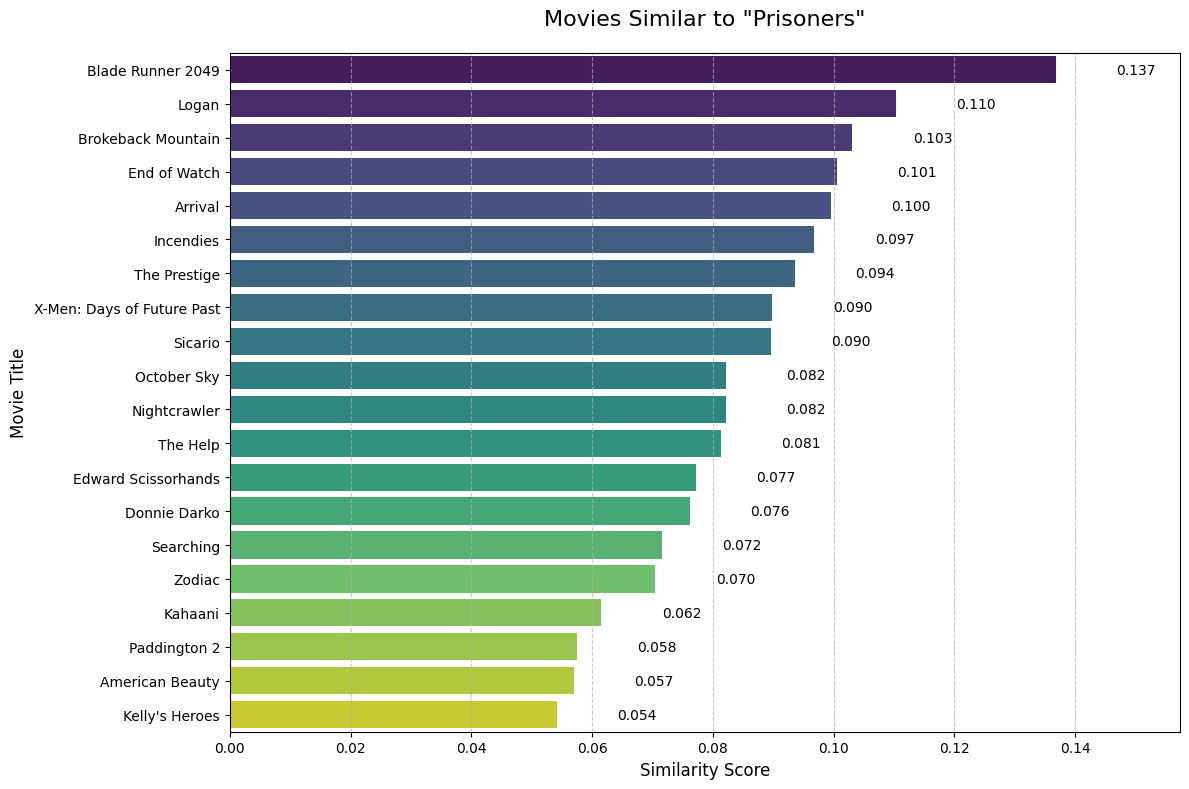

Series_Title  \
340           Blade Runner 2049   
202                       Logan   
773          Brokeback Mountain   
901                End of Watch   
476                     Arrival   
90                    Incendies   
36                 The Prestige   
479  X-Men: Days of Future Past   
893                     Sicario   
650                 October Sky   
474                Nightcrawler   
347                    The Help   
524         Edward Scissorhands   
382                Donnie Darko   
878                   Searching   
767                      Zodiac   
220                     Kahaani   
576                Paddington 2   
98              American Beauty   
991              Kelly's Heroes   

                                              Overview           Director  \
340  Young Blade Runner K's discovery of a long-bur...   Denis Villeneuve   
202  In a future where mutants are nearly extinct, ...      James Mangold   
773  The story of a forbidden and secretive relatio...            Ang Lee   
901  Shot documentary-style, this film follows the ...         David Ayer   
476  A linguist works with the military to communic...   Denis Villeneuve   
90   Twins journey to the Middle East to discover t...   Denis Villeneuve   
36   After a tragic accident, two stage magicians e...  Christopher Nolan   
479  The X-Men send Wolverine to the past in a desp...       Bryan Singer   
893  An idealistic FBI agent is enlisted by a gover...   Denis Villeneuve   
650  The true story of Homer Hickam, a coal miner's...       Joe Johnston   
474  When Louis Bloom, a con man desperate for work...         Dan Gilroy   
347  An aspiring author during the civil rights mov...        Tate Taylor   
524  An artificial man, who was incompletely constr...         Tim Burton   
382  After narrowly escaping a bizarre accident, a ...      Richard Kelly   
878  After his teenage daughter goes missing, a des...    Aneesh Chaganty   
767  In the late 1960s/early 1970s, a San Francisco...      David Fincher   
220  A pregnant woman's search for her missing husb...        Sujoy Ghosh   
576  Paddington (Ben Whishaw), now happily settled ...          Paul King   
98   A sexually frustrated suburban father has a mi...         Sam Mendes   
991  A group of U.S. soldiers sneaks across enemy l...    Brian G. Hutton   

               Star1                      Star2               Star3  \
340    Harrison Ford               Ryan Gosling        Ana de Armas   
202     Hugh Jackman            Patrick Stewart          Dafne Keen   
773  Jake Gyllenhaal               Heath Ledger   Michelle Williams   
901  Jake Gyllenhaal               Michael Peña       Anna Kendrick   
476        Amy Adams              Jeremy Renner     Forest Whitaker   
90      Lubna Azabal  Mélissa Désormeaux-Poulin      Maxim Gaudette   
36    Christian Bale               Hugh Jackman  Scarlett Johansson   
479  Patrick Stewart               Ian McKellen        Hugh Jackman   
893      Emily Blunt                Josh Brolin    Benicio Del Toro   
650  Jake Gyllenhaal               Chris Cooper          Laura Dern   
474  Jake Gyllenhaal                 Rene Russo         Bill Paxton   
347       Emma Stone                Viola Davis     Octavia Spencer   
524      Johnny Depp               Winona Ryder        Dianne Wiest   
382  Jake Gyllenhaal                Jena Malone      Mary McDonnell   
878         John Cho              Debra Messing          Joseph Lee   
767  Jake Gyllenhaal          Robert Downey Jr.        Mark Ruffalo   
220      Vidya Balan   Parambrata Chattopadhyay  Indraneil Sengupta   
576      Ben Whishaw                 Hugh Grant     Hugh Bonneville   
98      Kevin Spacey             Annette Bening         Thora Birch   
991   Clint Eastwood              Telly Savalas         Don Rickles   

     Similarity_Score  
340          0.136844  
202          0.110356  
773          0.103090  
901          0.100548  
476          0.099522  
90           0.096806  
36   

In [ ]:
run_movie_recommender(df, "Prisoners", 20)


In [ ]:
# Example usage
input_movie_name = "Prisoners"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                       Series_Title  Cosine Similarity
0                         Prisoners           1.000000
1                        Inside Man           0.983652
2                       Primal Fear           0.976215
3                        Wind River           0.975926
4                    Salinui chueok           0.970812
5                      Contratiempo           0.969792
6                      Mystic River           0.965100
7                             Se7en           0.964122
8          In the Heat of the Night           0.959795
9                 L.A. Confidential           0.959698
10              Anatomy of a Murder           0.957217
11                           Zodiac           0.953903
12              La migliore offerta           0.952007
13  The Girl with the Dragon Tattoo           0.951254
14      Witness for the Prosecution           0.950233
15                   Gone Baby Gone           0.949926
16                Der Name der Rose           0.949232
17        

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Prisoners"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Prisoners':
Recommended movie: Zodiac
Similarity score: 0.9539
Source: Both approaches


سعید صدیق زاده

The Assistant

Top 20 movies similar to 'Prisoners':
              Series_Title  Similarity_Score
         Blade Runner 2049          0.136844
                     Logan          0.110356
        Brokeback Mountain          0.103090
              End of Watch          0.100548
                   Arrival          0.099522
                 Incendies          0.096806
              The Prestige          0.093602
X-Men: Days of Future Past          0.089850
                   Sicario          0.089619
               October Sky          0.082211
              Nightcrawler          0.082173
                  The Help          0.081309
       Edward Scissorhands          0.077251
              Donnie Darko          0.076208
                 Searching          0.071613
                    Zodiac          0.070495
                   Kahaani          0.061553
              Paddington 2          0.057516
           American Beauty          0.057026
            Kelly's Heroes          0.054218


<ipython-input-38-e43740a9b824>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


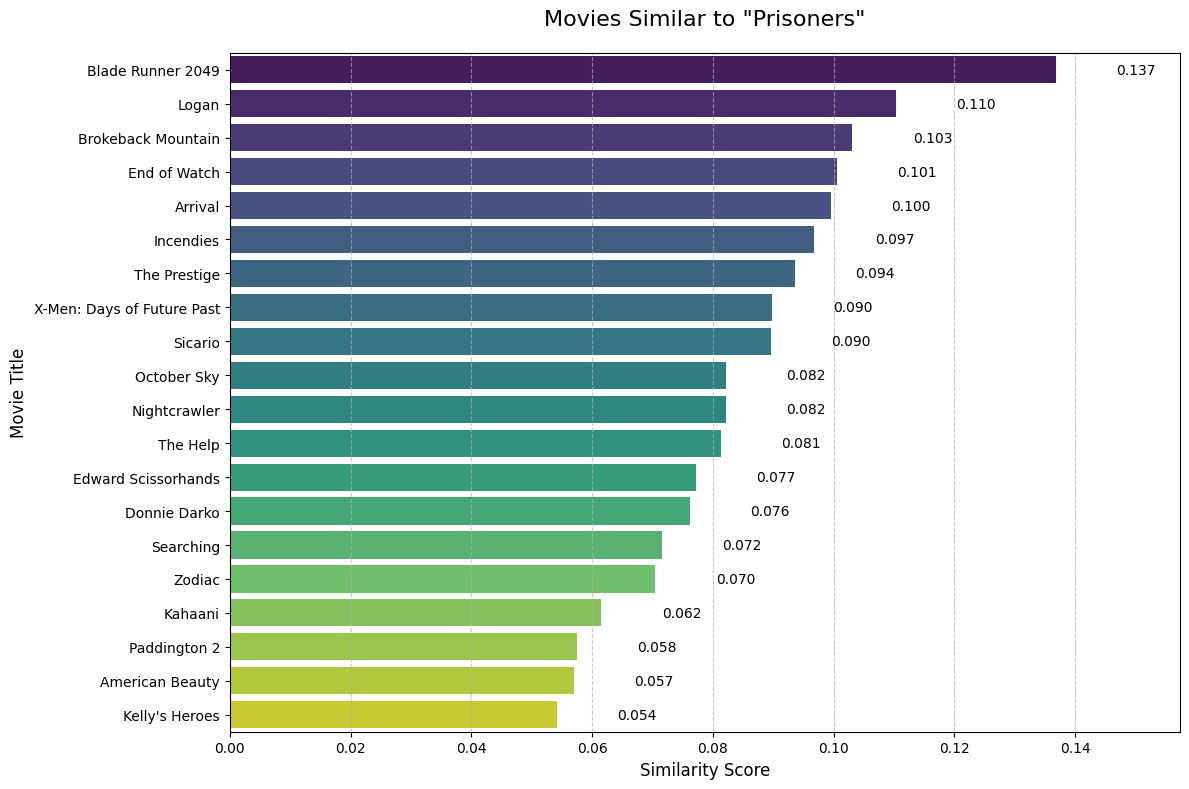

Series_Title  \
340           Blade Runner 2049   
202                       Logan   
773          Brokeback Mountain   
901                End of Watch   
476                     Arrival   
90                    Incendies   
36                 The Prestige   
479  X-Men: Days of Future Past   
893                     Sicario   
650                 October Sky   
474                Nightcrawler   
347                    The Help   
524         Edward Scissorhands   
382                Donnie Darko   
878                   Searching   
767                      Zodiac   
220                     Kahaani   
576                Paddington 2   
98              American Beauty   
991              Kelly's Heroes   

                                              Overview           Director  \
340  Young Blade Runner K's discovery of a long-bur...   Denis Villeneuve   
202  In a future where mutants are nearly extinct, ...      James Mangold   
773  The story of a forbidden and secretive relatio...            Ang Lee   
901  Shot documentary-style, this film follows the ...         David Ayer   
476  A linguist works with the military to communic...   Denis Villeneuve   
90   Twins journey to the Middle East to discover t...   Denis Villeneuve   
36   After a tragic accident, two stage magicians e...  Christopher Nolan   
479  The X-Men send Wolverine to the past in a desp...       Bryan Singer   
893  An idealistic FBI agent is enlisted by a gover...   Denis Villeneuve   
650  The true story of Homer Hickam, a coal miner's...       Joe Johnston   
474  When Louis Bloom, a con man desperate for work...         Dan Gilroy   
347  An aspiring author during the civil rights mov...        Tate Taylor   
524  An artificial man, who was incompletely constr...         Tim Burton   
382  After narrowly escaping a bizarre accident, a ...      Richard Kelly   
878  After his teenage daughter goes missing, a des...    Aneesh Chaganty   
767  In the late 1960s/early 1970s, a San Francisco...      David Fincher   
220  A pregnant woman's search for her missing husb...        Sujoy Ghosh   
576  Paddington (Ben Whishaw), now happily settled ...          Paul King   
98   A sexually frustrated suburban father has a mi...         Sam Mendes   
991  A group of U.S. soldiers sneaks across enemy l...    Brian G. Hutton   

               Star1                      Star2               Star3  \
340    Harrison Ford               Ryan Gosling        Ana de Armas   
202     Hugh Jackman            Patrick Stewart          Dafne Keen   
773  Jake Gyllenhaal               Heath Ledger   Michelle Williams   
901  Jake Gyllenhaal               Michael Peña       Anna Kendrick   
476        Amy Adams              Jeremy Renner     Forest Whitaker   
90      Lubna Azabal  Mélissa Désormeaux-Poulin      Maxim Gaudette   
36    Christian Bale               Hugh Jackman  Scarlett Johansson   
479  Patrick Stewart               Ian McKellen        Hugh Jackman   
893      Emily Blunt                Josh Brolin    Benicio Del Toro   
650  Jake Gyllenhaal               Chris Cooper          Laura Dern   
474  Jake Gyllenhaal                 Rene Russo         Bill Paxton   
347       Emma Stone                Viola Davis     Octavia Spencer   
524      Johnny Depp               Winona Ryder        Dianne Wiest   
382  Jake Gyllenhaal                Jena Malone      Mary McDonnell   
878         John Cho              Debra Messing          Joseph Lee   
767  Jake Gyllenhaal          Robert Downey Jr.        Mark Ruffalo   
220      Vidya Balan   Parambrata Chattopadhyay  Indraneil Sengupta   
576      Ben Whishaw                 Hugh Grant     Hugh Bonneville   
98      Kevin Spacey             Annette Bening         Thora Birch   
991   Clint Eastwood              Telly Savalas         Don Rickles   

     Similarity_Score  
340          0.136844  
202          0.110356  
773          0.103090  
901          0.100548  
476          0.099522  
90           0.096806  
36   

In [ ]:

run_movie_recommender(df, "Prisoners", 20)

In [ ]:
# Example usage
input_movie_name = "Prisoners"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                       Series_Title  Cosine Similarity
0                         Prisoners           1.000000
1                        Inside Man           0.991688
2                        Wind River           0.991271
3   The Girl with the Dragon Tattoo           0.986100
4                    Gone Baby Gone           0.985883
5             Män som hatar kvinnor           0.985256
6                             Se7en           0.981591
7                            Zodiac           0.981068
8                      Mystic River           0.980957
9               Glengarry Glen Ross           0.980553
10                Der Name der Rose           0.980060
11              La migliore offerta           0.977854
12                L.A. Confidential           0.977578
13              Anatomy of a Murder           0.975979
14                           Talvar           0.975235
15      Witness for the Prosecution           0.975208
16                      Primal Fear           0.975012
17        

Bad Movies

Top 20 movies similar to 'There Will Be Blood':
                            Series_Title  Similarity_Score
                           Boogie Nights          0.178999
                         The Illusionist          0.129296
                                Magnolia          0.125163
                      A Hard Day's Night          0.117785
                The Last of the Mohicans          0.107415
                               In Bruges          0.099815
               In the Name of the Father          0.092249
                   A Man for All Seasons          0.092197
My Left Foot: The Story of Christy Brown          0.089519
                                  Festen          0.085010
                          Loving Vincent          0.084447
                           Walk the Line          0.083377
                            Mary Poppins          0.077302
                   Cat on a Hot Tin Roof          0.071258
      Butch Cassidy and the Sundance Kid          0.071151
        

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


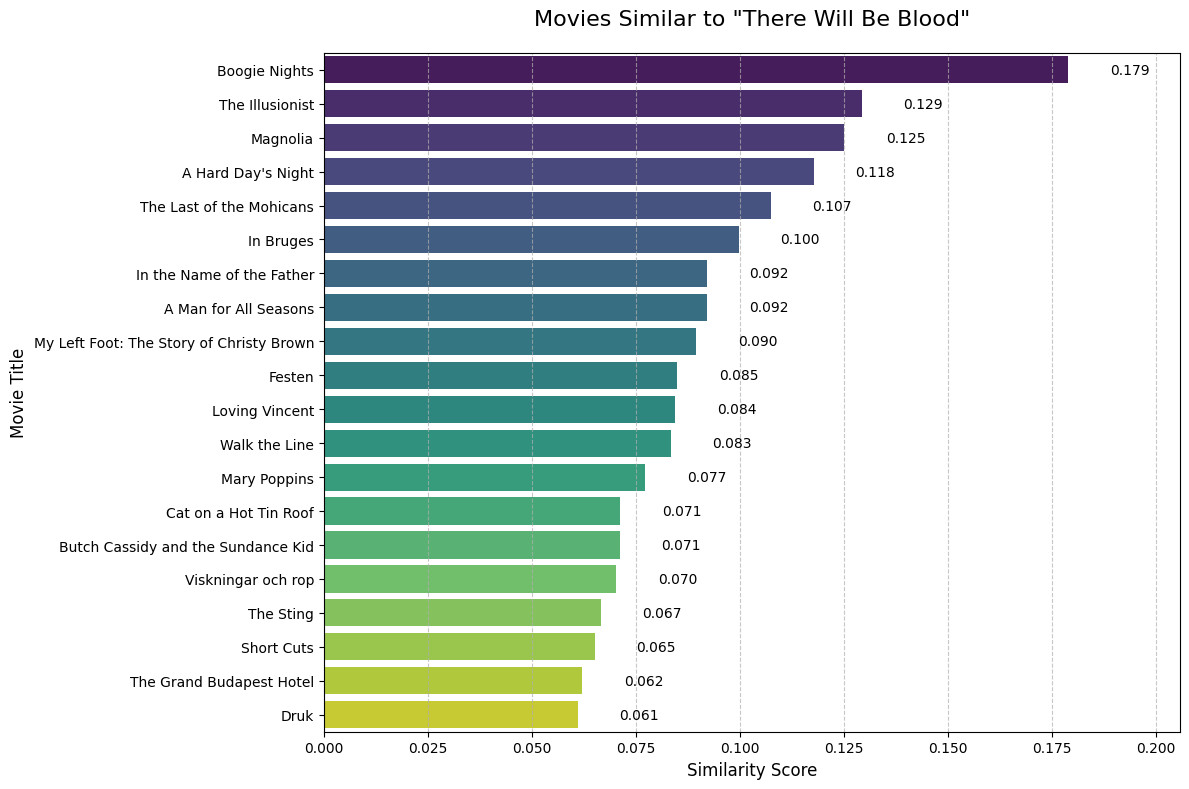

Series_Title  \
517                             Boogie Nights   
925                           The Illusionist   
383                                  Magnolia   
994                        A Hard Day's Night   
821                  The Last of the Mohicans   
494                                 In Bruges   
263                 In the Name of the Father   
858                     A Man for All Seasons   
525  My Left Foot: The Story of Christy Brown   
387                                    Festen   
586                            Loving Vincent   
635                             Walk the Line   
704                              Mary Poppins   
439                     Cat on a Hot Tin Roof   
424        Butch Cassidy and the Sundance Kid   
285                        Viskningar och rop   
112                                 The Sting   
817                                Short Cuts   
209                  The Grand Budapest Hotel   
613                                      Druk   

                                              Overview              Director  \
517  Back when sex was safe, pleasure was a busines...  Paul Thomas Anderson   
925  In turn-of-the-century Vienna, a magician uses...           Neil Burger   
383  An epic mosaic of interrelated characters in s...  Paul Thomas Anderson   
994  Over two "typical" days in the life of The Bea...        Richard Lester   
821  Three trappers protect the daughters of a Brit...          Michael Mann   
494  Guilt-stricken after a job gone wrong, hitman ...       Martin McDonagh   
263  A man's coerced confession to an I.R.A. bombin...          Jim Sheridan   
858  The story of Sir Thomas More, who stood up to ...        Fred Zinnemann   
525  Christy Brown, born with cerebral palsy, learn...          Jim Sheridan   
387  At Helge's 60th birthday party, some unpleasan...     Thomas Vinterberg   
586  In a story depicted in oil painted animation, ...        Dorota Kobiela   
635  A chronicle of country music legend Johnny Cas...         James Mangold   
704  In turn of the century London, a magical nanny...      Robert Stevenson   
439  Brick is an alcoholic ex-football player who d...        Richard Brooks   
424  Wyoming, early 1900s. Butch Cassidy and The Su...       George Roy Hill   
285  When a woman dying of cancer in early twentiet...        Ingmar Bergman   
112  Two grifters team up to pull off the ultimate ...       George Roy Hill   
817  The day-to-day lives of several suburban Los A...         Robert Altman   
209  A writer encounters the owner of an aging high...          Wes Anderson   
613  Four friends, all high school teachers, test a...     Thomas Vinterberg   

                 Star1               Star2             Star3  Similarity_Score  
517      Mark Wahlberg      Julianne Moore     Burt Reynolds          0.178999  
925      Edward Norton        Jessica Biel     Paul Giamatti          0.129296  
383         Tom Cruise       Jason Robards    Julianne Moore          0.125163  
994        John Lennon      Paul McCartney   George Harrison          0.117785  
821   Daniel Day-Lewis     Madeleine Stowe     Russell Means          0.107415  
494      Colin Farrell     Brendan Gleeson      Ciarán Hinds          0.099815  
263   Daniel Day-Lewis  Pete Postlethwaite    Alison Crosbie          0.092249  
858      Paul Scofield        Wendy Hiller       Robert Shaw          0.092197  
525   Daniel Day-Lewis      Brenda Fricker     Alison Whelan          0.089519  
387     Ulrich Thomsen    Henning Moritzen  Thomas Bo Larsen          0.085010  
586      Hugh Welchman       Douglas Booth      Jerome Flynn          0.084447  
635    Joaquin Phoenix   Reese Witherspoon  Ginnifer Goodwin          0.083377  
704      Julie Andrews       Dick Van Dyke   David Tomlinson          0.077302  
439   Elizabeth Taylor         Paul Newman         Burl Ives          0.071258  
424        Paul Newman      Robert Redford    Katharine Ross          0.071151  
285  Harriet Andersson    

In [ ]:

run_movie_recommender(df, "There Will Be Blood", 20)

In [ ]:
# Example usage
input_movie_name = "There Will Be Blood"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                            Series_Title  Cosine Similarity
0                    There Will Be Blood           1.000000
1                        I, Daniel Blake           0.974356
2                     La grande bellezza           0.971114
3                           Seven Pounds           0.964415
4                               Magnolia           0.962090
5                           Paris, Texas           0.961103
6                                Boyhood           0.959892
7                             Fight Club           0.957514
8                    The Florida Project           0.957169
9                   Synecdoche, New York           0.954257
10                              The Help           0.953529
11                        Vozvrashchenie           0.951037
12  Vivre sa vie: Film en douze tableaux           0.950902
13              The Shawshank Redemption           0.947157
14                           Gran Torino           0.943117
15                                Gifted

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "There Will Be Blood"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'There Will Be Blood':
Recommended movie: Magnolia
Similarity score: 0.9621
Source: Both approaches


مرضیه صدیقی

About Time

Good Movie

Top 20 movies similar to 'La La Land':
                    Series_Title  Similarity_Score
                        Whiplash          0.106817
                 Boyz n the Hood          0.097374
                      Short Cuts          0.092387
                           Drive          0.087110
                   The Big Short          0.080834
                    Training Day          0.079162
                           Crash          0.075764
               Blade Runner 2049          0.075336
                        Die Hard          0.074680
               L.A. Confidential          0.072295
Once Upon a Time... in Hollywood          0.070144
                     Höstsonaten          0.070042
     The Broken Circle Breakdown          0.069286
                        The Help          0.064666
                  Mulholland Dr.          0.063652
                  Dil Chahta Hai          0.063042
          Straight Outta Compton          0.062612
                 Minority Report          0

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


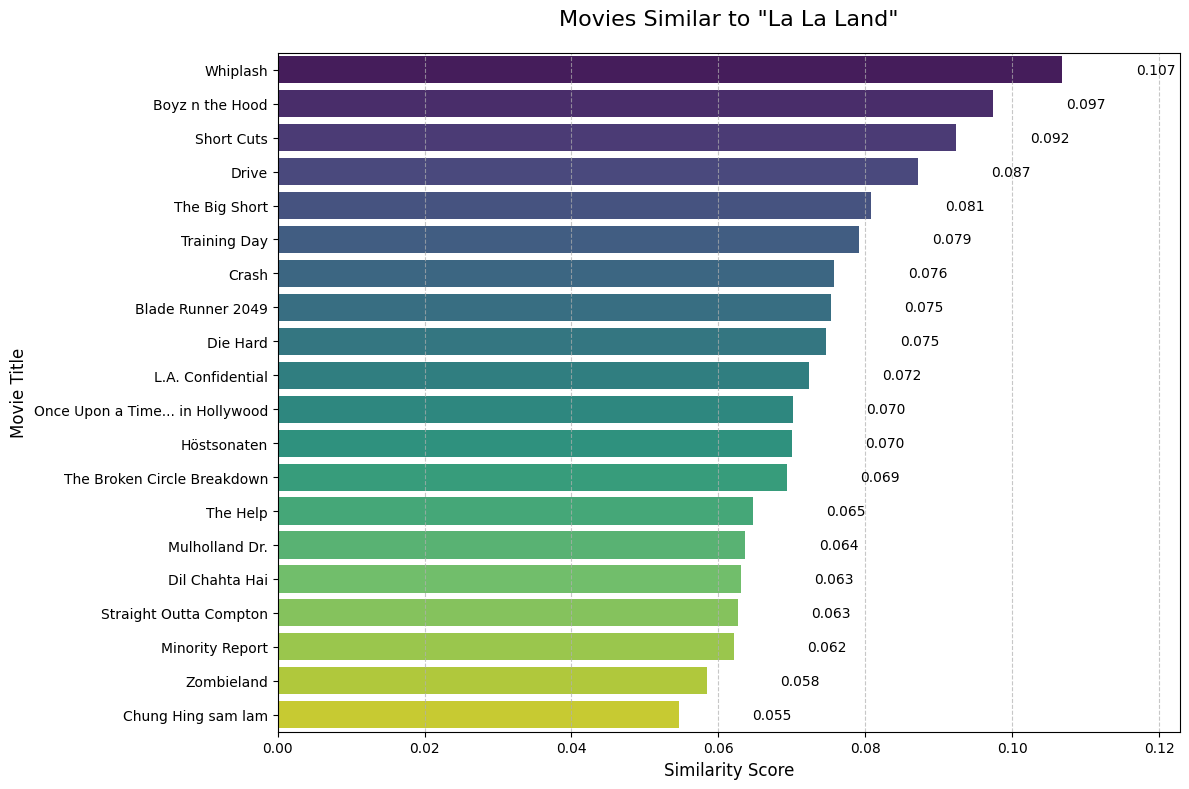

Series_Title  \
34                           Whiplash   
669                   Boyz n the Hood   
817                        Short Cuts   
621                             Drive   
600                     The Big Short   
802                      Training Day   
775                             Crash   
340                 Blade Runner 2049   
171                          Die Hard   
162                 L.A. Confidential   
879  Once Upon a Time... in Hollywood   
175                       Höstsonaten   
736       The Broken Circle Breakdown   
347                          The Help   
515                    Mulholland Dr.   
240                    Dil Chahta Hai   
606            Straight Outta Compton   
951                   Minority Report   
912                        Zombieland   
261                Chung Hing sam lam   

                                              Overview              Director  \
34   A promising young drummer enrolls at a cut-thr...       Damien Chazelle   
669  Follows the lives of three young males living ...        John Singleton   
817  The day-to-day lives of several suburban Los A...         Robert Altman   
621  A mysterious Hollywood stuntman and mechanic m...  Nicolas Winding Refn   
600  In 2006-2007 a group of investors bet against ...            Adam McKay   
802  A rookie cop spends his first day as a Los Ang...         Antoine Fuqua   
775  Los Angeles citizens with vastly separate live...           Paul Haggis   
340  Young Blade Runner K's discovery of a long-bur...      Denis Villeneuve   
171  An NYPD officer tries to save his wife and sev...        John McTiernan   
162  As corruption grows in 1950s Los Angeles, thre...         Curtis Hanson   
879  A faded television actor and his stunt double ...     Quentin Tarantino   
175  A married daughter who longs for her mother's ...        Ingmar Bergman   
736  Elise and Didier fall in love at first sight, ...  Felix van Groeningen   
347  An aspiring author during the civil rights mov...           Tate Taylor   
515  After a car wreck on the winding Mulholland Dr...           David Lynch   
240  Three inseparable childhood friends are just o...         Farhan Akhtar   
606  The rap group NWA emerges from the mean street...          F. Gary Gray   
951  In a future where a special police unit is abl...      Steven Spielberg   
912  A shy student trying to reach his family in Oh...       Ruben Fleischer   
261  Two melancholy Hong Kong policemen fall in lov...          Kar-Wai Wong   

                  Star1               Star2                Star3  \
34         Miles Teller        J.K. Simmons      Melissa Benoist   
669    Cuba Gooding Jr.  Laurence Fishburne      Hudhail Al-Amir   
817     Andie MacDowell      Julianne Moore          Tim Robbins   
621        Ryan Gosling      Carey Mulligan       Bryan Cranston   
600      Christian Bale        Steve Carell         Ryan Gosling   
802   Denzel Washington         Ethan Hawke          Scott Glenn   
775         Don Cheadle      Sandra Bullock       Thandie Newton   
340       Harrison Ford        Ryan Gosling         Ana de Armas   
171        Bruce Willis        Alan Rickman       Bonnie Bedelia   
162        Kevin Spacey       Russell Crowe           Guy Pearce   
879   Leonardo DiCaprio           Brad Pitt        Margot Robbie   
175      Ingrid Bergman         Liv Ullmann           Lena Nyman   
736      Veerle Baetens   Johan Heldenbergh       Nell Cattrysse   
347          Emma Stone         Viola Davis      Octavia Spencer   
515         Naomi Watts       Laura Harring       Justin Theroux   
240          Aamir Khan       Saif Ali Khan       Akshaye Khanna   
606  O'Shea Jackson Jr.       Corey Hawkins       Jason Mitchell   
951          Tom Cruise       Colin Farrell      Samantha Morton   
912     Jesse Eisenberg          Emma Stone      Woody Harrelson   
261        Brigitte Lin   Takeshi Kaneshiro  Tony Chiu-Wai Leung   

     Similarity_Score  
34           0.106817  
669  

In [ ]:

run_movie_recommender(df, "La La Land", 20)

In [ ]:
# Example usage
input_movie_name = "La La Land"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                Series_Title  Cosine Similarity
0                 La La Land           1.000000
1  Hedwig and the Angry Inch           0.937713
2                Sing Street           0.902796


Bad Movie

Top 20 movies similar to 'Atonement':
             Series_Title  Similarity_Score
        Pride & Prejudice          0.199224
       The Imitation Game          0.091870
              The Fighter          0.088530
      The Lives of Others          0.086760
In the Name of the Father          0.086053
            Kal Ho Naa Ho          0.083718
           Secrets & Lies          0.082958
             The Graduate          0.082565
               Capharnaüm          0.080786
     Call Me by Your Name          0.073146
               Home Alone          0.072859
                  Warrior          0.069862
The Last King of Scotland          0.067664
                 Drishyam          0.065963
             Mary and Max          0.065771
   Hannah and Her Sisters          0.062175
              Baby Driver          0.058543
                  Titanic          0.057318
           X: First Class          0.056148
           Paths of Glory          0.055962


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


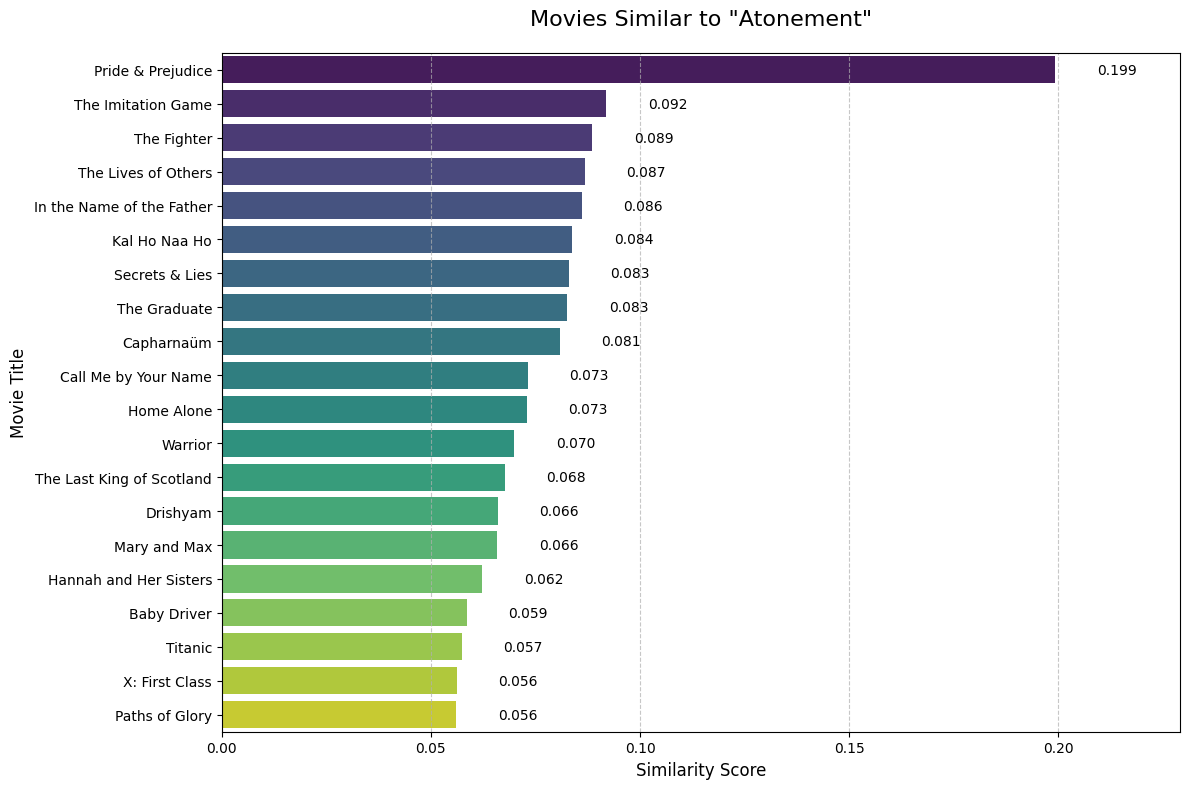

Series_Title  \
631          Pride & Prejudice   
338         The Imitation Game   
614                The Fighter   
67         The Lives of Others   
263  In the Name of the Father   
374              Kal Ho Naa Ho   
392             Secrets & Lies   
427               The Graduate   
53                  Capharnaüm   
467       Call Me by Your Name   
973                 Home Alone   
144                    Warrior   
766  The Last King of Scotland   
136                   Drishyam   
229               Mary and Max   
528     Hannah and Her Sisters   
888                Baby Driver   
652                    Titanic   
749             X: First Class   
80              Paths of Glory   

                                              Overview  \
631  Sparks fly when spirited Elizabeth Bennet meet...   
338  During World War II, the English mathematical ...   
614  Based on the story of Micky Ward, a fledgling ...   
67   In 1984 East Berlin, an agent of the secret po...   
263  A man's coerced confession to an I.R.A. bombin...   
374  Naina, an introverted, perpetually depressed g...   
392  Following the death of her adoptive parents, a...   
427  A disillusioned college graduate finds himself...   
53   While serving a five-year sentence for a viole...   
467  In 1980s Italy, romance blossoms between a sev...   
973  An eight-year-old troublemaker must protect hi...   
144  The youngest son of an alcoholic former boxer ...   
766  Based on the events of the brutal Ugandan dict...   
136  Desperate measures are taken by a man who trie...   
229  A tale of friendship between two unlikely pen ...   
528  Between two Thanksgivings two years apart, Han...   
888  After being coerced into working for a crime b...   
652  A seventeen-year-old aristocrat falls in love ...   
749  In the 1960s, superpowered humans Charles Xavi...   
80   After refusing to attack an enemy position, a ...   

                             Director                 Star1  \
631                        Joe Wright       Keira Knightley   
338                     Morten Tyldum  Benedict Cumberbatch   
614                  David O. Russell         Mark Wahlberg   
67   Florian Henckel von Donnersmarck           Ulrich Mühe   
263                      Jim Sheridan      Daniel Day-Lewis   
374                    Nikkhil Advani          Preity Zinta   
392                        Mike Leigh         Timothy Spall   
427                      Mike Nichols        Dustin Hoffman   
53                      Nadine Labaki        Zain Al Rafeea   
467                   Luca Guadagnino          Armie Hammer   
973                    Chris Columbus       Macaulay Culkin   
144                    Gavin O'Connor             Tom Hardy   
766                   Kevin Macdonald          James McAvoy   
136                   Nishikant Kamat            Ajay Devgn   
229                       Adam Elliot         Toni Collette   
528                       Woody Allen            Mia Farrow   
888                      Edgar Wright          Ansel Elgort   
652                     James Cameron     Leonardo DiCaprio   
749                    Matthew Vaughn          James McAvoy   
80                    Stanley Kubrick          Kirk Douglas   

                      Star2                        Star3  Similarity_Score  
631       Matthew Macfadyen               Brenda Blethyn          0.199224  
338         Keira Knightley                Matthew Goode          0.091870  
614          Christian Bale                    Amy Adams          0.088530  
67           Martina Gedeck               Sebastian Koch          0.086760  
263      Pete Postlethwaite               Alison Crosbie          0.086053  
374          Shah Rukh Khan                Saif Ali Khan          0.083718  
392          Brenda Blethyn                Phyllis Logan          0.082958  
427           Anne Bancroft               Katharine Ross          0.082565  
53        Yordanos Shiferaw  Boluwatife Treasure Bankole          0

In [ ]:
run_movie_recommender(df, "Atonement", 20)

In [ ]:
# Example usage
input_movie_name = "Atonement"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                      Series_Title  Cosine Similarity
0                        Atonement           1.000000
1                   Hable con ella           0.966254
2  Un long dimanche de fiançailles           0.964477
3            Trois couleurs: Rouge           0.948671
4           El secreto de sus ojos           0.910568
5                          Rebecca           0.882600


مینا داوری

Begin again

Good Movies

Top 20 movies similar to 'Once':
                            Series_Title  Similarity_Score
                             Sing Street          0.156220
               Hedwig and the Angry Inch          0.078005
                             Barton Fink          0.072642
My Left Foot: The Story of Christy Brown          0.066144
                              Short Cuts          0.060939
                   Trois couleurs: Blanc          0.060524
                           Almost Famous          0.057529
              The World's Fastest Indian          0.057052
                           La dolce vita          0.056894
                        Edge of Tomorrow          0.054573
        The Man Who Shot Liberty Valance          0.053890
                            Paddington 2          0.053743
                                Scarface          0.053017
                          Night on Earth          0.052753
    La leggenda del pianista sull'oceano          0.052342
                       

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


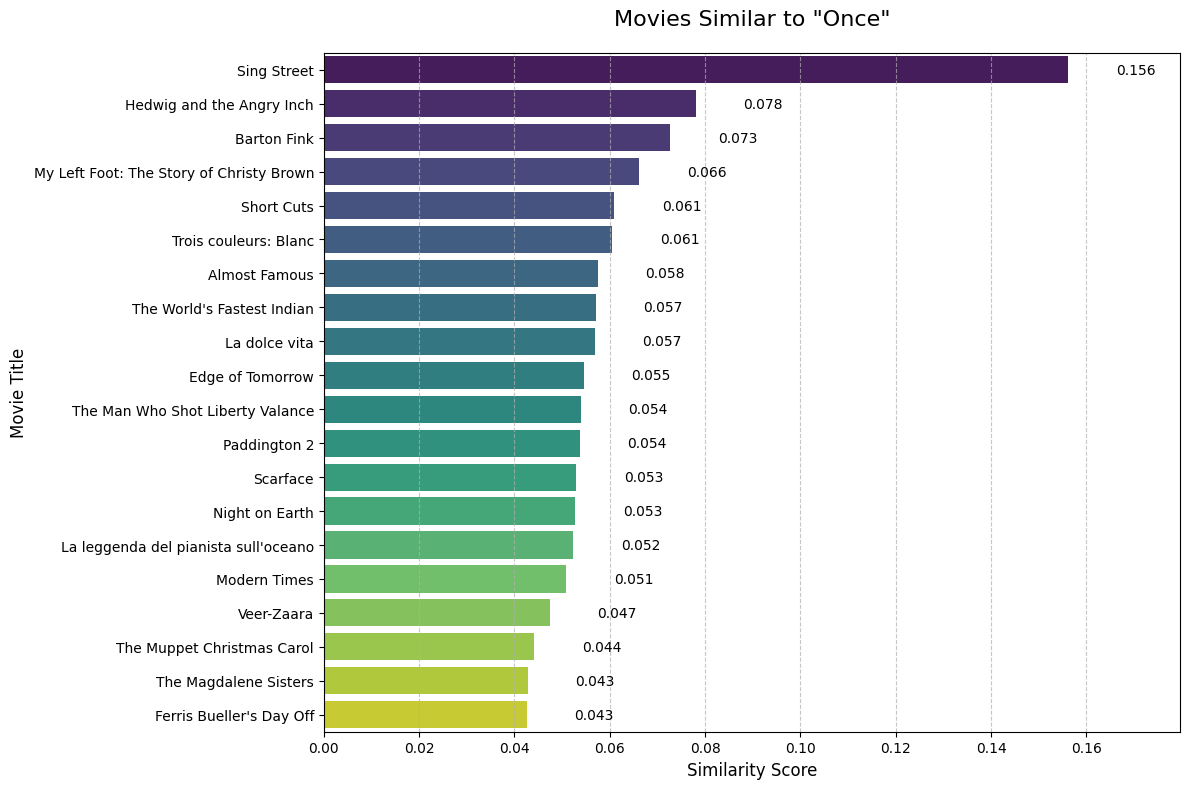

Series_Title  \
472                               Sing Street   
794                 Hedwig and the Angry Inch   
826                               Barton Fink   
525  My Left Foot: The Story of Christy Brown   
817                                Short Cuts   
967                     Trois couleurs: Blanc   
514                             Almost Famous   
632                The World's Fastest Indian   
435                             La dolce vita   
482                          Edge of Tomorrow   
295          The Man Who Shot Liberty Valance   
576                              Paddington 2   
108                                  Scarface   
667                            Night on Earth   
249      La leggenda del pianista sull'oceano   
51                               Modern Times   
629                                Veer-Zaara   
819                The Muppet Christmas Carol   
785                     The Magdalene Sisters   
679                  Ferris Bueller's Day Off   

                                              Overview               Director  \
472  A boy growing up in Dublin during the 1980s es...            John Carney   
794  A gender-queer punk-rock singer from East Berl...  John Cameron Mitchell   
826  A renowned New York playwright is enticed to C...              Joel Coen   
525  Christy Brown, born with cerebral palsy, learn...           Jim Sheridan   
817  The day-to-day lives of several suburban Los A...          Robert Altman   
967  After his wife divorces him, a Polish immigran...   Krzysztof Kieslowski   
514  A high-school boy is given the chance to write...          Cameron Crowe   
632  The story of New Zealander Burt Munro, who spe...        Roger Donaldson   
435  A series of stories following a week in the li...       Federico Fellini   
482  A soldier fighting aliens gets to relive the s...             Doug Liman   
295  A senator returns to a western town for the fu...              John Ford   
576  Paddington (Ben Whishaw), now happily settled ...              Paul King   
108  In 1980 Miami, a determined Cuban immigrant ta...         Brian De Palma   
667  An anthology of 5 different cab drivers in 5 A...           Jim Jarmusch   
249  A baby boy, discovered in 1900 on an ocean lin...     Giuseppe Tornatore   
51   The Tramp struggles to live in modern industri...        Charles Chaplin   
629  Veer-Zaara is a saga of love, separation, cour...            Yash Chopra   
819  The Muppet characters tell their version of th...           Brian Henson   
785  Three young Irish women struggle to maintain t...           Peter Mullan   
679  A high school wise guy is determined to have a...            John Hughes   

                     Star1                Star2                Star3  \
472     Ferdia Walsh-Peelo         Aidan Gillen  Maria Doyle Kennedy   
794  John Cameron Mitchell          Miriam Shor        Stephen Trask   
826             Ethan Coen        John Turturro         John Goodman   
525       Daniel Day-Lewis       Brenda Fricker        Alison Whelan   
817        Andie MacDowell       Julianne Moore          Tim Robbins   
967   Zbigniew Zamachowski          Julie Delpy         Janusz Gajos   
514           Billy Crudup        Patrick Fugit          Kate Hudson   
632        Anthony Hopkins           Diane Ladd             Iain Rea   
435   Marcello Mastroianni         Anita Ekberg          Anouk Aimée   
482             Tom Cruise          Emily Blunt          Bill Paxton   
295          James Stewart           John Wayne           Vera Miles   
576            Ben Whishaw           Hugh Grant      Hugh Bonneville   
108              Al Pacino    Michelle Pfeiffer         Steven Bauer   
667           Winona Ryder        Gena Rowlands         Lisanne Falk   
249               Tim Roth  Pruitt Taylor Vince      Mélanie Thierry   
51         Charles Chaplin     Paulette Goddard        Henry Bergman   
629         Shah Rukh Khan         Preity Zinta         Rani Mukerji   
819  

In [ ]:

run_movie_recommender(df, "Once", 20)

In [ ]:
# Example usage
input_movie_name = "Once"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                           Series_Title  Cosine Similarity
0                                  Once           1.000000
1                        A Star Is Born           0.954896
2                             Gully Boy           0.953222
3                         The Red Shoes           0.951719
4  La leggenda del pianista sull'oceano           0.947498
5                        Ba wang bie ji           0.876381
6           The Broken Circle Breakdown           0.870456


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Once"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Once':
Recommended movie: La leggenda del pianista sull'oceano
Similarity score: 0.9475
Source: Both approaches


Bad Movies

Top 20 movies similar to 'Before Sunrise':
                   Series_Title  Similarity_Score
                Before Midnight          0.361905
                  Before Sunset          0.235217
                    Waking Life          0.203344
                        Boyhood          0.180343
           Trois couleurs: Bleu          0.127467
              The Lady Vanishes          0.109769
          Trois couleurs: Blanc          0.102139
                    After Hours          0.093341
                        Gattaca          0.088174
                    Lord of War          0.081252
                   Training Day          0.075771
             Dazed and Confused          0.074547
             Dead Poets Society          0.072486
           Yeopgijeogin geunyeo          0.072156
Who's Afraid of Virginia Woolf?          0.071303
                The Illusionist          0.070991
                       Victoria          0.062516
             The Sound of Music          0.061245
       

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


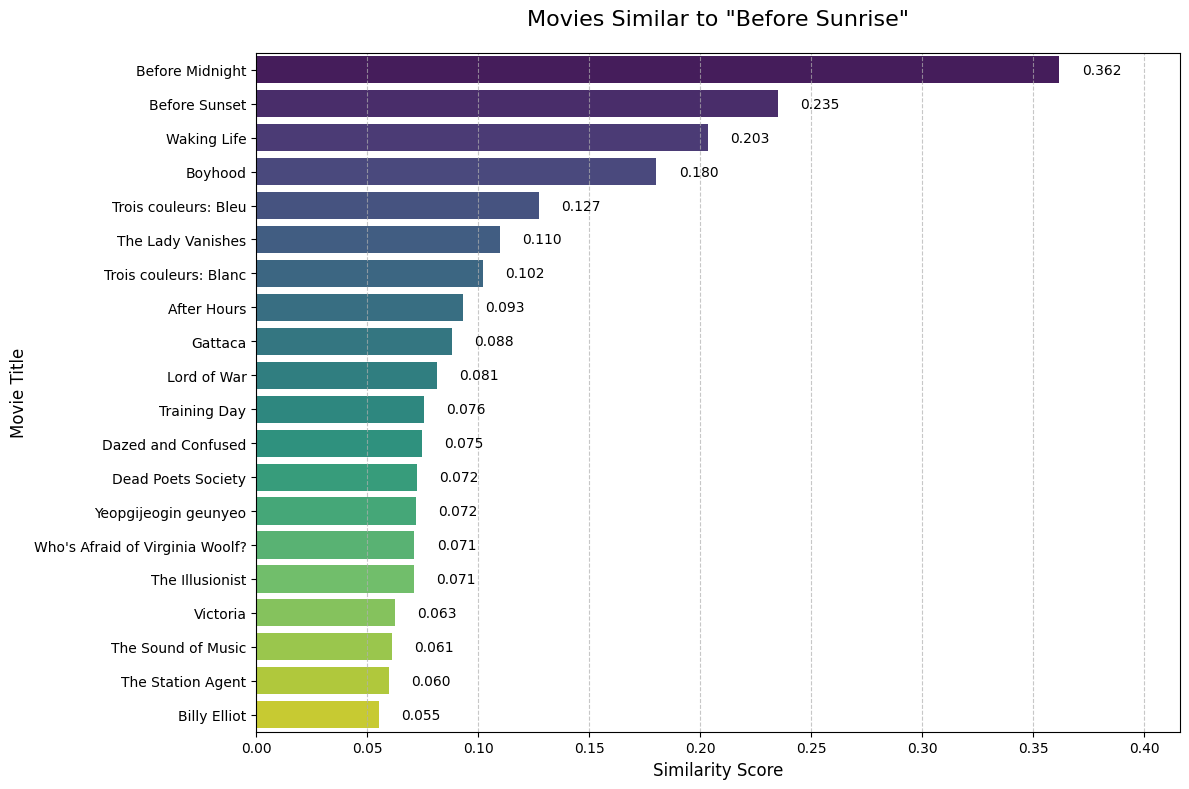

Series_Title  \
478                  Before Midnight   
237                    Before Sunset   
643                      Waking Life   
491                          Boyhood   
521             Trois couleurs: Bleu   
714                The Lady Vanishes   
967            Trois couleurs: Blanc   
836                      After Hours   
654                          Gattaca   
931                      Lord of War   
802                     Training Day   
969               Dazed and Confused   
266               Dead Poets Society   
379             Yeopgijeogin geunyeo   
428  Who's Afraid of Virginia Woolf?   
925                  The Illusionist   
885                         Victoria   
429               The Sound of Music   
937                The Station Agent   
793                     Billy Elliot   

                                              Overview              Director  \
478  We meet Jesse and Celine nine years on in Gree...     Richard Linklater   
237  Nine years after Jesse and Celine first met, t...     Richard Linklater   
643  A man shuffles through a dream meeting various...     Richard Linklater   
491  The life of Mason, from early childhood to his...     Richard Linklater   
521  A woman struggles to find a way to live her li...  Krzysztof Kieslowski   
714  While travelling in continental Europe, a rich...      Alfred Hitchcock   
967  After his wife divorces him, a Polish immigran...  Krzysztof Kieslowski   
836  An ordinary word processor has the worst night...       Martin Scorsese   
654  A genetically inferior man assumes the identit...         Andrew Niccol   
931  An arms dealer confronts the morality of his w...         Andrew Niccol   
802  A rookie cop spends his first day as a Los Ang...         Antoine Fuqua   
969  The adventures of high school and junior high ...     Richard Linklater   
266  Maverick teacher John Keating uses poetry to e...            Peter Weir   
379  A young man sees a drunk, cute woman standing ...        Jae-young Kwak   
428  A bitter, aging couple, with the help of alcoh...          Mike Nichols   
925  In turn-of-the-century Vienna, a magician uses...           Neil Burger   
885  A young Spanish woman who has recently moved t...    Sebastian Schipper   
429  A woman leaves an Austrian convent to become a...           Robert Wise   
937  When his only friend dies, a man born with dwa...          Tom McCarthy   
793  A talented young boy becomes torn between his ...        Stephen Daldry   

                    Star1                 Star2                     Star3  \
478           Ethan Hawke           Julie Delpy  Seamus Davey-Fitzpatrick   
237           Ethan Hawke           Julie Delpy          Vernon Dobtcheff   
643           Ethan Hawke    Trevor Jack Brooks         Lorelei Linklater   
491        Ellar Coltrane     Patricia Arquette               Ethan Hawke   
521      Juliette Binoche  Zbigniew Zamachowski               Julie Delpy   
714     Margaret Lockwood      Michael Redgrave                Paul Lukas   
967  Zbigniew Zamachowski           Julie Delpy              Janusz Gajos   
836         Griffin Dunne      Rosanna Arquette               Verna Bloom   
654           Ethan Hawke           Uma Thurman                  Jude Law   
931          Nicolas Cage           Ethan Hawke                Jared Leto   
802     Denzel Washington           Ethan Hawke               Scott Glenn   
969          Jason London         Wiley Wiggins       Matthew McConaughey   
266        Robin Williams   Robert Sean Leonard               Ethan Hawke   
379          Tae-Hyun Cha           Jun Ji-Hyun                In-mun Kim   
428      Elizabeth Taylor        Richard Burton              George Segal   
925         Edward Norton          Jessica Biel             Paul Giamatti   
885            Laia Costa         Frederick Lau            Franz Rogowski   
429         Julie Andrews   Christopher Plummer            Eleanor Parker   
937        Peter Dinklage     Patricia 

In [ ]:
run_movie_recommender(df, "Before Sunrise", 20)

In [ ]:
# Example usage
input_movie_name = "Before Sunrise"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                         Series_Title  Cosine Similarity
0                      Before Sunrise           1.000000
1                       Before Sunset           0.988633
2                Call Me by Your Name           0.984735
3                   Pride & Prejudice           0.965919
4                              Hævnen           0.963544
5                        The Notebook           0.960247
6                               Dev.D           0.958246
7                 Hiroshima mon amour           0.957024
8                      Days of Heaven           0.956931
9              The Fault in Our Stars           0.952793
10                       Little Women           0.951454
11                  Good Will Hunting           0.949592
12  Portrait de la jeune fille en feu           0.949010
13             The Remains of the Day           0.941017
14                              Amour           0.939735
15                  God's Own Country           0.937459
16              Sense and Sensi

فاطمه سلیمانی

The man from earth

Good Movie

Top 20 movies similar to 'The Martian':
        Series_Title  Similarity_Score
        Interstellar          0.144051
        Blade Runner          0.116454
           Gladiator          0.083089
           True Grit          0.083000
        The Departed          0.081945
 Gake no ue no Ponyo          0.080309
   Good Will Hunting          0.079752
    Dawn of the Dead          0.079482
 Saving Private Ryan          0.076122
The Bourne Supremacy          0.075872
The Bourne Ultimatum          0.074038
                Moon          0.071970
   American Gangster          0.071403
 The Bourne Identity          0.068524
     Black Hawk Down          0.068054
               Alien          0.067457
             Gravity          0.066542
        The Avengers          0.061743
        The Revenant          0.059697
      Ford v Ferrari          0.055845


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


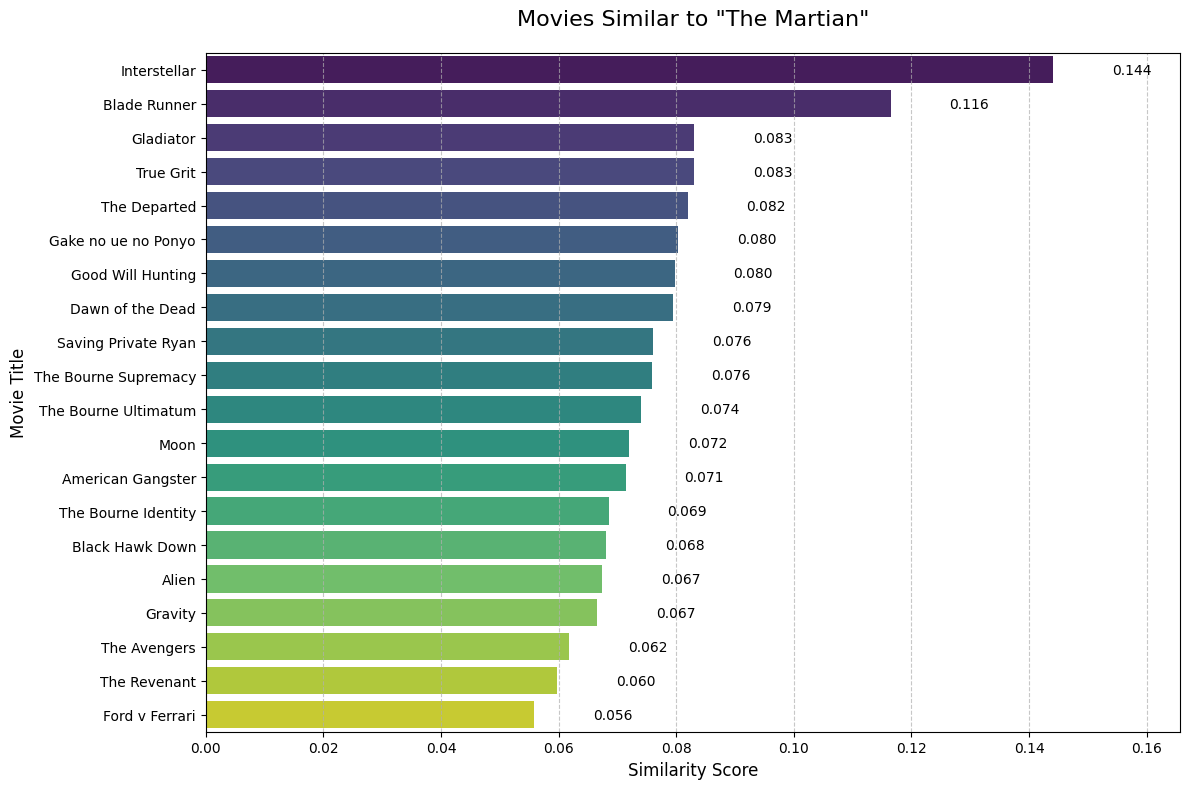

Series_Title                                           Overview  \
21           Interstellar  A team of explorers travel through a wormhole ...   
275          Blade Runner  A blade runner must pursue and terminate four ...   
39              Gladiator  A former Roman General sets out to exact venge...   
904             True Grit  A stubborn teenager enlists the help of a toug...   
37           The Departed  An undercover cop and a mole in the police att...   
756   Gake no ue no Ponyo  A five-year-old boy develops a relationship wi...   
99      Good Will Hunting  Will Hunting, a janitor at M.I.T., has a gift ...   
535      Dawn of the Dead  Following an ever-growing epidemic of zombies ...   
24    Saving Private Ryan  Following the Normandy Landings, a group of U....   
777  The Bourne Supremacy  When Jason Bourne is framed for a CIA operatio...   
362  The Bourne Ultimatum  Jason Bourne dodges a ruthless C.I.A. official...   
486                  Moon  Astronaut Sam Bell has a quintessentially pers...   
622     American Gangster  An outcast New York City cop is charged with b...   
511   The Bourne Identity  A man is picked up by a fishing boat, bullet-r...   
790       Black Hawk Down  160 elite U.S. soldiers drop into Somalia to c...   
75                  Alien  After a space merchant vessel receives an unkn...   
745               Gravity  Two astronauts work together to survive after ...   
357          The Avengers  Earth's mightiest heroes must come together an...   
343          The Revenant  A frontiersman on a fur trading expedition in ...   
217        Ford v Ferrari  American car designer Carroll Shelby and drive...   

                  Director                Star1            Star2  \
21       Christopher Nolan  Matthew McConaughey    Anne Hathaway   
275           Ridley Scott        Harrison Ford     Rutger Hauer   
39            Ridley Scott        Russell Crowe  Joaquin Phoenix   
904             Ethan Coen            Joel Coen     Jeff Bridges   
37         Martin Scorsese    Leonardo DiCaprio       Matt Damon   
756         Hayao Miyazaki       Cate Blanchett       Matt Damon   
99            Gus Van Sant       Robin Williams       Matt Damon   
535       George A. Romero           David Emge        Ken Foree   
24        Steven Spielberg            Tom Hanks       Matt Damon   
777        Paul Greengrass           Matt Damon   Franka Potente   
362        Paul Greengrass           Matt Damon    Edgar Ramírez   
486           Duncan Jones         Sam Rockwell     Kevin Spacey   
622           Ridley Scott    Denzel Washington    Russell Crowe   
511             Doug Liman       Franka Potente       Matt Damon   
790           Ridley Scott        Josh Hartnett    Ewan McGregor   
75            Ridley Scott     Sigourney Weaver     Tom Skerritt   
745         Alfonso Cuarón       Sandra Bullock   George Clooney   
357            Joss Whedon    Robert Downey Jr.      Chris Evans   
343  Alejandro G. Iñárritu    Leonardo DiCaprio        Tom Hardy   
217          James Mangold           Matt Damon   Christian Bale   

                    Star3  Similarity_Score  
21       Jessica Chastain          0.144051  
275            Sean Young          0.116454  
39         Connie Nielsen          0.083089  
904            Matt Damon          0.083000  
37         Jack Nicholson          0.081945  
756           Liam Neeson          0.080309  
99            Ben Affleck          0.079752  
535     Scott H. Reiniger          0.079482  
24           Tom Sizemore          0.076122  
777            Joan Allen          0.075872  
362            Joan Allen          0.074038  
486  Dominique McElligott          0.071970  
622      Chiwetel Ejiofor          0.071403  
511          Chris Cooper          0.068524  
790          Tom Sizemore          0.068054  
75              John Hurt          0.067457  
745             Ed Harris          0.066542  
357    Scarlett Johansson          0.061743  
343          Will Poulter    

In [ ]:

run_movie_recommender(df, "The Martian", 20)

In [ ]:
# Example usage
input_movie_name = "The Martian"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

      Series_Title  Cosine Similarity
0      The Martian           1.000000
1  Children of Men           0.986088
2     Interstellar           0.959956


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "The Martian"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'The Martian':
Recommended movie: Interstellar
Similarity score: 0.9600
Source: Both approaches


Bad Movies

Top 20 movies similar to 'Blade Runner 2049':
                      Series_Title  Similarity_Score
                      Blade Runner          0.282477
                         Prisoners          0.136844
                        Knives Out          0.120803
                           Arrival          0.087699
                         Incendies          0.085305
                           Sicario          0.078972
                        La La Land          0.075336
                             Drive          0.074913
                       Blue Velvet          0.074243
                     The Big Short          0.069516
Indiana Jones and the Last Crusade          0.069115
                          Deadpool          0.064074
   The Girl with the Dragon Tattoo          0.063650
       Once Upon a Time in America          0.062617
           When Harry Met Sally...          0.057197
                Back to the Future          0.055641
           Raiders of the Lost Ark          0.054651


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


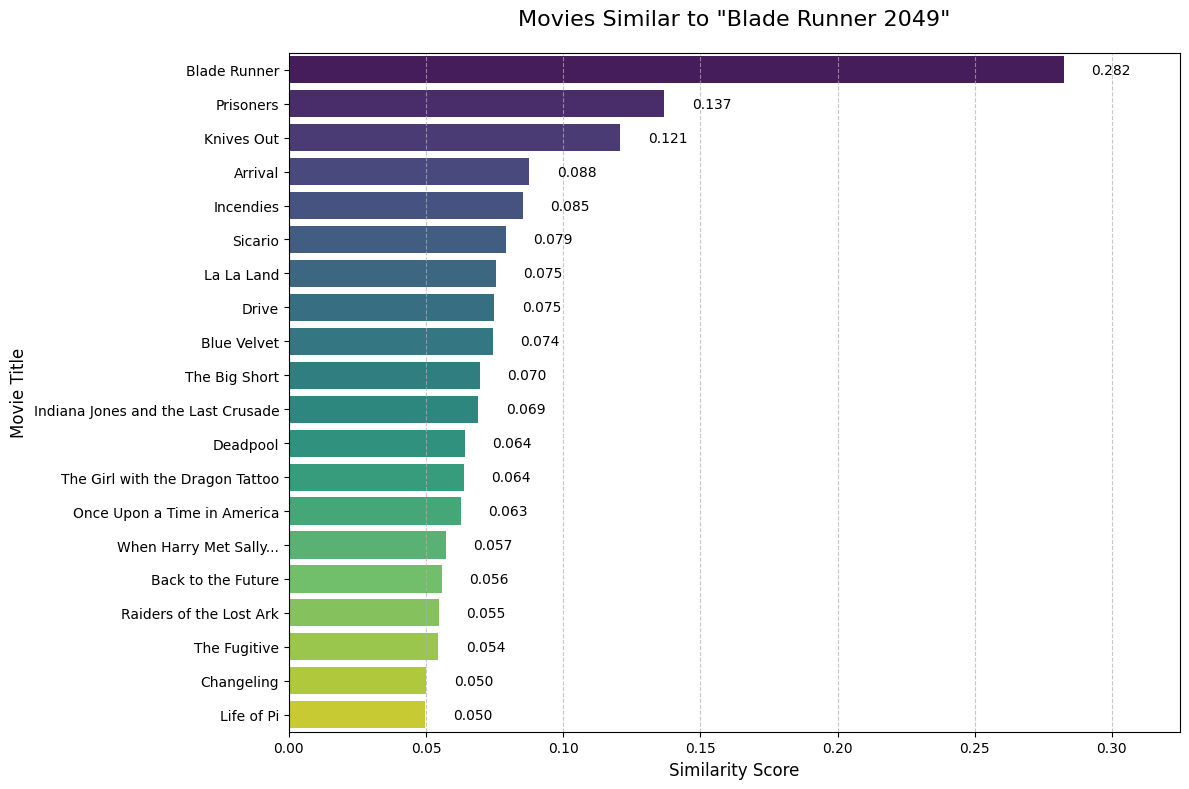

Series_Title  \
275                        Blade Runner   
222                           Prisoners   
463                          Knives Out   
476                             Arrival   
90                            Incendies   
893                             Sicario   
327                          La La Land   
621                               Drive   
834                         Blue Velvet   
600                       The Big Short   
168  Indiana Jones and the Last Crusade   
348                            Deadpool   
603     The Girl with the Dragon Tattoo   
71          Once Upon a Time in America   
975             When Harry Met Sally...   
47                   Back to the Future   
72              Raiders of the Lost Ark   
663                        The Fugitive   
759                          Changeling   
498                          Life of Pi   

                                              Overview              Director  \
275  A blade runner must pursue and terminate four ...          Ridley Scott   
222  When Keller Dover's daughter and her friend go...      Denis Villeneuve   
463  A detective investigates the death of a patria...          Rian Johnson   
476  A linguist works with the military to communic...      Denis Villeneuve   
90   Twins journey to the Middle East to discover t...      Denis Villeneuve   
893  An idealistic FBI agent is enlisted by a gover...      Denis Villeneuve   
327  While navigating their careers in Los Angeles,...       Damien Chazelle   
621  A mysterious Hollywood stuntman and mechanic m...  Nicolas Winding Refn   
834  The discovery of a severed human ear found in ...           David Lynch   
600  In 2006-2007 a group of investors bet against ...            Adam McKay   
168  In 1938, after his father Professor Henry Jone...      Steven Spielberg   
348  A wisecracking mercenary gets experimented on ...            Tim Miller   
603  Journalist Mikael Blomkvist is aided in his se...         David Fincher   
71   A former Prohibition-era Jewish gangster retur...          Sergio Leone   
975  Harry and Sally have known each other for year...            Rob Reiner   
47   Marty McFly, a 17-year-old high school student...       Robert Zemeckis   
72   In 1936, archaeologist and adventurer Indiana ...      Steven Spielberg   
663  Dr. Richard Kimble, unjustly accused of murder...          Andrew Davis   
759  Grief-stricken mother Christine Collins (Angel...        Clint Eastwood   
498  A young man who survives a disaster at sea is ...               Ang Lee   

                   Star1                      Star2                Star3  \
275        Harrison Ford               Rutger Hauer           Sean Young   
222         Hugh Jackman            Jake Gyllenhaal          Viola Davis   
463         Daniel Craig                Chris Evans         Ana de Armas   
476            Amy Adams              Jeremy Renner      Forest Whitaker   
90          Lubna Azabal  Mélissa Désormeaux-Poulin       Maxim Gaudette   
893          Emily Blunt                Josh Brolin     Benicio Del Toro   
327         Ryan Gosling                 Emma Stone     Rosemarie DeWitt   
621         Ryan Gosling             Carey Mulligan       Bryan Cranston   
834  Isabella Rossellini            Kyle MacLachlan        Dennis Hopper   
600       Christian Bale               Steve Carell         Ryan Gosling   
168        Harrison Ford               Sean Connery         Alison Doody   
348        Ryan Reynolds            Morena Baccarin          T.J. Miller   
603         Daniel Craig                Rooney Mara  Christopher Plummer   
71        Robert De Niro                James Woods   Elizabeth McGovern   
975        Billy Crystal                   Meg Ryan        Carrie Fisher   
47        Michael J. Fox          Christopher Lloyd         Lea Thompson   
72         Harrison Ford                Karen Allen         Paul Freeman   
663        Harrison Ford            Tommy Lee Jones            Sela Ward  

In [ ]:

run_movie_recommender(df, "Blade Runner 2049", 20)

In [ ]:
# Example usage
input_movie_name = "Blade Runner 2049"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

        Series_Title  Cosine Similarity
0  Blade Runner 2049           1.000000
1           Watchmen           0.969818
2           The Game           0.926422
3            Seppuku           0.918668
4           Oldeuboi           0.877890


سلیم جوانمردی

Master and Commander: The Far Side of the World

Good Movies

Top 20 movies similar to 'Big Fish':
          Series_Title  Similarity_Score
         Trainspotting          0.145929
     Miller's Crossing          0.143534
               Ed Wood          0.126355
       Black Hawk Down          0.114160
   Edward Scissorhands          0.106510
       American Beauty          0.103421
         Almost Famous          0.099079
          Finding Nemo          0.084090
     Road to Perdition          0.083551
Les quatre cents coups          0.082521
       Ace in the Hole          0.080061
           Sling Blade          0.076947
 It's a Wonderful Life          0.075165
     Kramer vs. Kramer          0.073420
       Ordinary People          0.071781
                Jagten          0.070026
         The Apartment          0.067914
 Cat on a Hot Tin Roof          0.067386
             Searching          0.065826
         Roman Holiday          0.061808


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


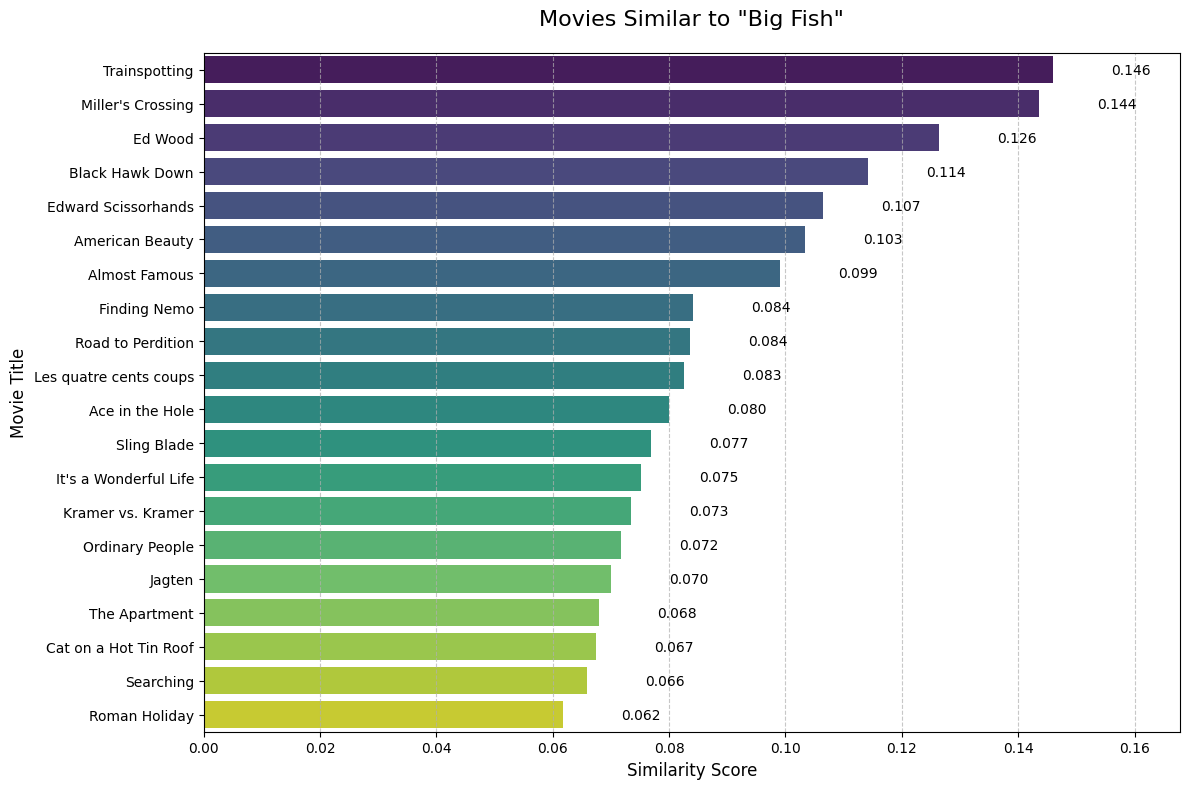

Series_Title  \
254           Trainspotting   
827       Miller's Crossing   
657                 Ed Wood   
790         Black Hawk Down   
524     Edward Scissorhands   
98          American Beauty   
514           Almost Famous   
242            Finding Nemo   
791       Road to Perdition   
299  Les quatre cents coups   
307         Ace in the Hole   
391             Sling Blade   
32    It's a Wonderful Life   
689       Kramer vs. Kramer   
841         Ordinary People   
88                   Jagten   
117           The Apartment   
439   Cat on a Hot Tin Roof   
878               Searching   
446           Roman Holiday   

                                              Overview            Director  \
254  Renton, deeply immersed in the Edinburgh drug ...         Danny Boyle   
827  Tom Reagan, an advisor to a Prohibition-era cr...           Joel Coen   
657  Ambitious but troubled movie director Edward D...          Tim Burton   
790  160 elite U.S. soldiers drop into Somalia to c...        Ridley Scott   
524  An artificial man, who was incompletely constr...          Tim Burton   
98   A sexually frustrated suburban father has a mi...          Sam Mendes   
514  A high-school boy is given the chance to write...       Cameron Crowe   
242  After his son is captured in the Great Barrier...      Andrew Stanton   
791  A mob enforcer's son witnesses a murder, forci...          Sam Mendes   
299  A young boy, left without attention, delves in...   François Truffaut   
307  A frustrated former big-city journalist now st...        Billy Wilder   
391  Karl Childers, a simple man hospitalized since...  Billy Bob Thornton   
32   An angel is sent from Heaven to help a despera...         Frank Capra   
689  Ted Kramer's wife leaves him, allowing for a l...       Robert Benton   
841  The accidental death of the older son of an af...      Robert Redford   
88   A teacher lives a lonely life, all the while s...   Thomas Vinterberg   
117  A man tries to rise in his company by letting ...        Billy Wilder   
439  Brick is an alcoholic ex-football player who d...      Richard Brooks   
878  After his teenage daughter goes missing, a des...     Aneesh Chaganty   
446  A bored and sheltered princess escapes her gua...       William Wyler   

                  Star1             Star2                 Star3  \
254       Ewan McGregor      Ewen Bremner      Jonny Lee Miller   
827          Ethan Coen     Gabriel Byrne         Albert Finney   
657         Johnny Depp     Martin Landau  Sarah Jessica Parker   
790       Josh Hartnett     Ewan McGregor          Tom Sizemore   
524         Johnny Depp      Winona Ryder          Dianne Wiest   
98         Kevin Spacey    Annette Bening           Thora Birch   
514        Billy Crudup     Patrick Fugit           Kate Hudson   
242         Lee Unkrich     Albert Brooks       Ellen DeGeneres   
791           Tom Hanks    Tyler Hoechlin             Rob Maxey   
299   Jean-Pierre Léaud       Albert Rémy        Claire Maurier   
307        Kirk Douglas      Jan Sterling         Robert Arthur   
391  Billy Bob Thornton     Dwight Yoakam            J.T. Walsh   
32        James Stewart        Donna Reed      Lionel Barrymore   
689      Dustin Hoffman      Meryl Streep        Jane Alexander   
841   Donald Sutherland  Mary Tyler Moore           Judd Hirsch   
88       Mads Mikkelsen  Thomas Bo Larsen     Annika Wedderkopp   
117         Jack Lemmon  Shirley MacLaine        Fred MacMurray   
439    Elizabeth Taylor       Paul Newman             Burl Ives   
878            John Cho     Debra Messing            Joseph Lee   
446        Gregory Peck    Audrey Hepburn          Eddie Albert   

     Similarity_Score  
254          0.145929  
827          0.143534  
657          0.126355  
790          0.114160  
524          0.106510  
98           0.103421  
514          0.099079  
242          0.084090  
791          0.083551  
299          0.082521  
307          0.080061  
391          0.076947  
32  

In [ ]:
run_movie_recommender(df, "Big Fish", 20)


In [ ]:
# Example usage
input_movie_name = "Big Fish"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                                   Series_Title  Cosine Similarity
0                                      Big Fish           1.000000
1                                      Dead Man           0.988236
2                            La montaña sagrada           0.971348
3                                      The Fall           0.939748
4  Harry Potter and the Deathly Hallows: Part 2           0.930229
5                                    Life of Pi           0.926178


Bad Movies

Top 20 movies similar to 'Forrest Gump':
                                   Series_Title  Similarity_Score
                                      Cast Away          0.114846
                             The Princess Bride          0.106917
                                          Dev.D          0.094653
                               Captain Phillips          0.080878
                                            JFK          0.076703
                            Saving Private Ryan          0.071728
                                        The Kid          0.066564
                                      Andhadhun          0.066402
                                The Longest Day          0.065412
                                        Platoon          0.064738
                                 The Green Mile          0.063656
                      The Last King of Scotland          0.062828
Das weiße Band - Eine deutsche Kindergeschichte          0.062785
                        Who Framed 

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


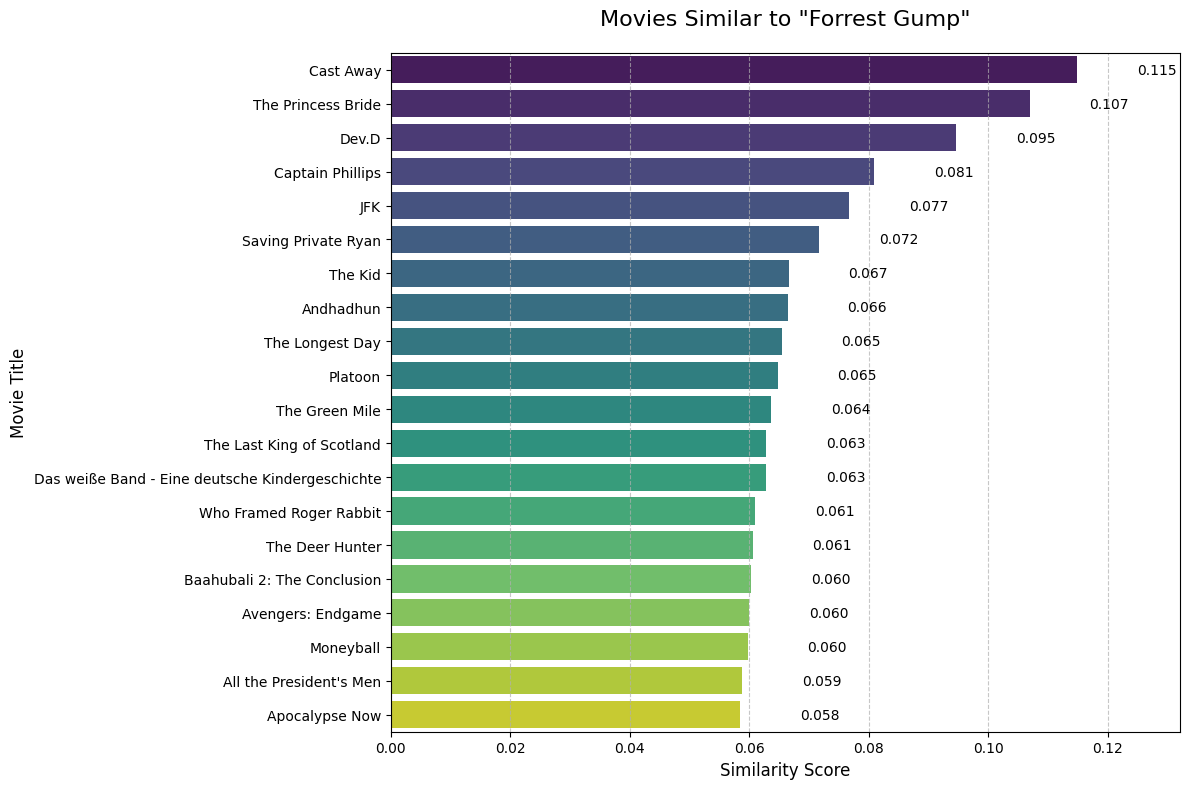

Series_Title  \
647                                        Cast Away   
406                               The Princess Bride   
350                                            Dev.D   
604                                 Captain Phillips   
400                                              JFK   
24                               Saving Private Ryan   
127                                          The Kid   
86                                         Andhadhun   
705                                  The Longest Day   
268                                          Platoon   
25                                    The Green Mile   
766                        The Last King of Scotland   
610  Das weiße Band - Eine deutsche Kindergeschichte   
828                          Who Framed Roger Rabbit   
278                                  The Deer Hunter   
134                      Baahubali 2: The Conclusion   
59                                 Avengers: Endgame   
910                                        Moneyball   
536                          All the President's Men   
74                                    Apocalypse Now   

                                              Overview              Director  \
647  A FedEx executive undergoes a physical and emo...       Robert Zemeckis   
406  While home sick in bed, a young boy's grandfat...            Rob Reiner   
350  After breaking up with his childhood sweethear...        Anurag Kashyap   
604  The true story of Captain Richard Phillips and...       Paul Greengrass   
400  New Orleans District Attorney Jim Garrison dis...          Oliver Stone   
24   Following the Normandy Landings, a group of U....      Steven Spielberg   
127  The Tramp cares for an abandoned child, but ev...       Charles Chaplin   
86   A series of mysterious events change the life ...       Sriram Raghavan   
705  The events of D-Day, told on a grand scale fro...           Ken Annakin   
268  Chris Taylor, a neophyte recruit in Vietnam, f...          Oliver Stone   
25   The lives of guards on Death Row are affected ...        Frank Darabont   
766  Based on the events of the brutal Ugandan dict...       Kevin Macdonald   
610  Strange events happen in a small village in th...        Michael Haneke   
828  A toon-hating detective is a cartoon rabbit's ...       Robert Zemeckis   
278  An in-depth examination of the ways in which t...        Michael Cimino   
134  When Shiva, the son of Bahubali, learns about ...        S.S. Rajamouli   
59   After the devastating events of Avengers: Infi...         Anthony Russo   
910  Oakland A's general manager Billy Beane's succ...        Bennett Miller   
536  "The Washington Post" reporters Bob Woodward a...        Alan J. Pakula   
74   A U.S. Army officer serving in Vietnam is task...  Francis Ford Coppola   

                  Star1                  Star2               Star3  \
647           Tom Hanks             Helen Hunt        Paul Sanchez   
406          Cary Elwes         Mandy Patinkin        Robin Wright   
350          Abhay Deol             Mahie Gill      Kalki Koechlin   
604           Tom Hanks           Barkhad Abdi  Barkhad Abdirahman   
400       Kevin Costner            Gary Oldman         Jack Lemmon   
24            Tom Hanks             Matt Damon        Tom Sizemore   
127     Charles Chaplin         Edna Purviance       Jackie Coogan   
86   Ayushmann Khurrana                   Tabu        Radhika Apte   
705       Andrew Marton            Gerd Oswald      Bernhard Wicki   
268       Charlie Sheen           Tom Berenger        Willem Dafoe   
25            Tom Hanks  Michael Clarke Duncan         David Morse   
766        James McAvoy        Forest Whitaker    Gillian Anderson   
610   Christian Friedel           Ernst Jacobi      Leonie Benesch   
828         Bob Hoskins      Christopher Lloyd      Joanna Cassidy   
278      Robert De Niro     Christopher Walken         John Cazale   
134             Prabhas         Rana Daggubati      Anushka Sh

In [ ]:

run_movie_recommender(df, "Forrest Gump", 20)

In [ ]:
# Example usage
input_movie_name = "Forrest Gump"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                       Series_Title  Cosine Similarity
0                      Forrest Gump           1.000000
1     The Bridges of Madison County           0.979658
2             The Last Picture Show           0.976409
3                      The Lunchbox           0.974714
4                Brokeback Mountain           0.973468
5                   Smultronstället           0.952404
6                   Before Midnight           0.947330
7     Sunrise: A Song of Two Humans           0.943918
8            The Remains of the Day           0.942995
9   The Perks of Being a Wallflower           0.939620
10            Sense and Sensibility           0.928206
11                            Dev.D           0.923238
12                            Amour           0.919888
13                     Little Women           0.917686
14                Good Will Hunting           0.916656
15      Dilwale Dulhania Le Jayenge           0.913046
16            Nuovo Cinema Paradiso           0.912706
17        

مریم میرشاهزاده

About time

Good Movies

Top 20 movies similar to 'La La Land':
                    Series_Title  Similarity_Score
                        Whiplash          0.106817
                 Boyz n the Hood          0.097374
                      Short Cuts          0.092387
                           Drive          0.087110
                   The Big Short          0.080834
                    Training Day          0.079162
                           Crash          0.075764
               Blade Runner 2049          0.075336
                        Die Hard          0.074680
               L.A. Confidential          0.072295
Once Upon a Time... in Hollywood          0.070144
                     Höstsonaten          0.070042
     The Broken Circle Breakdown          0.069286
                        The Help          0.064666
                  Mulholland Dr.          0.063652
                  Dil Chahta Hai          0.063042
          Straight Outta Compton          0.062612
                 Minority Report          0

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


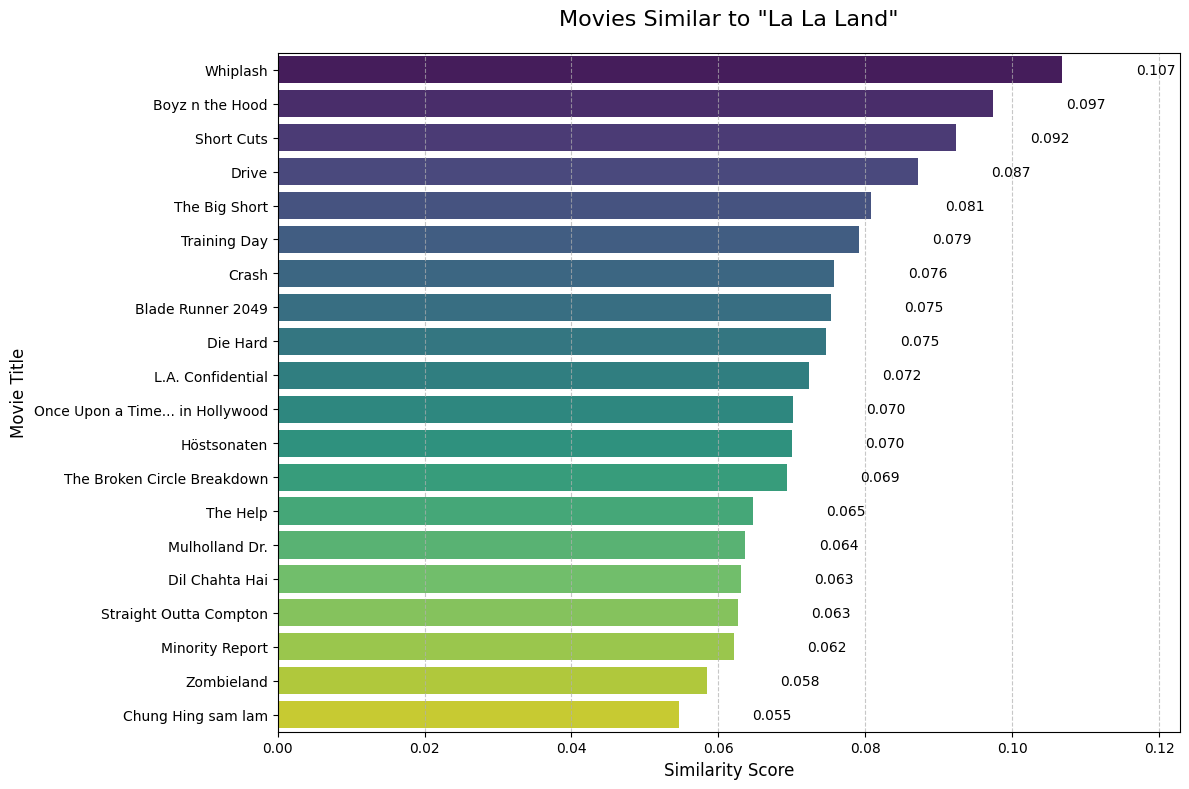

Series_Title  \
34                           Whiplash   
669                   Boyz n the Hood   
817                        Short Cuts   
621                             Drive   
600                     The Big Short   
802                      Training Day   
775                             Crash   
340                 Blade Runner 2049   
171                          Die Hard   
162                 L.A. Confidential   
879  Once Upon a Time... in Hollywood   
175                       Höstsonaten   
736       The Broken Circle Breakdown   
347                          The Help   
515                    Mulholland Dr.   
240                    Dil Chahta Hai   
606            Straight Outta Compton   
951                   Minority Report   
912                        Zombieland   
261                Chung Hing sam lam   

                                              Overview              Director  \
34   A promising young drummer enrolls at a cut-thr...       Damien Chazelle   
669  Follows the lives of three young males living ...        John Singleton   
817  The day-to-day lives of several suburban Los A...         Robert Altman   
621  A mysterious Hollywood stuntman and mechanic m...  Nicolas Winding Refn   
600  In 2006-2007 a group of investors bet against ...            Adam McKay   
802  A rookie cop spends his first day as a Los Ang...         Antoine Fuqua   
775  Los Angeles citizens with vastly separate live...           Paul Haggis   
340  Young Blade Runner K's discovery of a long-bur...      Denis Villeneuve   
171  An NYPD officer tries to save his wife and sev...        John McTiernan   
162  As corruption grows in 1950s Los Angeles, thre...         Curtis Hanson   
879  A faded television actor and his stunt double ...     Quentin Tarantino   
175  A married daughter who longs for her mother's ...        Ingmar Bergman   
736  Elise and Didier fall in love at first sight, ...  Felix van Groeningen   
347  An aspiring author during the civil rights mov...           Tate Taylor   
515  After a car wreck on the winding Mulholland Dr...           David Lynch   
240  Three inseparable childhood friends are just o...         Farhan Akhtar   
606  The rap group NWA emerges from the mean street...          F. Gary Gray   
951  In a future where a special police unit is abl...      Steven Spielberg   
912  A shy student trying to reach his family in Oh...       Ruben Fleischer   
261  Two melancholy Hong Kong policemen fall in lov...          Kar-Wai Wong   

                  Star1               Star2                Star3  \
34         Miles Teller        J.K. Simmons      Melissa Benoist   
669    Cuba Gooding Jr.  Laurence Fishburne      Hudhail Al-Amir   
817     Andie MacDowell      Julianne Moore          Tim Robbins   
621        Ryan Gosling      Carey Mulligan       Bryan Cranston   
600      Christian Bale        Steve Carell         Ryan Gosling   
802   Denzel Washington         Ethan Hawke          Scott Glenn   
775         Don Cheadle      Sandra Bullock       Thandie Newton   
340       Harrison Ford        Ryan Gosling         Ana de Armas   
171        Bruce Willis        Alan Rickman       Bonnie Bedelia   
162        Kevin Spacey       Russell Crowe           Guy Pearce   
879   Leonardo DiCaprio           Brad Pitt        Margot Robbie   
175      Ingrid Bergman         Liv Ullmann           Lena Nyman   
736      Veerle Baetens   Johan Heldenbergh       Nell Cattrysse   
347          Emma Stone         Viola Davis      Octavia Spencer   
515         Naomi Watts       Laura Harring       Justin Theroux   
240          Aamir Khan       Saif Ali Khan       Akshaye Khanna   
606  O'Shea Jackson Jr.       Corey Hawkins       Jason Mitchell   
951          Tom Cruise       Colin Farrell      Samantha Morton   
912     Jesse Eisenberg          Emma Stone      Woody Harrelson   
261        Brigitte Lin   Takeshi Kaneshiro  Tony Chiu-Wai Leung   

     Similarity_Score  
34           0.106817  
669  

In [ ]:

run_movie_recommender(df, "La La Land", 20)

In [ ]:
#Example usage
input_movie_name = "La La Land"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                Series_Title  Cosine Similarity
0                 La La Land           1.000000
1  Hedwig and the Angry Inch           0.937713
2                Sing Street           0.902796


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "La La Land"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'La La Land':
Recommended movie: Hedwig and the Angry Inch
Similarity score: 0.9377
Source: Siamese network


Bad Movies

Top 20 movies similar to 'Once':
                            Series_Title  Similarity_Score
                             Sing Street          0.156220
               Hedwig and the Angry Inch          0.078005
                             Barton Fink          0.072642
My Left Foot: The Story of Christy Brown          0.066144
                              Short Cuts          0.060939
                   Trois couleurs: Blanc          0.060524
                           Almost Famous          0.057529
              The World's Fastest Indian          0.057052
                           La dolce vita          0.056894
                        Edge of Tomorrow          0.054573
        The Man Who Shot Liberty Valance          0.053890
                            Paddington 2          0.053743
                                Scarface          0.053017
                          Night on Earth          0.052753
    La leggenda del pianista sull'oceano          0.052342
                       

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


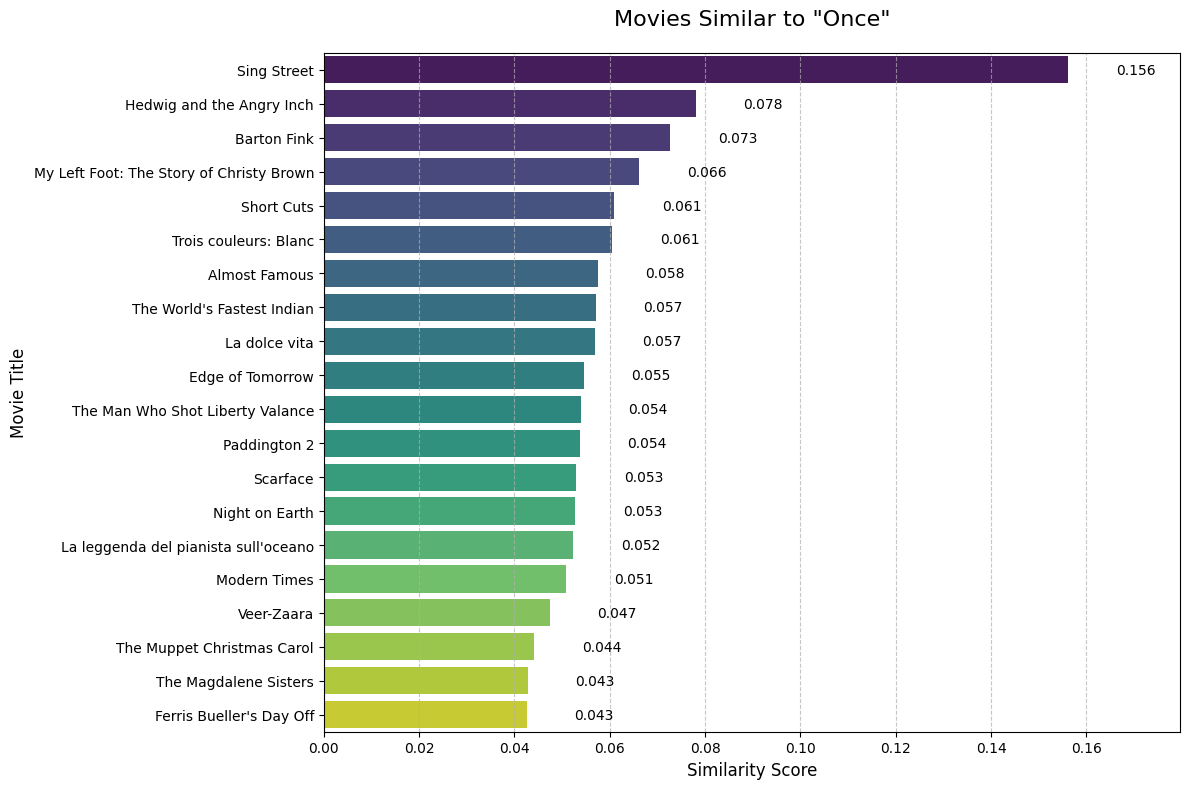

Series_Title  \
472                               Sing Street   
794                 Hedwig and the Angry Inch   
826                               Barton Fink   
525  My Left Foot: The Story of Christy Brown   
817                                Short Cuts   
967                     Trois couleurs: Blanc   
514                             Almost Famous   
632                The World's Fastest Indian   
435                             La dolce vita   
482                          Edge of Tomorrow   
295          The Man Who Shot Liberty Valance   
576                              Paddington 2   
108                                  Scarface   
667                            Night on Earth   
249      La leggenda del pianista sull'oceano   
51                               Modern Times   
629                                Veer-Zaara   
819                The Muppet Christmas Carol   
785                     The Magdalene Sisters   
679                  Ferris Bueller's Day Off   

                                              Overview               Director  \
472  A boy growing up in Dublin during the 1980s es...            John Carney   
794  A gender-queer punk-rock singer from East Berl...  John Cameron Mitchell   
826  A renowned New York playwright is enticed to C...              Joel Coen   
525  Christy Brown, born with cerebral palsy, learn...           Jim Sheridan   
817  The day-to-day lives of several suburban Los A...          Robert Altman   
967  After his wife divorces him, a Polish immigran...   Krzysztof Kieslowski   
514  A high-school boy is given the chance to write...          Cameron Crowe   
632  The story of New Zealander Burt Munro, who spe...        Roger Donaldson   
435  A series of stories following a week in the li...       Federico Fellini   
482  A soldier fighting aliens gets to relive the s...             Doug Liman   
295  A senator returns to a western town for the fu...              John Ford   
576  Paddington (Ben Whishaw), now happily settled ...              Paul King   
108  In 1980 Miami, a determined Cuban immigrant ta...         Brian De Palma   
667  An anthology of 5 different cab drivers in 5 A...           Jim Jarmusch   
249  A baby boy, discovered in 1900 on an ocean lin...     Giuseppe Tornatore   
51   The Tramp struggles to live in modern industri...        Charles Chaplin   
629  Veer-Zaara is a saga of love, separation, cour...            Yash Chopra   
819  The Muppet characters tell their version of th...           Brian Henson   
785  Three young Irish women struggle to maintain t...           Peter Mullan   
679  A high school wise guy is determined to have a...            John Hughes   

                     Star1                Star2                Star3  \
472     Ferdia Walsh-Peelo         Aidan Gillen  Maria Doyle Kennedy   
794  John Cameron Mitchell          Miriam Shor        Stephen Trask   
826             Ethan Coen        John Turturro         John Goodman   
525       Daniel Day-Lewis       Brenda Fricker        Alison Whelan   
817        Andie MacDowell       Julianne Moore          Tim Robbins   
967   Zbigniew Zamachowski          Julie Delpy         Janusz Gajos   
514           Billy Crudup        Patrick Fugit          Kate Hudson   
632        Anthony Hopkins           Diane Ladd             Iain Rea   
435   Marcello Mastroianni         Anita Ekberg          Anouk Aimée   
482             Tom Cruise          Emily Blunt          Bill Paxton   
295          James Stewart           John Wayne           Vera Miles   
576            Ben Whishaw           Hugh Grant      Hugh Bonneville   
108              Al Pacino    Michelle Pfeiffer         Steven Bauer   
667           Winona Ryder        Gena Rowlands         Lisanne Falk   
249               Tim Roth  Pruitt Taylor Vince      Mélanie Thierry   
51         Charles Chaplin     Paulette Goddard        Henry Bergman   
629         Shah Rukh Khan         Preity Zinta         Rani Mukerji   
819  

In [ ]:

run_movie_recommender(df, "Once", 20)

In [ ]:
#Example usage
input_movie_name = "Once"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                           Series_Title  Cosine Similarity
0                                  Once           1.000000
1                        A Star Is Born           0.954896
2                             Gully Boy           0.953222
3                         The Red Shoes           0.951719
4  La leggenda del pianista sull'oceano           0.947498
5                        Ba wang bie ji           0.876381
6           The Broken Circle Breakdown           0.870456


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Once"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Once':
Recommended movie: La leggenda del pianista sull'oceano
Similarity score: 0.9475
Source: Both approaches


علی نادریان

Before we go

Good Movies

Top 20 movies similar to 'Eternal Sunshine of the Spotless Mind':
            Series_Title  Similarity_Score
         The Truman Show          0.122196
       Finding Neverland          0.118185
                 Titanic          0.104962
   Sense and Sensibility          0.094648
              The Artist          0.090308
               Cast Away          0.088941
               Apollo 13          0.072637
The Theory of Everything          0.072190
             Down by Law          0.067843
             The Visitor          0.064793
             The Verdict          0.062377
                   Amour          0.061341
       Shaun of the Dead          0.059537
          On Golden Pond          0.057716
           Belle de jour          0.054337
                      8½          0.053694
   The Day of the Jackal          0.052240
               Dark City          0.050565
          Gone Baby Gone          0.050439
     Saving Private Ryan          0.049671


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


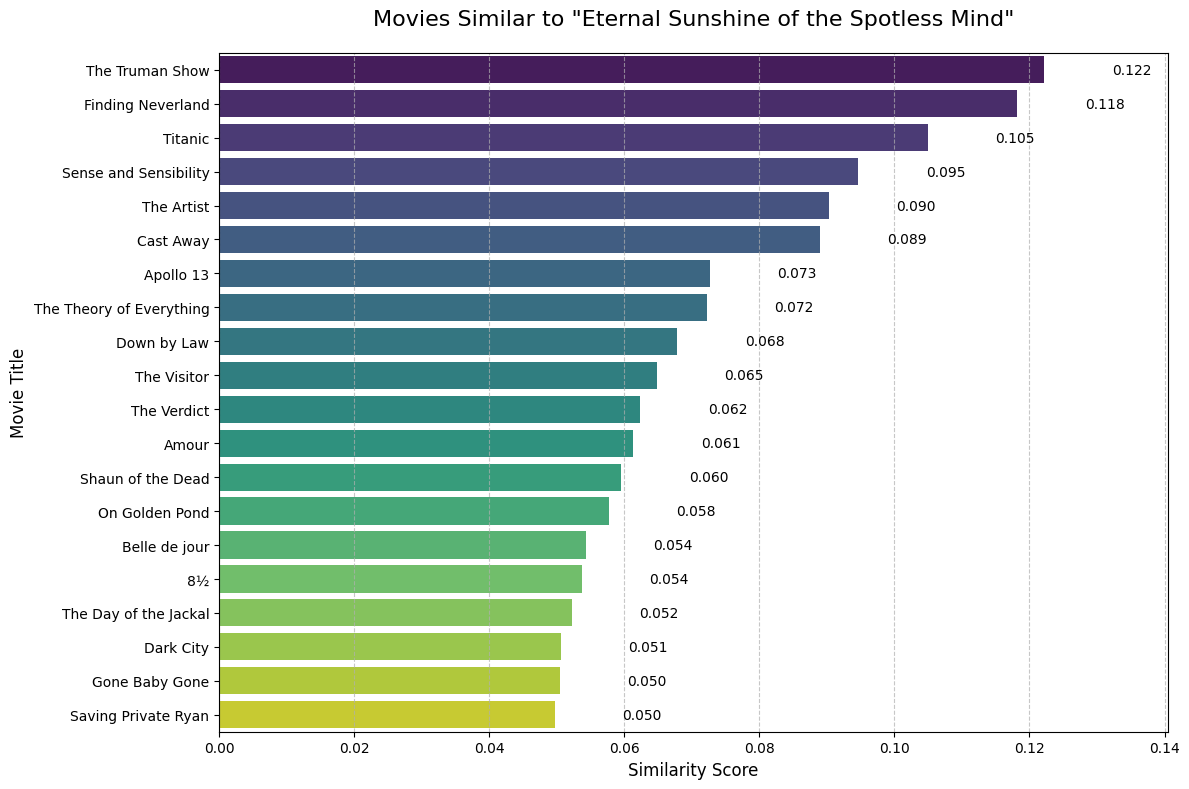

Series_Title  \
250           The Truman Show   
940         Finding Neverland   
652                   Titanic   
962     Sense and Sensibility   
481                The Artist   
647                 Cast Away   
966                 Apollo 13   
729  The Theory of Everything   
680               Down by Law   
916               The Visitor   
838               The Verdict   
483                     Amour   
503         Shaun of the Dead   
981            On Golden Pond   
857             Belle de jour   
432                        8½   
695     The Day of the Jackal   
959                 Dark City   
922            Gone Baby Gone   
24        Saving Private Ryan   

                                              Overview             Director  \
250  An insurance salesman discovers his whole life...           Peter Weir   
940  The story of Sir J.M. Barrie's friendship with...         Marc Forster   
652  A seventeen-year-old aristocrat falls in love ...        James Cameron   
962  Rich Mr. Dashwood dies, leaving his second wif...              Ang Lee   
481  An egomaniacal film star develops a relationsh...  Michel Hazanavicius   
647  A FedEx executive undergoes a physical and emo...      Robert Zemeckis   
966  NASA must devise a strategy to return Apollo 1...           Ron Howard   
729  A look at the relationship between the famous ...          James Marsh   
680  Two men are framed and sent to jail, where the...         Jim Jarmusch   
916  A college professor travels to New York City t...         Tom McCarthy   
838  A lawyer sees the chance to salvage his career...         Sidney Lumet   
483  Georges and Anne are an octogenarian couple. T...       Michael Haneke   
503  A man's uneventful life is disrupted by the zo...         Edgar Wright   
981  Norman is a curmudgeon with an estranged relat...          Mark Rydell   
857  A frigid young housewife decides to spend her ...          Luis Buñuel   
432  A harried movie director retreats into his mem...     Federico Fellini   
695  A professional assassin codenamed "Jackal" plo...       Fred Zinnemann   
959  A man struggles with memories of his past, whi...          Alex Proyas   
922  Two Boston area detectives investigate a littl...          Ben Affleck   
24   Following the Normandy Landings, a group of U....     Steven Spielberg   

                      Star1               Star2              Star3  \
250              Jim Carrey           Ed Harris       Laura Linney   
940             Johnny Depp        Kate Winslet     Julie Christie   
652       Leonardo DiCaprio        Kate Winslet         Billy Zane   
962           Emma Thompson        Kate Winslet        James Fleet   
481           Jean Dujardin       Bérénice Bejo       John Goodman   
647               Tom Hanks          Helen Hunt       Paul Sanchez   
966               Tom Hanks         Bill Paxton        Kevin Bacon   
729          Eddie Redmayne      Felicity Jones          Tom Prior   
680               Tom Waits          John Lurie    Roberto Benigni   
916         Richard Jenkins        Haaz Sleiman       Danai Gurira   
838             Paul Newman  Charlotte Rampling        Jack Warden   
483  Jean-Louis Trintignant     Emmanuelle Riva   Isabelle Huppert   
503              Simon Pegg          Nick Frost      Kate Ashfield   
981       Katharine Hepburn         Henry Fonda         Jane Fonda   
857       Catherine Deneuve          Jean Sorel     Michel Piccoli   
432    Marcello Mastroianni         Anouk Aimée  Claudia Cardinale   
695              Edward Fox   Terence Alexander     Michel Auclair   
959            Rufus Sewell   Kiefer Sutherland  Jennifer Connelly   
922          Morgan Freeman           Ed Harris      Casey Affleck   
24                Tom Hanks          Matt Damon       Tom Sizemore   

     Similarity_Score  
250          0.122196  
940          0.118185  
652          0.104962  
962          0.094648  
481          0.090308  
647          0.088941  
966          0.072637  


In [ ]:


run_movie_recommender(df, "Eternal Sunshine of the Spotless Mind", 20)

In [ ]:
#Example usage
input_movie_name = "Eternal Sunshine of the Spotless Mind"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                            Series_Title  Cosine Similarity
0  Eternal Sunshine of the Spotless Mind           1.000000
1                                    Her           0.928565


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Eternal Sunshine of the Spotless Mind"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Eternal Sunshine of the Spotless Mind':
Recommended movie: Her
Similarity score: 0.9286
Source: Siamese network


Good Movies

Top 20 movies similar to 'Atonement':
             Series_Title  Similarity_Score
        Pride & Prejudice          0.199224
       The Imitation Game          0.091870
              The Fighter          0.088530
      The Lives of Others          0.086760
In the Name of the Father          0.086053
            Kal Ho Naa Ho          0.083718
           Secrets & Lies          0.082958
             The Graduate          0.082565
               Capharnaüm          0.080786
     Call Me by Your Name          0.073146
               Home Alone          0.072859
                  Warrior          0.069862
The Last King of Scotland          0.067664
                 Drishyam          0.065963
             Mary and Max          0.065771
   Hannah and Her Sisters          0.062175
              Baby Driver          0.058543
                  Titanic          0.057318
           X: First Class          0.056148
           Paths of Glory          0.055962


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


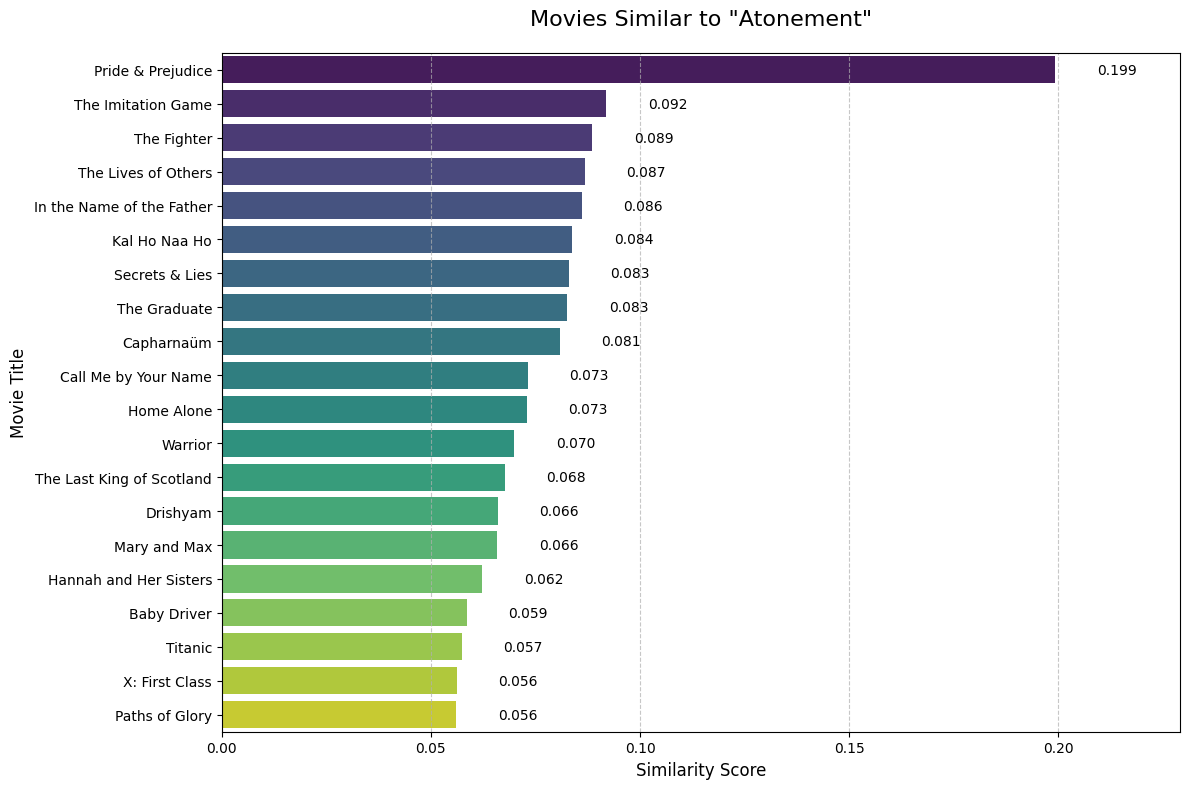

Series_Title  \
631          Pride & Prejudice   
338         The Imitation Game   
614                The Fighter   
67         The Lives of Others   
263  In the Name of the Father   
374              Kal Ho Naa Ho   
392             Secrets & Lies   
427               The Graduate   
53                  Capharnaüm   
467       Call Me by Your Name   
973                 Home Alone   
144                    Warrior   
766  The Last King of Scotland   
136                   Drishyam   
229               Mary and Max   
528     Hannah and Her Sisters   
888                Baby Driver   
652                    Titanic   
749             X: First Class   
80              Paths of Glory   

                                              Overview  \
631  Sparks fly when spirited Elizabeth Bennet meet...   
338  During World War II, the English mathematical ...   
614  Based on the story of Micky Ward, a fledgling ...   
67   In 1984 East Berlin, an agent of the secret po...   
263  A man's coerced confession to an I.R.A. bombin...   
374  Naina, an introverted, perpetually depressed g...   
392  Following the death of her adoptive parents, a...   
427  A disillusioned college graduate finds himself...   
53   While serving a five-year sentence for a viole...   
467  In 1980s Italy, romance blossoms between a sev...   
973  An eight-year-old troublemaker must protect hi...   
144  The youngest son of an alcoholic former boxer ...   
766  Based on the events of the brutal Ugandan dict...   
136  Desperate measures are taken by a man who trie...   
229  A tale of friendship between two unlikely pen ...   
528  Between two Thanksgivings two years apart, Han...   
888  After being coerced into working for a crime b...   
652  A seventeen-year-old aristocrat falls in love ...   
749  In the 1960s, superpowered humans Charles Xavi...   
80   After refusing to attack an enemy position, a ...   

                             Director                 Star1  \
631                        Joe Wright       Keira Knightley   
338                     Morten Tyldum  Benedict Cumberbatch   
614                  David O. Russell         Mark Wahlberg   
67   Florian Henckel von Donnersmarck           Ulrich Mühe   
263                      Jim Sheridan      Daniel Day-Lewis   
374                    Nikkhil Advani          Preity Zinta   
392                        Mike Leigh         Timothy Spall   
427                      Mike Nichols        Dustin Hoffman   
53                      Nadine Labaki        Zain Al Rafeea   
467                   Luca Guadagnino          Armie Hammer   
973                    Chris Columbus       Macaulay Culkin   
144                    Gavin O'Connor             Tom Hardy   
766                   Kevin Macdonald          James McAvoy   
136                   Nishikant Kamat            Ajay Devgn   
229                       Adam Elliot         Toni Collette   
528                       Woody Allen            Mia Farrow   
888                      Edgar Wright          Ansel Elgort   
652                     James Cameron     Leonardo DiCaprio   
749                    Matthew Vaughn          James McAvoy   
80                    Stanley Kubrick          Kirk Douglas   

                      Star2                        Star3  Similarity_Score  
631       Matthew Macfadyen               Brenda Blethyn          0.199224  
338         Keira Knightley                Matthew Goode          0.091870  
614          Christian Bale                    Amy Adams          0.088530  
67           Martina Gedeck               Sebastian Koch          0.086760  
263      Pete Postlethwaite               Alison Crosbie          0.086053  
374          Shah Rukh Khan                Saif Ali Khan          0.083718  
392          Brenda Blethyn                Phyllis Logan          0.082958  
427           Anne Bancroft               Katharine Ross          0.082565  
53        Yordanos Shiferaw  Boluwatife Treasure Bankole          0

In [ ]:

run_movie_recommender(df, "Atonement", 20)

In [ ]:
#Example usage
input_movie_name = "Atonement"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                      Series_Title  Cosine Similarity
0                        Atonement           1.000000
1                   Hable con ella           0.966254
2  Un long dimanche de fiançailles           0.964477
3            Trois couleurs: Rouge           0.948671
4           El secreto de sus ojos           0.910568
5                          Rebecca           0.882600


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Atonement"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Atonement':
Recommended movie: Hable con ella
Similarity score: 0.9663
Source: Siamese network


شهلا ملکی

Short Term 12

Good Movies

Top 20 movies similar to 'Prisoners':
              Series_Title  Similarity_Score
         Blade Runner 2049          0.136844
                     Logan          0.110356
        Brokeback Mountain          0.103090
              End of Watch          0.100548
                   Arrival          0.099522
                 Incendies          0.096806
              The Prestige          0.093602
X-Men: Days of Future Past          0.089850
                   Sicario          0.089619
               October Sky          0.082211
              Nightcrawler          0.082173
                  The Help          0.081309
       Edward Scissorhands          0.077251
              Donnie Darko          0.076208
                 Searching          0.071613
                    Zodiac          0.070495
                   Kahaani          0.061553
              Paddington 2          0.057516
           American Beauty          0.057026
            Kelly's Heroes          0.054218


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


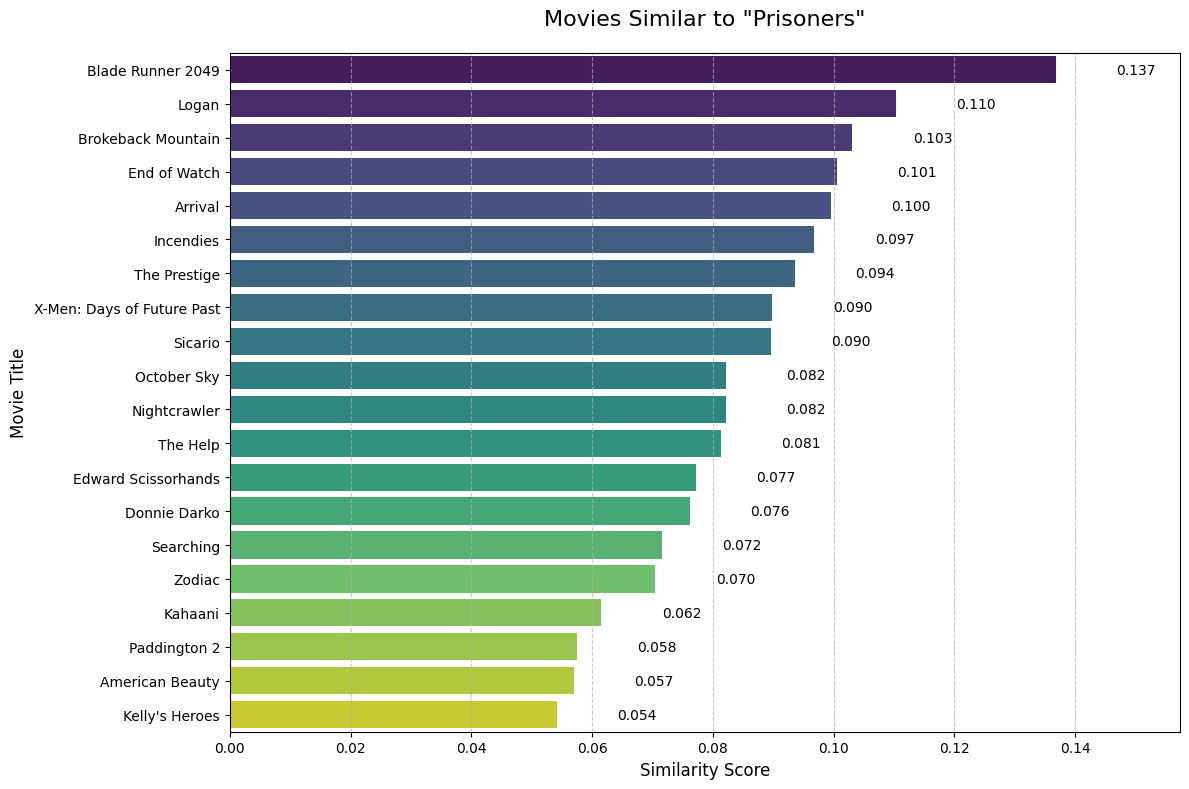

Series_Title  \
340           Blade Runner 2049   
202                       Logan   
773          Brokeback Mountain   
901                End of Watch   
476                     Arrival   
90                    Incendies   
36                 The Prestige   
479  X-Men: Days of Future Past   
893                     Sicario   
650                 October Sky   
474                Nightcrawler   
347                    The Help   
524         Edward Scissorhands   
382                Donnie Darko   
878                   Searching   
767                      Zodiac   
220                     Kahaani   
576                Paddington 2   
98              American Beauty   
991              Kelly's Heroes   

                                              Overview           Director  \
340  Young Blade Runner K's discovery of a long-bur...   Denis Villeneuve   
202  In a future where mutants are nearly extinct, ...      James Mangold   
773  The story of a forbidden and secretive relatio...            Ang Lee   
901  Shot documentary-style, this film follows the ...         David Ayer   
476  A linguist works with the military to communic...   Denis Villeneuve   
90   Twins journey to the Middle East to discover t...   Denis Villeneuve   
36   After a tragic accident, two stage magicians e...  Christopher Nolan   
479  The X-Men send Wolverine to the past in a desp...       Bryan Singer   
893  An idealistic FBI agent is enlisted by a gover...   Denis Villeneuve   
650  The true story of Homer Hickam, a coal miner's...       Joe Johnston   
474  When Louis Bloom, a con man desperate for work...         Dan Gilroy   
347  An aspiring author during the civil rights mov...        Tate Taylor   
524  An artificial man, who was incompletely constr...         Tim Burton   
382  After narrowly escaping a bizarre accident, a ...      Richard Kelly   
878  After his teenage daughter goes missing, a des...    Aneesh Chaganty   
767  In the late 1960s/early 1970s, a San Francisco...      David Fincher   
220  A pregnant woman's search for her missing husb...        Sujoy Ghosh   
576  Paddington (Ben Whishaw), now happily settled ...          Paul King   
98   A sexually frustrated suburban father has a mi...         Sam Mendes   
991  A group of U.S. soldiers sneaks across enemy l...    Brian G. Hutton   

               Star1                      Star2               Star3  \
340    Harrison Ford               Ryan Gosling        Ana de Armas   
202     Hugh Jackman            Patrick Stewart          Dafne Keen   
773  Jake Gyllenhaal               Heath Ledger   Michelle Williams   
901  Jake Gyllenhaal               Michael Peña       Anna Kendrick   
476        Amy Adams              Jeremy Renner     Forest Whitaker   
90      Lubna Azabal  Mélissa Désormeaux-Poulin      Maxim Gaudette   
36    Christian Bale               Hugh Jackman  Scarlett Johansson   
479  Patrick Stewart               Ian McKellen        Hugh Jackman   
893      Emily Blunt                Josh Brolin    Benicio Del Toro   
650  Jake Gyllenhaal               Chris Cooper          Laura Dern   
474  Jake Gyllenhaal                 Rene Russo         Bill Paxton   
347       Emma Stone                Viola Davis     Octavia Spencer   
524      Johnny Depp               Winona Ryder        Dianne Wiest   
382  Jake Gyllenhaal                Jena Malone      Mary McDonnell   
878         John Cho              Debra Messing          Joseph Lee   
767  Jake Gyllenhaal          Robert Downey Jr.        Mark Ruffalo   
220      Vidya Balan   Parambrata Chattopadhyay  Indraneil Sengupta   
576      Ben Whishaw                 Hugh Grant     Hugh Bonneville   
98      Kevin Spacey             Annette Bening         Thora Birch   
991   Clint Eastwood              Telly Savalas         Don Rickles   

     Similarity_Score  
340          0.136844  
202          0.110356  
773          0.103090  
901          0.100548  
476          0.099522  
90           0.096806  
36   

In [ ]:

run_movie_recommender(df, "Prisoners", 20)

In [ ]:
#Example usage
input_movie_name = "Prisoners"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                       Series_Title  Cosine Similarity
0                         Prisoners           1.000000
1                        Inside Man           0.983652
2                       Primal Fear           0.976215
3                        Wind River           0.975926
4                    Salinui chueok           0.970812
5                      Contratiempo           0.969792
6                      Mystic River           0.965100
7                             Se7en           0.964122
8          In the Heat of the Night           0.959795
9                 L.A. Confidential           0.959698
10              Anatomy of a Murder           0.957217
11                           Zodiac           0.953903
12              La migliore offerta           0.952007
13  The Girl with the Dragon Tattoo           0.951254
14      Witness for the Prosecution           0.950233
15                   Gone Baby Gone           0.949926
16                Der Name der Rose           0.949232
17        

Bad Movies

Top 20 movies similar to 'Mystic River':
                   Series_Title  Similarity_Score
            Million Dollar Baby          0.203958
  The Bridges of Madison County          0.188670
         The Outlaw Josey Wales          0.185808
                     Short Cuts          0.177911
                     Unforgiven          0.165079
       The Shawshank Redemption          0.154172
                    Gran Torino          0.135595
                    Stand by Me          0.128675
                      Apollo 13          0.126041
Il buono, il brutto, il cattivo          0.125882
           Escape from Alcatraz          0.122141
                       I Am Sam          0.120397
                    Dark Waters          0.110611
                    Frost/Nixon          0.108919
                       21 Grams          0.104275
     Per qualche dollaro in più          0.102972
              The Thin Red Line          0.102254
                 Kelly's Heroes          0.098565
         

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


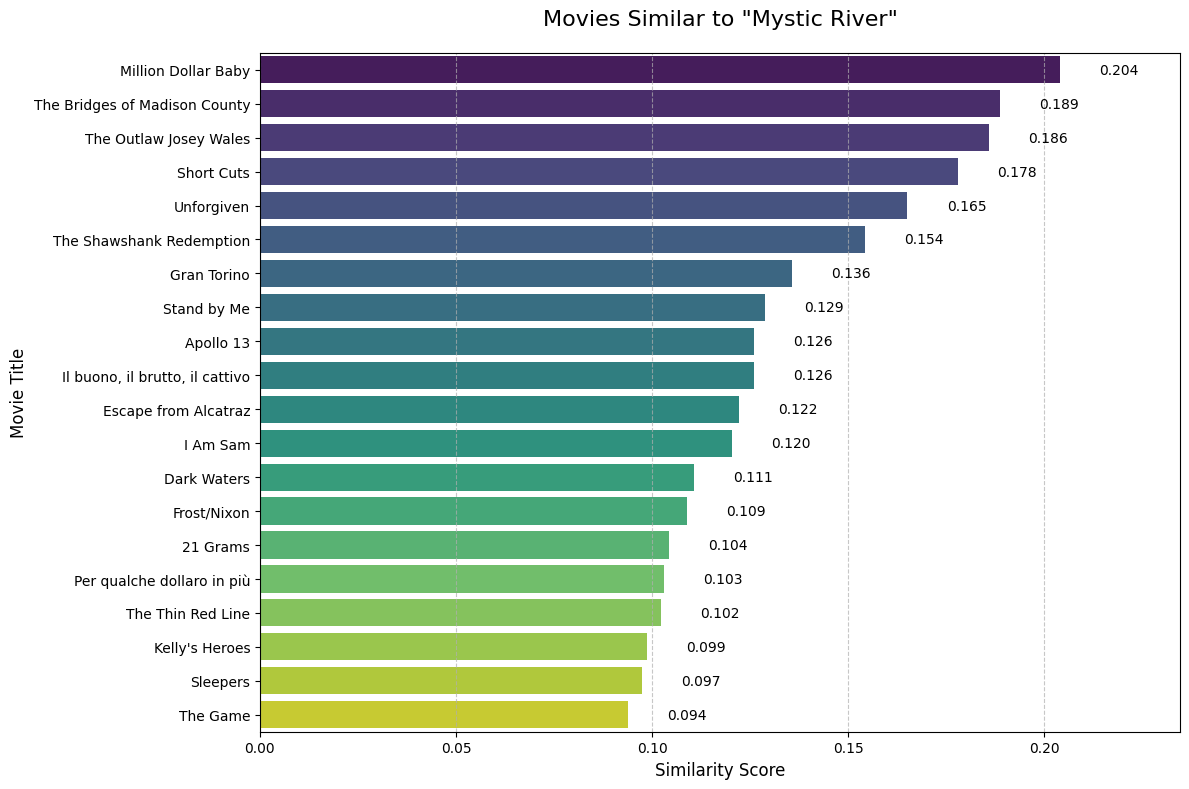

Series_Title  \
234              Million Dollar Baby   
965    The Bridges of Madison County   
691           The Outlaw Josey Wales   
817                       Short Cuts   
167                       Unforgiven   
0           The Shawshank Redemption   
225                      Gran Torino   
267                      Stand by Me   
966                        Apollo 13   
12   Il buono, il brutto, il cattivo   
985             Escape from Alcatraz   
788                         I Am Sam   
877                      Dark Waters   
757                      Frost/Nixon   
938                         21 Grams   
115       Per qualche dollaro in più   
955                The Thin Red Line   
991                   Kelly's Heroes   
960                         Sleepers   
655                         The Game   

                                              Overview               Director  \
234  A determined woman works with a hardened boxin...         Clint Eastwood   
965  Photographer Robert Kincaid wanders into the l...         Clint Eastwood   
691  Missouri farmer Josey Wales joins a Confederat...         Clint Eastwood   
817  The day-to-day lives of several suburban Los A...          Robert Altman   
167  Retired Old West gunslinger William Munny relu...         Clint Eastwood   
0    Two imprisoned men bond over a number of years...         Frank Darabont   
225  Disgruntled Korean War veteran Walt Kowalski s...         Clint Eastwood   
267  After the death of one of his friends, a write...             Rob Reiner   
966  NASA must devise a strategy to return Apollo 1...             Ron Howard   
12   A bounty hunting scam joins two men in an unea...           Sergio Leone   
985  Alcatraz is the most secure prison of its time...             Don Siegel   
788  A mentally handicapped man fights for custody ...          Jessie Nelson   
877  A corporate defense attorney takes on an envir...            Todd Haynes   
757  A dramatic retelling of the post-Watergate tel...             Ron Howard   
938  A freak accident brings together a critically ...  Alejandro G. Iñárritu   
115  Two bounty hunters with the same intentions te...           Sergio Leone   
955  Adaptation of James Jones' autobiographical 19...        Terrence Malick   
991  A group of U.S. soldiers sneaks across enemy l...        Brian G. Hutton   
960  After a prank goes disastrously wrong, a group...         Barry Levinson   
655  After a wealthy banker is given an opportunity...          David Fincher   

               Star1               Star2               Star3  Similarity_Score  
234     Hilary Swank      Clint Eastwood      Morgan Freeman          0.203958  
965   Clint Eastwood        Meryl Streep        Annie Corley          0.188670  
691   Clint Eastwood        Sondra Locke    Chief Dan George          0.185808  
817  Andie MacDowell      Julianne Moore         Tim Robbins          0.177911  
167   Clint Eastwood        Gene Hackman      Morgan Freeman          0.165079  
0        Tim Robbins      Morgan Freeman          Bob Gunton          0.154172  
225   Clint Eastwood            Bee Vang  Christopher Carley          0.135595  
267      Wil Wheaton       River Phoenix       Corey Feldman          0.128675  
966        Tom Hanks         Bill Paxton         Kevin Bacon          0.126041  
12    Clint Eastwood         Eli Wallach       Lee Van Cleef          0.125882  
985   Clint Eastwood    Patrick McGoohan     Roberts Blossom          0.122141  
788        Sean Penn   Michelle Pfeiffer      Dakota Fanning          0.120397  
877     Mark Ruffalo       Anne Hathaway         Tim Robbins          0.110611  
757   Frank Langella       Michael Sheen         Kevin Bacon          0.108919  
938        Sean Penn    Benicio Del Toro         Naomi Watts          0.104275  
115   Clint Eastwood       Lee Van Cleef  Gian Maria Volontè          0.102972  
955     Jim Caviezel           Sean Penn          Nick Nolte          0.102254  
991   Clint Eastwood   

In [ ]:
run_movie_recommender(df, "Mystic River", 20)

In [ ]:
#Example usage
input_movie_name = "Mystic River"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                       Series_Title  Cosine Similarity
0                      Mystic River           1.000000
1                             Se7en           0.985578
2                        Inside Man           0.981805
3   The Girl with the Dragon Tattoo           0.979198
4                              Rope           0.978373
5                            Zodiac           0.976550
6               Anatomy of a Murder           0.974579
7          In the Heat of the Night           0.972556
8                 L.A. Confidential           0.971945
9               La migliore offerta           0.971622
10      Witness for the Prosecution           0.968844
11                        Prisoners           0.965100
12                      Primal Fear           0.964641
13                      Le samouraï           0.962994
14                The Hateful Eight           0.962506
15                     Contratiempo           0.961512
16                       Wind River           0.959873
17        

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Mystic River"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Mystic River':
Recommended movie: Se7en
Similarity score: 0.9750
Source: Siamese network


مینا حسین زاده

About time

Good Movies

Top 20 movies similar to 'Pride & Prejudice':
               Series_Title  Similarity_Score
                  Atonement          0.199224
         The Imitation Game          0.098876
      Sense and Sensibility          0.091170
           Harold and Maude          0.069011
             Secrets & Lies          0.068534
          The Fifth Element          0.066597
                  Star Trek          0.063842
              Incredibles 2          0.063659
             La vie d'Adèle          0.061949
                   Dogville          0.061273
                 Jab We Met          0.059941
               The Notebook          0.054119
                 Metropolis          0.053894
        Gake no ue no Ponyo          0.053434
 The Shop Around the Corner          0.049247
Dilwale Dulhania Le Jayenge          0.048525
                      Mommy          0.047524
         The Little Mermaid          0.047164
      From Here to Eternity          0.046904
    Per un pugno di dollari       

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


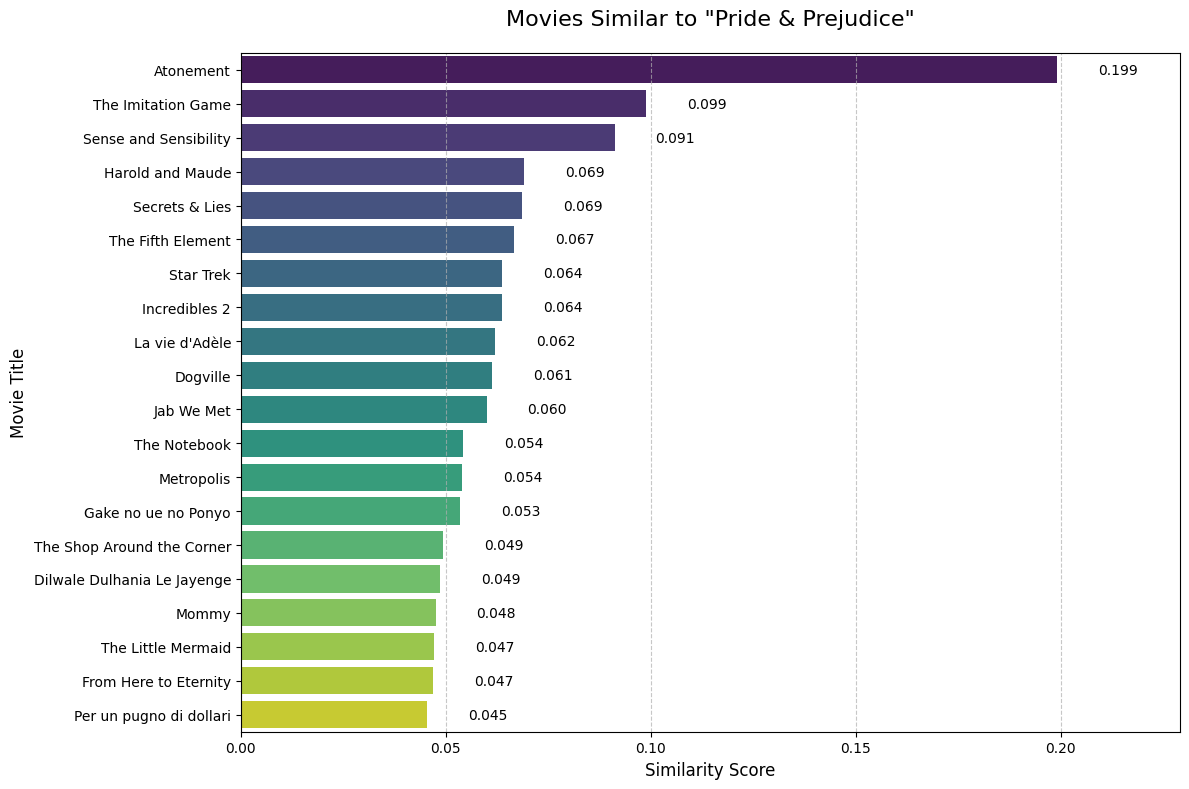

Series_Title  \
620                    Atonement   
338           The Imitation Game   
962        Sense and Sensibility   
541             Harold and Maude   
392               Secrets & Lies   
807            The Fifth Element   
493                    Star Trek   
891                Incredibles 2   
734               La vie d'Adèle   
380                     Dogville   
490                   Jab We Met   
637                 The Notebook   
126                   Metropolis   
756          Gake no ue no Ponyo   
311   The Shop Around the Corner   
258  Dilwale Dulhania Le Jayenge   
200                        Mommy   
976           The Little Mermaid   
997        From Here to Eternity   
431      Per un pugno di dollari   

                                              Overview             Director  \
620  Thirteen-year-old fledgling writer Briony Tall...           Joe Wright   
338  During World War II, the English mathematical ...        Morten Tyldum   
962  Rich Mr. Dashwood dies, leaving his second wif...              Ang Lee   
541  Young, rich, and obsessed with death, Harold f...            Hal Ashby   
392  Following the death of her adoptive parents, a...           Mike Leigh   
807  In the colorful future, a cab driver unwitting...           Luc Besson   
493  The brash James T. Kirk tries to live up to hi...          J.J. Abrams   
891  The Incredibles family takes on a new mission ...            Brad Bird   
734  Adèle's life is changed when she meets Emma, a...  Abdellatif Kechiche   
380  A woman on the run from the mob is reluctantly...       Lars von Trier   
490  A depressed wealthy businessman finds his life...           Imtiaz Ali   
637  A poor yet passionate young man falls in love ...      Nick Cassavetes   
126  In a futuristic city sharply divided between t...           Fritz Lang   
756  A five-year-old boy develops a relationship wi...       Hayao Miyazaki   
311  Two employees at a gift shop can barely stand ...       Ernst Lubitsch   
258  When Raj meets Simran in Europe, it isn't love...        Aditya Chopra   
200  A widowed single mother, raising her violent s...         Xavier Dolan   
976  A mermaid princess makes a Faustian bargain in...         Ron Clements   
997  In Hawaii in 1941, a private is cruelly punish...       Fred Zinnemann   
431  A wandering gunfighter plays two rival familie...         Sergio Leone   

                    Star1                  Star2             Star3  \
620       Keira Knightley           James McAvoy    Brenda Blethyn   
338  Benedict Cumberbatch        Keira Knightley     Matthew Goode   
962         Emma Thompson           Kate Winslet       James Fleet   
541           Ruth Gordon               Bud Cort    Vivian Pickles   
392         Timothy Spall         Brenda Blethyn     Phyllis Logan   
807          Bruce Willis         Milla Jovovich       Gary Oldman   
493            Chris Pine         Zachary Quinto        Simon Pegg   
891       Craig T. Nelson           Holly Hunter      Sarah Vowell   
734           Léa Seydoux    Adèle Exarchopoulos  Salim Kechiouche   
380         Nicole Kidman           Paul Bettany     Lauren Bacall   
490         Shahid Kapoor         Kareena Kapoor       Tarun Arora   
637         Gena Rowlands           James Garner    Rachel McAdams   
126         Brigitte Helm            Alfred Abel   Gustav Fröhlich   
756        Cate Blanchett             Matt Damon       Liam Neeson   
311     Margaret Sullavan          James Stewart      Frank Morgan   
258        Shah Rukh Khan                  Kajol       Amrish Puri   
200           Anne Dorval  Antoine Olivier Pilon   Suzanne Clément   
976           John Musker            Jodi Benson  Samuel E. Wright   
997        Burt Lancaster       Montgomery Clift      Deborah Kerr   
431        Clint Eastwood     Gian Maria Volontè     Marianne Koch   

     Similarity_Score  
620          0.199224  
338          0.098876  
962          0.091170  
541          0.069011  
392         

In [ ]:
run_movie_recommender(df, "Pride & Prejudice", 20)

In [ ]:
#Example usage
input_movie_name = "Pride & Prejudice"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                         Series_Title  Cosine Similarity
0                   Pride & Prejudice           1.000000
1                   God's Own Country           0.980825
2               Sense and Sensibility           0.978986
3                       Before Sunset           0.977031
4                               Dev.D           0.976291
5                        The Notebook           0.975711
6                        Jules et Jim           0.973524
7                Call Me by Your Name           0.970002
8              The Fault in Our Stars           0.967500
9                        Little Women           0.966481
10                              Amour           0.965930
11  Portrait de la jeune fille en feu           0.964867
12                             Hævnen           0.963415
13              Nuovo Cinema Paradiso           0.959873
14              The Last Picture Show           0.959319
15                      Belle de jour           0.958890
16        Dilwale Dulhania Le J

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Pride & Prejudice"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Pride & Prejudice':
Recommended movie: Sense and Sensibility
Similarity score: 0.9790
Source: Both approaches


Bad movies

Top 20 movies similar to 'La La Land':
                    Series_Title  Similarity_Score
                        Whiplash          0.106817
                 Boyz n the Hood          0.097374
                      Short Cuts          0.092387
                           Drive          0.087110
                   The Big Short          0.080834
                    Training Day          0.079162
                           Crash          0.075764
               Blade Runner 2049          0.075336
                        Die Hard          0.074680
               L.A. Confidential          0.072295
Once Upon a Time... in Hollywood          0.070144
                     Höstsonaten          0.070042
     The Broken Circle Breakdown          0.069286
                        The Help          0.064666
                  Mulholland Dr.          0.063652
                  Dil Chahta Hai          0.063042
          Straight Outta Compton          0.062612
                 Minority Report          0

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


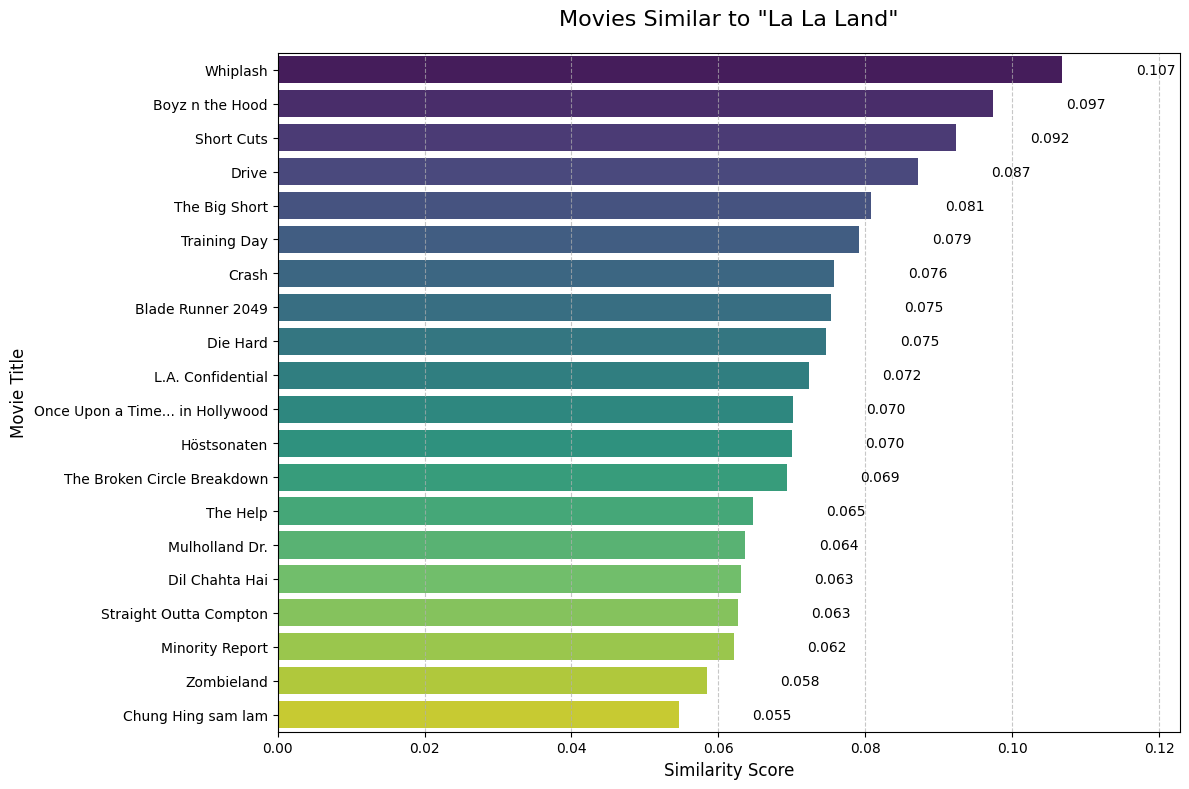

Series_Title  \
34                           Whiplash   
669                   Boyz n the Hood   
817                        Short Cuts   
621                             Drive   
600                     The Big Short   
802                      Training Day   
775                             Crash   
340                 Blade Runner 2049   
171                          Die Hard   
162                 L.A. Confidential   
879  Once Upon a Time... in Hollywood   
175                       Höstsonaten   
736       The Broken Circle Breakdown   
347                          The Help   
515                    Mulholland Dr.   
240                    Dil Chahta Hai   
606            Straight Outta Compton   
951                   Minority Report   
912                        Zombieland   
261                Chung Hing sam lam   

                                              Overview              Director  \
34   A promising young drummer enrolls at a cut-thr...       Damien Chazelle   
669  Follows the lives of three young males living ...        John Singleton   
817  The day-to-day lives of several suburban Los A...         Robert Altman   
621  A mysterious Hollywood stuntman and mechanic m...  Nicolas Winding Refn   
600  In 2006-2007 a group of investors bet against ...            Adam McKay   
802  A rookie cop spends his first day as a Los Ang...         Antoine Fuqua   
775  Los Angeles citizens with vastly separate live...           Paul Haggis   
340  Young Blade Runner K's discovery of a long-bur...      Denis Villeneuve   
171  An NYPD officer tries to save his wife and sev...        John McTiernan   
162  As corruption grows in 1950s Los Angeles, thre...         Curtis Hanson   
879  A faded television actor and his stunt double ...     Quentin Tarantino   
175  A married daughter who longs for her mother's ...        Ingmar Bergman   
736  Elise and Didier fall in love at first sight, ...  Felix van Groeningen   
347  An aspiring author during the civil rights mov...           Tate Taylor   
515  After a car wreck on the winding Mulholland Dr...           David Lynch   
240  Three inseparable childhood friends are just o...         Farhan Akhtar   
606  The rap group NWA emerges from the mean street...          F. Gary Gray   
951  In a future where a special police unit is abl...      Steven Spielberg   
912  A shy student trying to reach his family in Oh...       Ruben Fleischer   
261  Two melancholy Hong Kong policemen fall in lov...          Kar-Wai Wong   

                  Star1               Star2                Star3  \
34         Miles Teller        J.K. Simmons      Melissa Benoist   
669    Cuba Gooding Jr.  Laurence Fishburne      Hudhail Al-Amir   
817     Andie MacDowell      Julianne Moore          Tim Robbins   
621        Ryan Gosling      Carey Mulligan       Bryan Cranston   
600      Christian Bale        Steve Carell         Ryan Gosling   
802   Denzel Washington         Ethan Hawke          Scott Glenn   
775         Don Cheadle      Sandra Bullock       Thandie Newton   
340       Harrison Ford        Ryan Gosling         Ana de Armas   
171        Bruce Willis        Alan Rickman       Bonnie Bedelia   
162        Kevin Spacey       Russell Crowe           Guy Pearce   
879   Leonardo DiCaprio           Brad Pitt        Margot Robbie   
175      Ingrid Bergman         Liv Ullmann           Lena Nyman   
736      Veerle Baetens   Johan Heldenbergh       Nell Cattrysse   
347          Emma Stone         Viola Davis      Octavia Spencer   
515         Naomi Watts       Laura Harring       Justin Theroux   
240          Aamir Khan       Saif Ali Khan       Akshaye Khanna   
606  O'Shea Jackson Jr.       Corey Hawkins       Jason Mitchell   
951          Tom Cruise       Colin Farrell      Samantha Morton   
912     Jesse Eisenberg          Emma Stone      Woody Harrelson   
261        Brigitte Lin   Takeshi Kaneshiro  Tony Chiu-Wai Leung   

     Similarity_Score  
34           0.106817  
669  

In [ ]:

run_movie_recommender(df, "La La Land", 20)

In [ ]:
#Example usage
input_movie_name = "La La Land"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                Series_Title  Cosine Similarity
0                 La La Land           1.000000
1  Hedwig and the Angry Inch           0.979472
2                Sing Street           0.948933


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "La La Land"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'La La Land':
Recommended movie: Hedwig and the Angry Inch
Similarity score: 0.9795
Source: Siamese network


مینا کارگر

Zodiac

Top 20 movies similar to 'Knives Out':
                         Series_Title  Similarity_Score
                    Blade Runner 2049          0.120803
                   The Maltese Falcon          0.102824
Harry Potter and the Sorcerer's Stone          0.095402
                           Home Alone          0.091793
      The Girl with the Dragon Tattoo          0.090068
                 The Royal Tenenbaums          0.087386
                               Gifted          0.087138
           Captain America: Civil War          0.084803
                        Incredibles 2          0.083280
                      The Incredibles          0.082954
                         The Avengers          0.079204
                              Skyfall          0.077339
                        The Godfather          0.075638
                                 Rush          0.072416
  Captain America: The Winter Soldier          0.071754
                       Shutter Island          0.069474
         

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


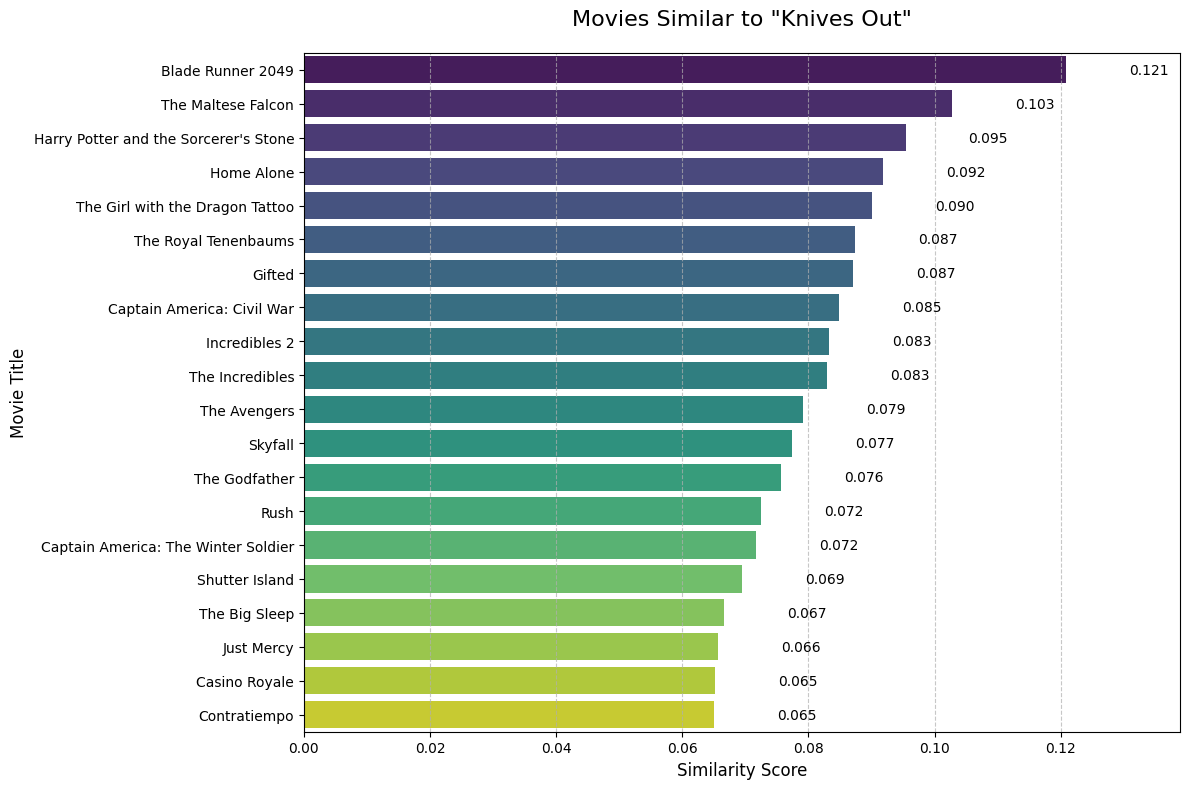

Series_Title  \
340                      Blade Runner 2049   
456                     The Maltese Falcon   
947  Harry Potter and the Sorcerer's Stone   
973                             Home Alone   
603        The Girl with the Dragon Tattoo   
945                   The Royal Tenenbaums   
883                                 Gifted   
583             Captain America: Civil War   
891                          Incredibles 2   
378                        The Incredibles   
357                           The Avengers   
751                                Skyfall   
1                            The Godfather   
216                                   Rush   
737    Captain America: The Winter Soldier   
145                         Shutter Island   
560                          The Big Sleep   
882                             Just Mercy   
368                          Casino Royale   
198                           Contratiempo   

                                              Overview               Director  \
340  Young Blade Runner K's discovery of a long-bur...       Denis Villeneuve   
456  A private detective takes on a case that invol...            John Huston   
947  An orphaned boy enrolls in a school of wizardr...         Chris Columbus   
973  An eight-year-old troublemaker must protect hi...         Chris Columbus   
603  Journalist Mikael Blomkvist is aided in his se...          David Fincher   
945  The eccentric members of a dysfunctional famil...           Wes Anderson   
883  Frank, a single man raising his child prodigy ...              Marc Webb   
583  Political involvement in the Avengers' affairs...          Anthony Russo   
891  The Incredibles family takes on a new mission ...              Brad Bird   
378  A family of undercover superheroes, while tryi...              Brad Bird   
357  Earth's mightiest heroes must come together an...            Joss Whedon   
751  James Bond's loyalty to M is tested when her p...             Sam Mendes   
1    An organized crime dynasty's aging patriarch t...   Francis Ford Coppola   
216  The merciless 1970s rivalry between Formula On...             Ron Howard   
737  As Steve Rogers struggles to embrace his role ...          Anthony Russo   
145  In 1954, a U.S. Marshal investigates the disap...        Martin Scorsese   
560  Private detective Philip Marlowe is hired by a...           Howard Hawks   
882  World-renowned civil rights defense attorney B...  Destin Daniel Cretton   
368  After earning 00 status and a licence to kill,...        Martin Campbell   
198  A successful entrepreneur accused of murder an...            Oriol Paulo   

                 Star1              Star2                Star3  \
340      Harrison Ford       Ryan Gosling         Ana de Armas   
456    Humphrey Bogart         Mary Astor        Gladys George   
947   Daniel Radcliffe       Rupert Grint       Richard Harris   
973    Macaulay Culkin          Joe Pesci         Daniel Stern   
603       Daniel Craig        Rooney Mara  Christopher Plummer   
945       Gene Hackman    Gwyneth Paltrow      Anjelica Huston   
883        Chris Evans      Mckenna Grace       Lindsay Duncan   
583          Joe Russo        Chris Evans    Robert Downey Jr.   
891    Craig T. Nelson       Holly Hunter         Sarah Vowell   
378    Craig T. Nelson  Samuel L. Jackson         Holly Hunter   
357  Robert Downey Jr.        Chris Evans   Scarlett Johansson   
751       Daniel Craig      Javier Bardem        Naomie Harris   
1        Marlon Brando          Al Pacino           James Caan   
216       Daniel Brühl    Chris Hemsworth         Olivia Wilde   
737          Joe Russo        Chris Evans    Samuel L. Jackson   
145  Leonardo DiCaprio     Emily Mortimer         Mark Ruffalo   
560    Humphrey Bogart      Lauren Bacall         John Ridgely   
882  Michael B. Jordan         Jamie Foxx          Brie Larson   
368       Daniel Craig          Eva Green           Judi Dench   
198        Mario Casas        Ana Wagener

In [ ]:

run_movie_recommender(df, "Knives Out", 20)

In [ ]:
#Example usage
input_movie_name = "Knives Out"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                                 Series_Title  Cosine Similarity
0                                  Knives Out           1.000000
1                               Do lok tin si           0.978809
2                             American Psycho           0.970084
3                             Rang De Basanti           0.969109
4                                 Adams æbler           0.966526
5                              Dom za vesanje           0.964113
6                          Chung Hing sam lam           0.952466
7                                 After Hours           0.951118
8                                   In Bruges           0.951011
9                          The King of Comedy           0.946293
10                                 Paper Moon           0.942496
11                                Down by Law           0.939870
12                                  The Sting           0.935085
13                           The Long Goodbye           0.913860
14  Three Billboards Outs

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Knives Out"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Knives Out':
Recommended movie: Do lok tin si
Similarity score: 0.9788
Source: Siamese network


Bad Movie

Top 20 movies similar to 'The Prestige':
              Series_Title  Similarity_Score
             Batman Begins          0.164547
     The Dark Knight Rises          0.134480
           The Dark Knight          0.125264
               Jojo Rabbit          0.101749
                   Dunkirk          0.099659
                       Her          0.095446
       Lost in Translation          0.095268
X-Men: Days of Future Past          0.094034
                 Prisoners          0.093602
         Empire of the Sun          0.090235
               Match Point          0.088092
              3:10 to Yuma          0.087100
                     Logan          0.087020
           Sherlock Holmes          0.086970
              The Avengers          0.086832
            Marriage Story          0.082187
                   Memento          0.079935
              Interstellar          0.079382
             The Machinist          0.078189
            Ford v Ferrari          0.077639


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


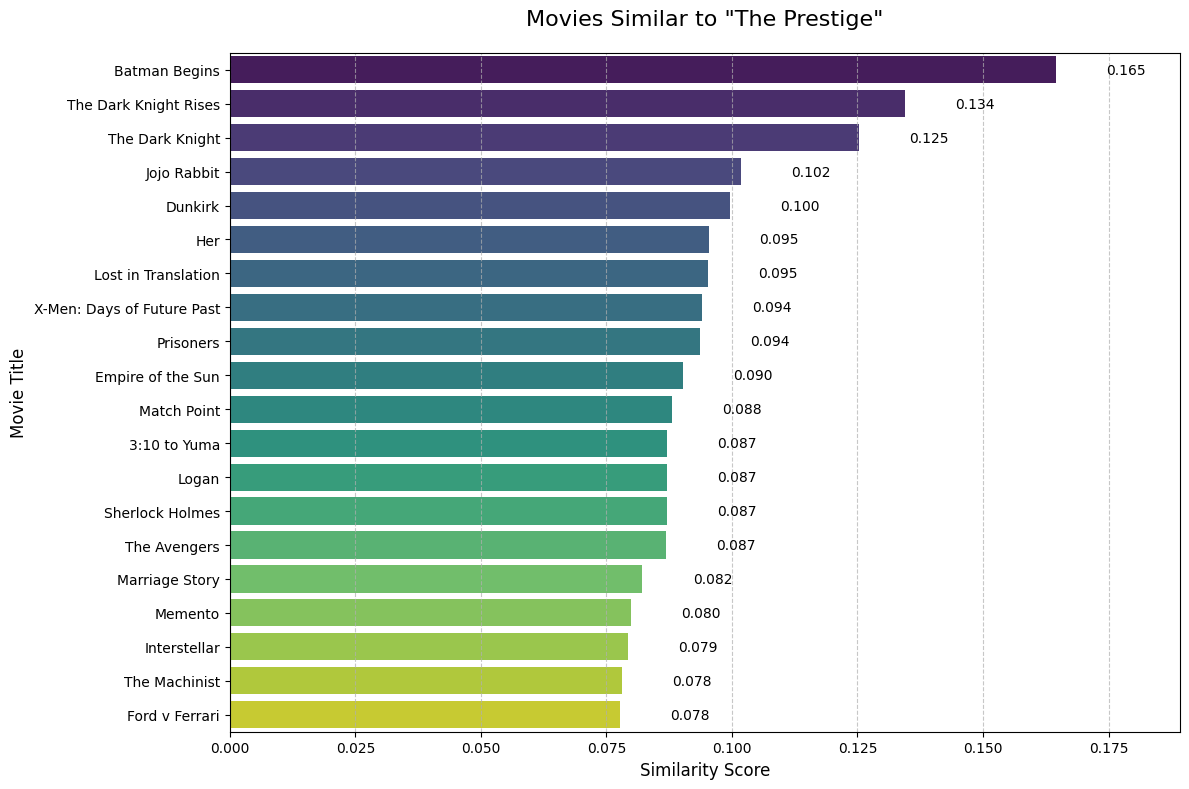

Series_Title  \
155               Batman Begins   
63        The Dark Knight Rises   
2               The Dark Knight   
475                 Jojo Rabbit   
573                     Dunkirk   
341                         Her   
780         Lost in Translation   
479  X-Men: Days of Future Past   
222                   Prisoners   
832           Empire of the Sun   
929                 Match Point   
774                3:10 to Yuma   
202                       Logan   
914             Sherlock Holmes   
357                The Avengers   
466              Marriage Story   
69                      Memento   
21                 Interstellar   
778               The Machinist   
217              Ford v Ferrari   

                                              Overview           Director  \
155  After training with his mentor, Batman begins ...  Christopher Nolan   
63   Eight years after the Joker's reign of anarchy...  Christopher Nolan   
2    When the menace known as the Joker wreaks havo...  Christopher Nolan   
475  A young boy in Hitler's army finds out his mot...      Taika Waititi   
573  Allied soldiers from Belgium, the British Empi...  Christopher Nolan   
341  In a near future, a lonely writer develops an ...        Spike Jonze   
780  A faded movie star and a neglected young woman...      Sofia Coppola   
479  The X-Men send Wolverine to the past in a desp...       Bryan Singer   
222  When Keller Dover's daughter and her friend go...   Denis Villeneuve   
832  A young English boy struggles to survive under...   Steven Spielberg   
929  At a turning point in his life, a former tenni...        Woody Allen   
774  A small-time rancher agrees to hold a captured...      James Mangold   
202  In a future where mutants are nearly extinct, ...      James Mangold   
914  Detective Sherlock Holmes and his stalwart par...        Guy Ritchie   
357  Earth's mightiest heroes must come together an...        Joss Whedon   
466  Noah Baumbach's incisive and compassionate loo...      Noah Baumbach   
69   A man with short-term memory loss attempts to ...  Christopher Nolan   
21   A team of explorers travel through a wormhole ...  Christopher Nolan   
778  An industrial worker who hasn't slept in a yea...      Brad Anderson   
217  American car designer Carroll Shelby and drive...      James Mangold   

                   Star1                 Star2                 Star3  \
155       Christian Bale         Michael Caine          Ken Watanabe   
63        Christian Bale             Tom Hardy         Anne Hathaway   
2         Christian Bale          Heath Ledger         Aaron Eckhart   
475  Roman Griffin Davis     Thomasin McKenzie    Scarlett Johansson   
573      Fionn Whitehead         Barry Keoghan          Mark Rylance   
341      Joaquin Phoenix             Amy Adams    Scarlett Johansson   
780          Bill Murray    Scarlett Johansson       Giovanni Ribisi   
479      Patrick Stewart          Ian McKellen          Hugh Jackman   
222         Hugh Jackman       Jake Gyllenhaal           Viola Davis   
832       Christian Bale        John Malkovich    Miranda Richardson   
929   Scarlett Johansson  Jonathan Rhys Meyers        Emily Mortimer   
774        Russell Crowe        Christian Bale            Ben Foster   
202         Hugh Jackman       Patrick Stewart            Dafne Keen   
914    Robert Downey Jr.              Jude Law        Rachel McAdams   
357    Robert Downey Jr.           Chris Evans    Scarlett Johansson   
466          Adam Driver    Scarlett Johansson           Julia Greer   
69            Guy Pearce      Carrie-Anne Moss        Joe Pantoliano   
21   Matthew McConaughey         Anne Hathaway      Jessica Chastain   
778       Christian Bale  Jennifer Jason Leigh  Aitana Sánchez-Gijón   
217           Matt Damon        Christian Bale          Jon Bernthal   

     Similarity_Score  
155          0.164547  
63           0.134480  
2            0.125264  
475          0.101749  
573          0.099659  
341     

In [ ]:


run_movie_recommender(df, "The Prestige", 20)

In [ ]:
#Example usage
input_movie_name = "The Prestige"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

    Series_Title  Cosine Similarity
0   The Prestige           1.000000
1   Donnie Darko           0.983568
2           Moon           0.940116
3        Solaris           0.923542
4  Abre los ojos           0.856047


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "The Prestige"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'The Prestige':
Recommended movie: Donnie Darko
Similarity score: 0.9836
Source: Siamese network


پروین نعمت الهی

Master and Commander: The Far Side of the World

Top 20 movies similar to 'Forrest Gump':
                                   Series_Title  Similarity_Score
                                      Cast Away          0.114846
                             The Princess Bride          0.106917
                                          Dev.D          0.094653
                               Captain Phillips          0.080878
                                            JFK          0.076703
                            Saving Private Ryan          0.071728
                                        The Kid          0.066564
                                      Andhadhun          0.066402
                                The Longest Day          0.065412
                                        Platoon          0.064738
                                 The Green Mile          0.063656
                      The Last King of Scotland          0.062828
Das weiße Band - Eine deutsche Kindergeschichte          0.062785
                        Who Framed 

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


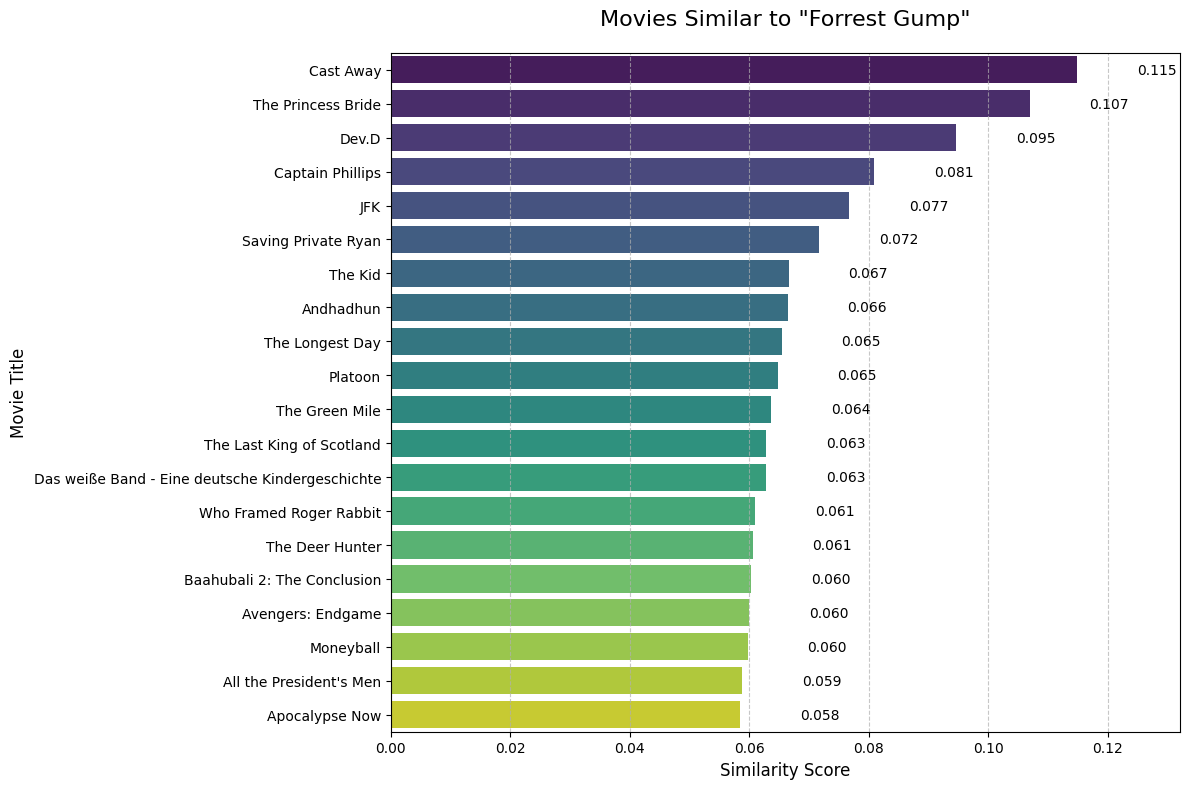

Series_Title  \
647                                        Cast Away   
406                               The Princess Bride   
350                                            Dev.D   
604                                 Captain Phillips   
400                                              JFK   
24                               Saving Private Ryan   
127                                          The Kid   
86                                         Andhadhun   
705                                  The Longest Day   
268                                          Platoon   
25                                    The Green Mile   
766                        The Last King of Scotland   
610  Das weiße Band - Eine deutsche Kindergeschichte   
828                          Who Framed Roger Rabbit   
278                                  The Deer Hunter   
134                      Baahubali 2: The Conclusion   
59                                 Avengers: Endgame   
910                                        Moneyball   
536                          All the President's Men   
74                                    Apocalypse Now   

                                              Overview              Director  \
647  A FedEx executive undergoes a physical and emo...       Robert Zemeckis   
406  While home sick in bed, a young boy's grandfat...            Rob Reiner   
350  After breaking up with his childhood sweethear...        Anurag Kashyap   
604  The true story of Captain Richard Phillips and...       Paul Greengrass   
400  New Orleans District Attorney Jim Garrison dis...          Oliver Stone   
24   Following the Normandy Landings, a group of U....      Steven Spielberg   
127  The Tramp cares for an abandoned child, but ev...       Charles Chaplin   
86   A series of mysterious events change the life ...       Sriram Raghavan   
705  The events of D-Day, told on a grand scale fro...           Ken Annakin   
268  Chris Taylor, a neophyte recruit in Vietnam, f...          Oliver Stone   
25   The lives of guards on Death Row are affected ...        Frank Darabont   
766  Based on the events of the brutal Ugandan dict...       Kevin Macdonald   
610  Strange events happen in a small village in th...        Michael Haneke   
828  A toon-hating detective is a cartoon rabbit's ...       Robert Zemeckis   
278  An in-depth examination of the ways in which t...        Michael Cimino   
134  When Shiva, the son of Bahubali, learns about ...        S.S. Rajamouli   
59   After the devastating events of Avengers: Infi...         Anthony Russo   
910  Oakland A's general manager Billy Beane's succ...        Bennett Miller   
536  "The Washington Post" reporters Bob Woodward a...        Alan J. Pakula   
74   A U.S. Army officer serving in Vietnam is task...  Francis Ford Coppola   

                  Star1                  Star2               Star3  \
647           Tom Hanks             Helen Hunt        Paul Sanchez   
406          Cary Elwes         Mandy Patinkin        Robin Wright   
350          Abhay Deol             Mahie Gill      Kalki Koechlin   
604           Tom Hanks           Barkhad Abdi  Barkhad Abdirahman   
400       Kevin Costner            Gary Oldman         Jack Lemmon   
24            Tom Hanks             Matt Damon        Tom Sizemore   
127     Charles Chaplin         Edna Purviance       Jackie Coogan   
86   Ayushmann Khurrana                   Tabu        Radhika Apte   
705       Andrew Marton            Gerd Oswald      Bernhard Wicki   
268       Charlie Sheen           Tom Berenger        Willem Dafoe   
25            Tom Hanks  Michael Clarke Duncan         David Morse   
766        James McAvoy        Forest Whitaker    Gillian Anderson   
610   Christian Friedel           Ernst Jacobi      Leonie Benesch   
828         Bob Hoskins      Christopher Lloyd      Joanna Cassidy   
278      Robert De Niro     Christopher Walken         John Cazale   
134             Prabhas         Rana Daggubati      Anushka Sh

In [ ]:

run_movie_recommender(df, "Forrest Gump", 20)

In [ ]:
#Example usage
input_movie_name = "Forrest Gump"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                         Series_Title  Cosine Similarity
0                        Forrest Gump           1.000000
1                        The Lunchbox           0.969506
2                   Good Will Hunting           0.957864
3       The Bridges of Madison County           0.942886
4               The Last Picture Show           0.942099
5               Nuovo Cinema Paradiso           0.938769
6   Portrait de la jeune fille en feu           0.933543
7                       Before Sunset           0.933335
8              The Remains of the Day           0.931480
9                  Brokeback Mountain           0.927060
10                  Pride & Prejudice           0.924748
11                       The Notebook           0.924216
12                            Titanic           0.922104
13                     La vie d'Adèle           0.921207
14                Slumdog Millionaire           0.914732
15                     Gegen die Wand           0.911450
16             The Fault in Our

Bad Movies

Top 20 movies similar to 'The Princess Bride':
                                          Series_Title  Similarity_Score
Pirates of the Caribbean: The Curse of the Black Pearl          0.133719
                                    This Is Spinal Tap          0.126477
                                          Forrest Gump          0.106917
                                           Stand by Me          0.098307
                                                 Glory          0.081871
                               When Harry Met Sally...          0.079443
                                                   Saw          0.076683
                                               Flipped          0.076211
                                        A Few Good Men          0.073677
                                                Misery          0.066046
                                 Rebel Without a Cause          0.064764
                                   Hachi: A Dog's Tale          0.064201
    

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


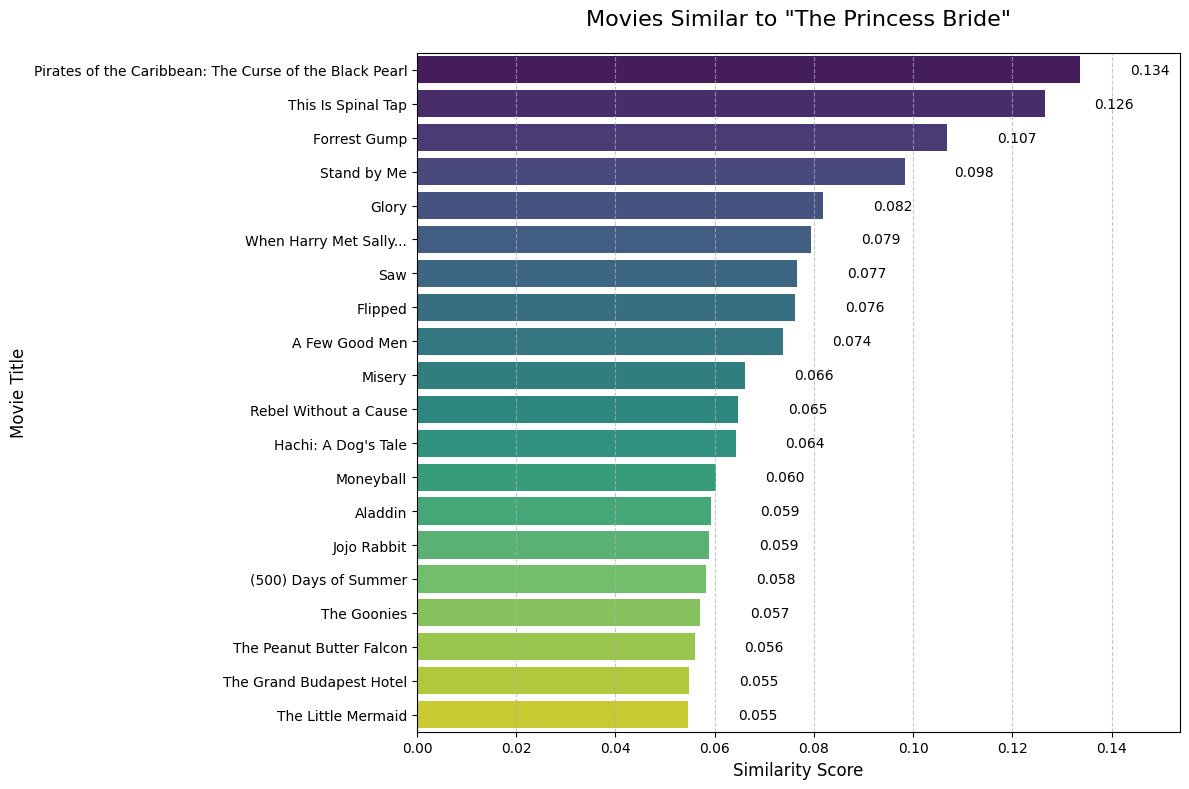

Series_Title  \
376  Pirates of the Caribbean: The Curse of the Bla...   
530                                 This Is Spinal Tap   
11                                        Forrest Gump   
267                                        Stand by Me   
673                                              Glory   
975                            When Harry Met Sally...   
932                                                Saw   
760                                            Flipped   
824                                     A Few Good Men   
670                                             Misery   
868                              Rebel Without a Cause   
228                                Hachi: A Dog's Tale   
910                                          Moneyball   
399                                            Aladdin   
475                                        Jojo Rabbit   
754                               (500) Days of Summer   
681                                        The Goonies   
884                           The Peanut Butter Falcon   
209                           The Grand Budapest Hotel   
976                                 The Little Mermaid   

                                              Overview         Director  \
376  Blacksmith Will Turner teams up with eccentric...   Gore Verbinski   
530  Spinal Tap, one of England's loudest bands, is...       Rob Reiner   
11   The presidencies of Kennedy and Johnson, the e...  Robert Zemeckis   
267  After the death of one of his friends, a write...       Rob Reiner   
673  Robert Gould Shaw leads the U.S. Civil War's f...     Edward Zwick   
975  Harry and Sally have known each other for year...       Rob Reiner   
932  Two strangers awaken in a room with no recolle...        James Wan   
760  Two eighth-graders start to have feelings for ...       Rob Reiner   
824  Military lawyer Lieutenant Daniel Kaffee defen...       Rob Reiner   
670  After a famous author is rescued from a car cr...       Rob Reiner   
868  A rebellious young man with a troubled past co...     Nicholas Ray   
228  A college professor bonds with an abandoned do...  Lasse Hallström   
910  Oakland A's general manager Billy Beane's succ...   Bennett Miller   
399  A kindhearted street urchin and a power-hungry...     Ron Clements   
475  A young boy in Hitler's army finds out his mot...    Taika Waititi   
754  An offbeat romantic comedy about a woman who d...        Marc Webb   
681  A group of young misfits called The Goonies di...   Richard Donner   
884  Zak runs away from his care home to make his d...     Tyler Nilson   
209  A writer encounters the owner of an aging high...     Wes Anderson   
976  A mermaid princess makes a Faustian bargain in...     Ron Clements   

                   Star1                 Star2                 Star3  \
376          Johnny Depp         Geoffrey Rush         Orlando Bloom   
530           Rob Reiner        Michael McKean     Christopher Guest   
11             Tom Hanks          Robin Wright           Gary Sinise   
267          Wil Wheaton         River Phoenix         Corey Feldman   
673    Matthew Broderick     Denzel Washington            Cary Elwes   
975        Billy Crystal              Meg Ryan         Carrie Fisher   
932           Cary Elwes        Leigh Whannell          Danny Glover   
760     Madeline Carroll      Callan McAuliffe     Rebecca De Mornay   
824           Tom Cruise        Jack Nicholson            Demi Moore   
670           James Caan           Kathy Bates    Richard Farnsworth   
868           James Dean          Natalie Wood             Sal Mineo   
228         Richard Gere            Joan Allen  Cary-Hiroyuki Tagawa   
910            Brad Pitt          Robin Wright            Jonah Hill   
399          John Musker         Scott Weinger        Robin Williams   
475  Roman Griffin Davis     Thomasin McKenzie    Scarlett Johansson   
754      Zooey Deschanel  Joseph Gordon-Levitt        Geoffrey Arend   
681           Sean Asti

In [ ]:

run_movie_recommender(df, "The Princess Bride", 20)

In [ ]:
#Example usage
input_movie_name = "The Princess Bride"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                                   Series_Title  Cosine Similarity
0                            The Princess Bride           1.000000
1                                      Stardust           0.994905
2           Harry Potter and the Goblet of Fire           0.972730
3         Harry Potter and the Sorcerer's Stone           0.959134
4                              The Wizard of Oz           0.957822
5  Harry Potter and the Deathly Hallows: Part 1           0.940517
6      Harry Potter and the Prisoner of Azkaban           0.867540


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "The Princess Bride"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'The Princess Bride':
Recommended movie: Stardust
Similarity score: 0.9949
Source: Siamese network


محبوبه بینا

Safety Not Guaranteed

Top 20 movies similar to 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb':
          Series_Title  Similarity_Score
           The Killing          0.189124
                Patton          0.165456
        Paths of Glory          0.120333
      The Long Goodbye          0.108788
             Spartacus          0.086752
 Judgment at Nuremberg          0.086683
             Gladiator          0.084585
     Full Metal Jacket          0.083620
           Being There          0.081760
    A Clockwork Orange          0.077246
       The Ladykillers          0.076794
    American History X          0.073641
          Barry Lyndon          0.071786
           The Shining          0.070770
 2001: A Space Odyssey          0.069018
     Where Eagles Dare          0.062768
                  1917          0.061985
       Special Chabbis          0.061411
           Kumonosu-jô          0.060769
Miracle on 34th Street          0.060394


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


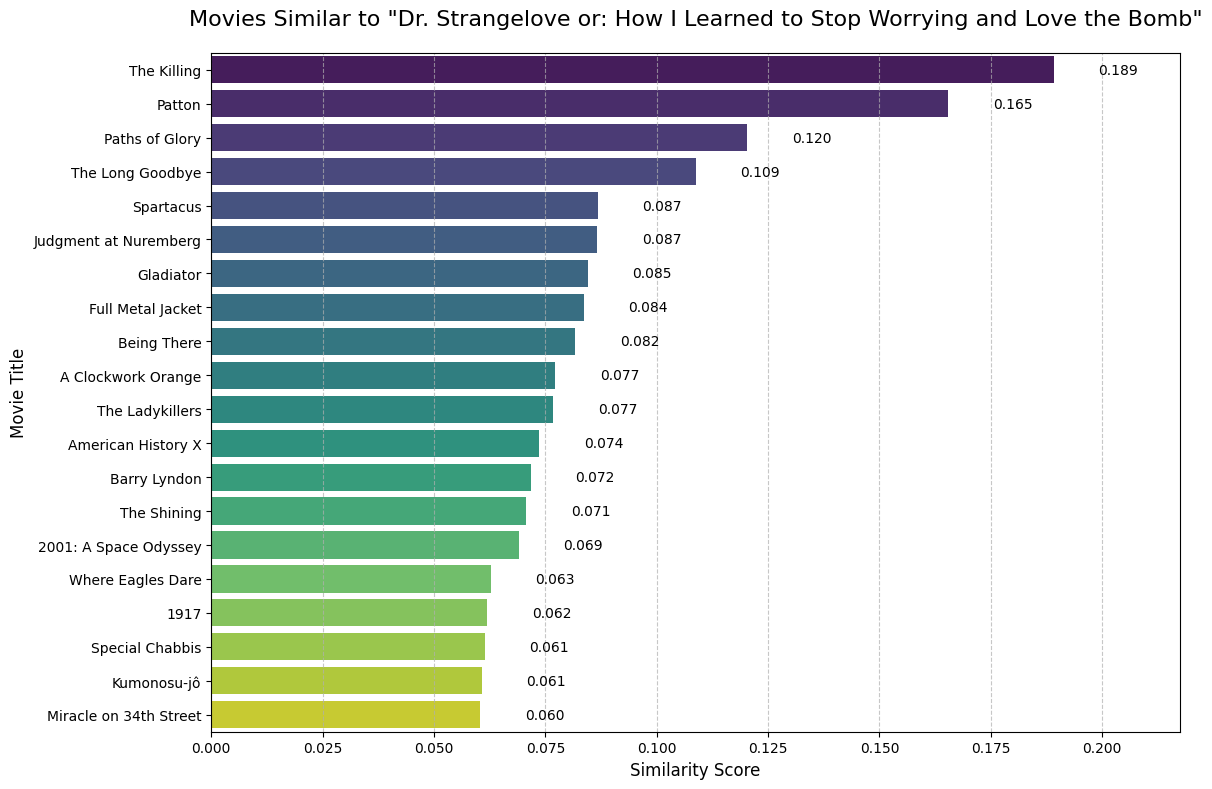

Series_Title  \
441             The Killing   
542                  Patton   
80           Paths of Glory   
989        The Long Goodbye   
549               Spartacus   
182   Judgment at Nuremberg   
39                Gladiator   
104       Full Metal Jacket   
413             Being There   
113      A Clockwork Orange   
869         The Ladykillers   
40       American History X   
281            Barry Lyndon   
73              The Shining   
114   2001: A Space Odyssey   
854       Where Eagles Dare   
84                     1917   
335         Special Chabbis   
303             Kumonosu-jô   
558  Miracle on 34th Street   

                                              Overview               Director  \
441  Crook Johnny Clay assembles a five man team to...        Stanley Kubrick   
542  The World War II phase of the career of contro...  Franklin J. Schaffner   
80   After refusing to attack an enemy position, a ...        Stanley Kubrick   
989  Private investigator Philip Marlowe helps a fr...          Robert Altman   
549  The slave Spartacus leads a violent revolt aga...        Stanley Kubrick   
182  In 1948, an American court in occupied Germany...         Stanley Kramer   
39   A former Roman General sets out to exact venge...           Ridley Scott   
104  A pragmatic U.S. Marine observes the dehumaniz...        Stanley Kubrick   
413  A simpleminded, sheltered gardener becomes an ...              Hal Ashby   
113  In the future, a sadistic gang leader is impri...        Stanley Kubrick   
869  Five oddball criminals planning a bank robbery...  Alexander Mackendrick   
40   A former neo-nazi skinhead tries to prevent hi...              Tony Kaye   
281  An Irish rogue wins the heart of a rich widow ...        Stanley Kubrick   
73   A family heads to an isolated hotel for the wi...        Stanley Kubrick   
114  After discovering a mysterious artifact buried...        Stanley Kubrick   
854  Allied agents stage a daring raid on a castle ...        Brian G. Hutton   
84   April 6th, 1917. As a regiment assembles to wa...             Sam Mendes   
335  A gang of con-men rob prominent rich businessm...          Neeraj Pandey   
303  A war-hardened general, egged on by his ambiti...         Akira Kurosawa   
558  When a nice old man who claims to be Santa Cla...          George Seaton   

                    Star1              Star2              Star3  \
441       Sterling Hayden        Coleen Gray      Vince Edwards   
542       George C. Scott        Karl Malden      Stephen Young   
80           Kirk Douglas       Ralph Meeker     Adolphe Menjou   
989         Elliott Gould  Nina van Pallandt    Sterling Hayden   
549          Kirk Douglas   Laurence Olivier       Jean Simmons   
182         Spencer Tracy     Burt Lancaster    Richard Widmark   
39          Russell Crowe    Joaquin Phoenix     Connie Nielsen   
104        Matthew Modine       R. Lee Ermey  Vincent D'Onofrio   
413         Peter Sellers   Shirley MacLaine     Melvyn Douglas   
113      Malcolm McDowell      Patrick Magee      Michael Bates   
869         Alec Guinness      Peter Sellers       Cecil Parker   
40          Edward Norton     Edward Furlong   Beverly D'Angelo   
281           Ryan O'Neal    Marisa Berenson      Patrick Magee   
73         Jack Nicholson     Shelley Duvall        Danny Lloyd   
114           Keir Dullea      Gary Lockwood  William Sylvester   
854        Richard Burton     Clint Eastwood           Mary Ure   
84   Dean-Charles Chapman      George MacKay        Daniel Mays   
335          Akshay Kumar        Anupam Kher     Manoj Bajpayee   
303        Toshirô Mifune      Minoru Chiaki       Isuzu Yamada   
558          Edmund Gwenn     Maureen O'Hara         John Payne   

     Similarity_Score  
441          0.189124  
542          0.165456  
80           0.120333  
989          0.108788  
549          0.086752  
182          0.086683  
39           0.084585  
104          0.083620  
413          0.081760  
113          

In [ ]:


run_movie_recommender(df, "Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb", 20)

In [ ]:
#Example usage
input_movie_name = "Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                                         Series_Title  Cosine Similarity
0   Dr. Strangelove or: How I Learned to Stop Worr...           1.000000
1                                  Young Frankenstein           0.952313
2                 Le charme discret de la bourgeoisie           0.914412
3                                        The Hangover           0.912011
4                                       Life of Brian           0.897974
5                            Ferris Bueller's Day Off           0.895497
6                                               Zelig           0.892122
7                                        Office Space           0.888583
8                                              Clerks           0.879800
9                                           Airplane!           0.878116
10                                 Dazed and Confused           0.866829
11                                     The Odd Couple           0.840616
12                                   Le dîner de co

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb':
Recommended movie: Young Frankenstein
Similarity score: 0.9523
Source: Siamese network


Bad Movies

Top 20 movies similar to 'Young Frankenstein':
                       Series_Title  Similarity_Score
                    Blazing Saddles          0.145689
                         Paper Moon          0.108755
                        Stand by Me          0.102254
Willy Wonka & the Chocolate Factory          0.100206
                  The Invisible Man          0.092972
                      Hacksaw Ridge          0.089769
  Scarface: The Shame of the Nation          0.080543
             Swades: We, the People          0.078627
                 Back to the Future          0.076755
            Bir Zamanlar Anadolu'da          0.075722
                         Stagecoach          0.072128
                         Braveheart          0.070453
                               Coco          0.069156
                        Waking Life          0.067835
                      The Hurricane          0.067165
                Singin' in the Rain          0.065958
                         Green Book

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


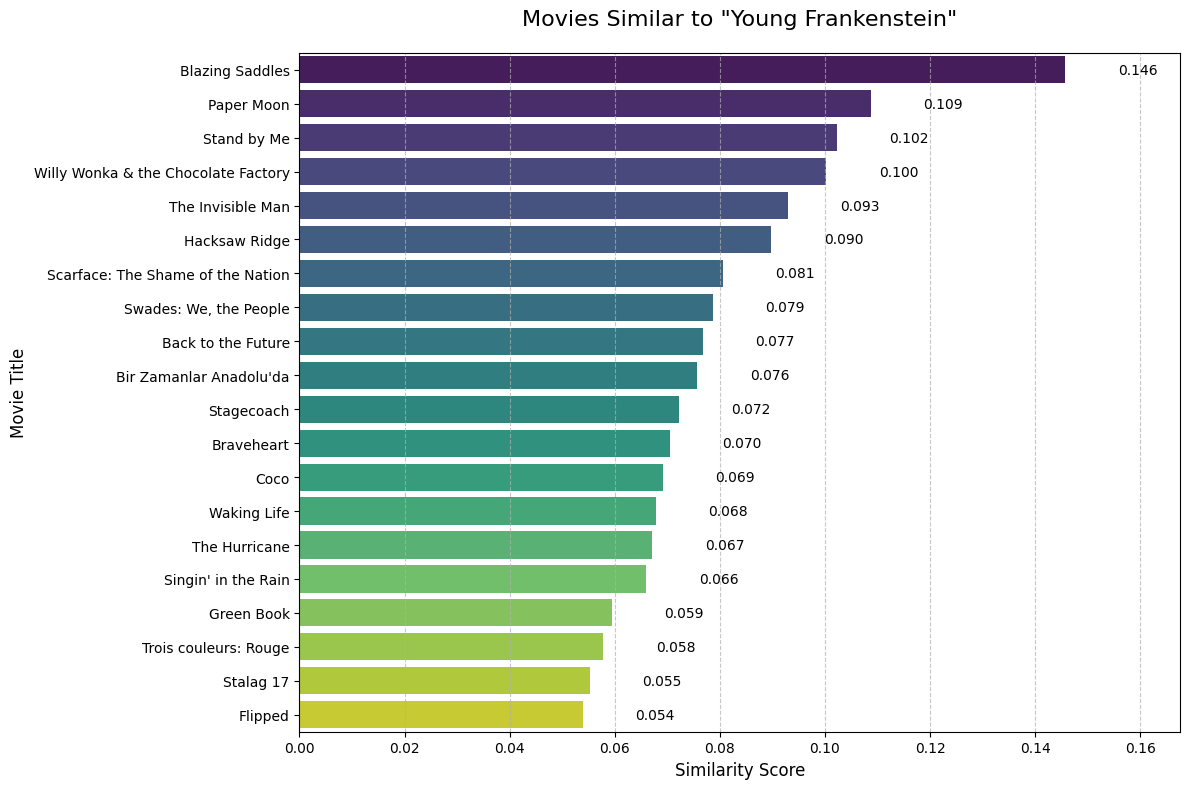

Series_Title  \
848                      Blazing Saddles   
284                           Paper Moon   
267                          Stand by Me   
698  Willy Wonka & the Chocolate Factory   
876                    The Invisible Man   
212                        Hacksaw Ridge   
718    Scarface: The Shame of the Nation   
156               Swades: We, the People   
47                    Back to the Future   
480              Bir Zamanlar Anadolu'da   
713                           Stagecoach   
102                           Braveheart   
61                                  Coco   
643                          Waking Life   
952                        The Hurricane   
120                  Singin' in the Rain   
131                           Green Book   
260                Trois couleurs: Rouge   
445                            Stalag 17   
760                              Flipped   

                                              Overview              Director  \
848  In order to ruin a western town, a corrupt pol...            Mel Brooks   
284  During the Great Depression, a con man finds h...     Peter Bogdanovich   
267  After the death of one of his friends, a write...            Rob Reiner   
698  A poor but hopeful boy seeks one of the five c...            Mel Stuart   
876  A scientist finds a way of becoming invisible,...           James Whale   
212  World War II American Army Medic Desmond T. Do...            Mel Gibson   
718  An ambitious and nearly insane violent gangste...          Howard Hawks   
156  A successful Indian scientist returns to an In...    Ashutosh Gowariker   
47   Marty McFly, a 17-year-old high school student...       Robert Zemeckis   
480  A group of men set out in search of a dead bod...     Nuri Bilge Ceylan   
713  A group of people traveling on a stagecoach fi...             John Ford   
102  Scottish warrior William Wallace leads his cou...            Mel Gibson   
61   Aspiring musician Miguel, confronted with his ...           Lee Unkrich   
643  A man shuffles through a dream meeting various...     Richard Linklater   
952  The story of Rubin 'Hurricane' Carter, a boxer...        Norman Jewison   
120  A silent film production company and cast make...         Stanley Donen   
131  A working-class Italian-American bouncer becom...        Peter Farrelly   
260  A model discovers a retired judge is keen on i...  Krzysztof Kieslowski   
445  When two escaping American World War II prison...          Billy Wilder   
760  Two eighth-graders start to have feelings for ...            Rob Reiner   

                 Star1                   Star2               Star3  \
848     Cleavon Little             Gene Wilder        Slim Pickens   
284        Ryan O'Neal            Tatum O'Neal       Madeline Kahn   
267        Wil Wheaton           River Phoenix       Corey Feldman   
698        Gene Wilder          Jack Albertson        Peter Ostrum   
876       Claude Rains           Gloria Stuart    William Harrigan   
212    Andrew Garfield         Sam Worthington         Luke Bracey   
718     Richard Rosson               Paul Muni          Ann Dvorak   
156     Shah Rukh Khan           Gayatri Joshi      Kishori Ballal   
47      Michael J. Fox       Christopher Lloyd        Lea Thompson   
480    Muhammet Uzuner          Yilmaz Erdogan        Taner Birsel   
713         John Wayne           Claire Trevor         Andy Devine   
102         Mel Gibson          Sophie Marceau    Patrick McGoohan   
61       Adrian Molina        Anthony Gonzalez  Gael García Bernal   
643        Ethan Hawke      Trevor Jack Brooks   Lorelei Linklater   
952  Denzel Washington       Vicellous Shannon  Deborah Kara Unger   
120         Gene Kelly              Gene Kelly     Donald O'Connor   
131    Viggo Mortensen          Mahershala Ali    Linda Cardellini   
260        Irène Jacob  Jean-Louis Trintignant    Frédérique Feder   
445     William Holden              Don Taylor      Otto Preminger   
760   Madeline Carroll

In [ ]:


run_movie_recommender(df, "Young Frankenstein", 20)

In [ ]:
#Example usage
input_movie_name = "Young Frankenstein"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                                         Series_Title  Cosine Similarity
0                                  Young Frankenstein           1.000000
1                 Le charme discret de la bourgeoisie           0.962920
2                                              Clerks           0.958389
3   Dr. Strangelove or: How I Learned to Stop Worr...           0.952313
4                                        The Hangover           0.951544
5                                        Office Space           0.948270
6                            Ferris Bueller's Day Off           0.945558
7                                       Life of Brian           0.943868
8                                               Zelig           0.941036
9                                  Dazed and Confused           0.937002
10                                          Airplane!           0.934809
11                                     The Odd Couple           0.905461
12                                   Le dîner de co

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie
    or the top Siamese recommendation if there's no match.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Young Frankenstein"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Young Frankenstein':
Recommended movie: Le charme discret de la bourgeoisie
Similarity score: 0.9629
Source: Siamese network


فاطمه کاظمی

Good Movie

In the Loop

Top 20 movies similar to 'Young Frankenstein':
                       Series_Title  Similarity_Score
                    Blazing Saddles          0.145689
                         Paper Moon          0.108755
                        Stand by Me          0.102254
Willy Wonka & the Chocolate Factory          0.100206
                  The Invisible Man          0.092972
                      Hacksaw Ridge          0.089769
  Scarface: The Shame of the Nation          0.080543
             Swades: We, the People          0.078627
                 Back to the Future          0.076755
            Bir Zamanlar Anadolu'da          0.075722
                         Stagecoach          0.072128
                         Braveheart          0.070453
                               Coco          0.069156
                        Waking Life          0.067835
                      The Hurricane          0.067165
                Singin' in the Rain          0.065958
                         Green Book

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


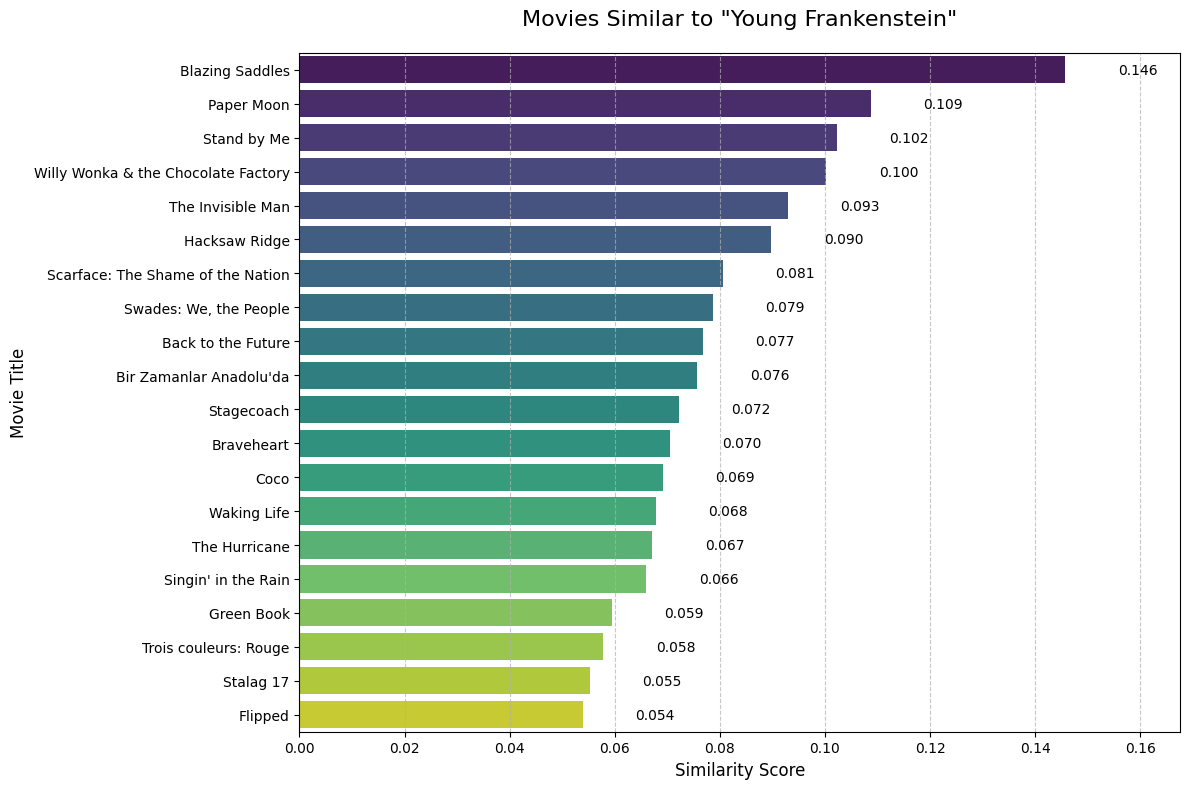

Series_Title  \
848                      Blazing Saddles   
284                           Paper Moon   
267                          Stand by Me   
698  Willy Wonka & the Chocolate Factory   
876                    The Invisible Man   
212                        Hacksaw Ridge   
718    Scarface: The Shame of the Nation   
156               Swades: We, the People   
47                    Back to the Future   
480              Bir Zamanlar Anadolu'da   
713                           Stagecoach   
102                           Braveheart   
61                                  Coco   
643                          Waking Life   
952                        The Hurricane   
120                  Singin' in the Rain   
131                           Green Book   
260                Trois couleurs: Rouge   
445                            Stalag 17   
760                              Flipped   

                                              Overview              Director  \
848  In order to ruin a western town, a corrupt pol...            Mel Brooks   
284  During the Great Depression, a con man finds h...     Peter Bogdanovich   
267  After the death of one of his friends, a write...            Rob Reiner   
698  A poor but hopeful boy seeks one of the five c...            Mel Stuart   
876  A scientist finds a way of becoming invisible,...           James Whale   
212  World War II American Army Medic Desmond T. Do...            Mel Gibson   
718  An ambitious and nearly insane violent gangste...          Howard Hawks   
156  A successful Indian scientist returns to an In...    Ashutosh Gowariker   
47   Marty McFly, a 17-year-old high school student...       Robert Zemeckis   
480  A group of men set out in search of a dead bod...     Nuri Bilge Ceylan   
713  A group of people traveling on a stagecoach fi...             John Ford   
102  Scottish warrior William Wallace leads his cou...            Mel Gibson   
61   Aspiring musician Miguel, confronted with his ...           Lee Unkrich   
643  A man shuffles through a dream meeting various...     Richard Linklater   
952  The story of Rubin 'Hurricane' Carter, a boxer...        Norman Jewison   
120  A silent film production company and cast make...         Stanley Donen   
131  A working-class Italian-American bouncer becom...        Peter Farrelly   
260  A model discovers a retired judge is keen on i...  Krzysztof Kieslowski   
445  When two escaping American World War II prison...          Billy Wilder   
760  Two eighth-graders start to have feelings for ...            Rob Reiner   

                 Star1                   Star2               Star3  \
848     Cleavon Little             Gene Wilder        Slim Pickens   
284        Ryan O'Neal            Tatum O'Neal       Madeline Kahn   
267        Wil Wheaton           River Phoenix       Corey Feldman   
698        Gene Wilder          Jack Albertson        Peter Ostrum   
876       Claude Rains           Gloria Stuart    William Harrigan   
212    Andrew Garfield         Sam Worthington         Luke Bracey   
718     Richard Rosson               Paul Muni          Ann Dvorak   
156     Shah Rukh Khan           Gayatri Joshi      Kishori Ballal   
47      Michael J. Fox       Christopher Lloyd        Lea Thompson   
480    Muhammet Uzuner          Yilmaz Erdogan        Taner Birsel   
713         John Wayne           Claire Trevor         Andy Devine   
102         Mel Gibson          Sophie Marceau    Patrick McGoohan   
61       Adrian Molina        Anthony Gonzalez  Gael García Bernal   
643        Ethan Hawke      Trevor Jack Brooks   Lorelei Linklater   
952  Denzel Washington       Vicellous Shannon  Deborah Kara Unger   
120         Gene Kelly              Gene Kelly     Donald O'Connor   
131    Viggo Mortensen          Mahershala Ali    Linda Cardellini   
260        Irène Jacob  Jean-Louis Trintignant    Frédérique Feder   
445     William Holden              Don Taylor      Otto Preminger   
760   Madeline Carroll

In [ ]:


run_movie_recommender(df, "Young Frankenstein", 20)

In [ ]:
#Example usage
input_movie_name = "Young Frankenstein"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                                         Series_Title  Cosine Similarity
0                                  Young Frankenstein           1.000000
1                 Le charme discret de la bourgeoisie           0.962920
2                                              Clerks           0.958389
3   Dr. Strangelove or: How I Learned to Stop Worr...           0.952313
4                                        The Hangover           0.951544
5                                        Office Space           0.948270
6                            Ferris Bueller's Day Off           0.945558
7                                       Life of Brian           0.943868
8                                               Zelig           0.941036
9                                  Dazed and Confused           0.937002
10                                          Airplane!           0.934809
11                                     The Odd Couple           0.905461
12                                   Le dîner de co

Top 20 movies similar to 'This Is Spinal Tap':
              Series_Title  Similarity_Score
   When Harry Met Sally...          0.161721
               Stand by Me          0.158401
                   Flipped          0.155143
            A Few Good Men          0.149984
                    Misery          0.134449
        The Princess Bride          0.126477
Back to the Future Part II          0.085803
        Back to the Future          0.075853
            Ocean's Eleven          0.071861
         Road to Perdition          0.069288
             The Lion King          0.067674
           Special Chabbis          0.065943
Die Hard: With a Vengeance          0.061917
              Seven Pounds          0.057527
              Withnail & I          0.053748
               Peeping Tom          0.049770
                        8½          0.049260
             Batman Begins          0.047886
          Moonrise Kingdom          0.046302
           The Deer Hunter          0.044369


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


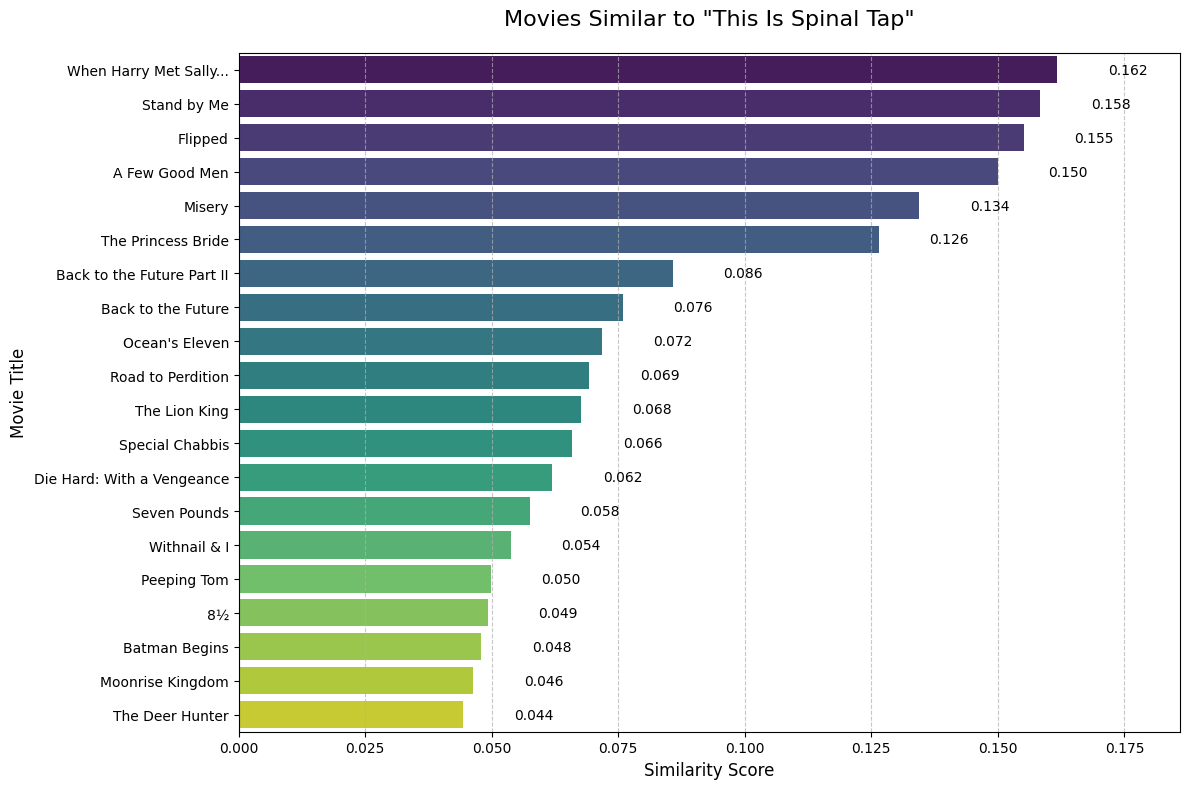

Series_Title  \
975     When Harry Met Sally...   
267                 Stand by Me   
760                     Flipped   
824              A Few Good Men   
670                      Misery   
406          The Princess Bride   
675  Back to the Future Part II   
47           Back to the Future   
795              Ocean's Eleven   
791           Road to Perdition   
43                The Lion King   
335             Special Chabbis   
963  Die Hard: With a Vengeance   
917                Seven Pounds   
830                Withnail & I   
864                 Peeping Tom   
432                          8½   
155               Batman Begins   
598            Moonrise Kingdom   
278             The Deer Hunter   

                                              Overview           Director  \
975  Harry and Sally have known each other for year...         Rob Reiner   
267  After the death of one of his friends, a write...         Rob Reiner   
760  Two eighth-graders start to have feelings for ...         Rob Reiner   
824  Military lawyer Lieutenant Daniel Kaffee defen...         Rob Reiner   
670  After a famous author is rescued from a car cr...         Rob Reiner   
406  While home sick in bed, a young boy's grandfat...         Rob Reiner   
675  After visiting 2015, Marty McFly must repeat h...    Robert Zemeckis   
47   Marty McFly, a 17-year-old high school student...    Robert Zemeckis   
795  Danny Ocean and his ten accomplices plan to ro...  Steven Soderbergh   
791  A mob enforcer's son witnesses a murder, forci...         Sam Mendes   
43   Lion prince Simba and his father are targeted ...       Roger Allers   
335  A gang of con-men rob prominent rich businessm...      Neeraj Pandey   
963  John McClane and a Harlem store owner are targ...     John McTiernan   
917  A man with a fateful secret embarks on an extr...   Gabriele Muccino   
830  In 1969, two substance-abusing, unemployed act...     Bruce Robinson   
864  A young man murders women, using a movie camer...     Michael Powell   
432  A harried movie director retreats into his mem...   Federico Fellini   
155  After training with his mentor, Batman begins ...  Christopher Nolan   
598  A pair of young lovers flee their New England ...       Wes Anderson   
278  An in-depth examination of the ways in which t...     Michael Cimino   

                    Star1               Star2               Star3  \
975         Billy Crystal            Meg Ryan       Carrie Fisher   
267           Wil Wheaton       River Phoenix       Corey Feldman   
760      Madeline Carroll    Callan McAuliffe   Rebecca De Mornay   
824            Tom Cruise      Jack Nicholson          Demi Moore   
670            James Caan         Kathy Bates  Richard Farnsworth   
406            Cary Elwes      Mandy Patinkin        Robin Wright   
675        Michael J. Fox   Christopher Lloyd        Lea Thompson   
47         Michael J. Fox   Christopher Lloyd        Lea Thompson   
795        George Clooney           Brad Pitt       Julia Roberts   
791             Tom Hanks      Tyler Hoechlin           Rob Maxey   
43            Rob Minkoff   Matthew Broderick        Jeremy Irons   
335          Akshay Kumar         Anupam Kher      Manoj Bajpayee   
963          Bruce Willis        Jeremy Irons   Samuel L. Jackson   
917            Will Smith      Rosario Dawson     Woody Harrelson   
830      Richard E. Grant         Paul McGann   Richard Griffiths   
864        Karlheinz Böhm         Anna Massey       Moira Shearer   
432  Marcello Mastroianni         Anouk Aimée   Claudia Cardinale   
155        Christian Bale       Michael Caine        Ken Watanabe   
598          Jared Gilman        Kara Hayward        Bruce Willis   
278        Robert De Niro  Christopher Walken         John Cazale   

     Similarity_Score  
975          0.161721  
267          0.158401  
760          0.155143  
824          0.149984  
670          0.134449  
406          0.126477  
675          0.085803  
47           0.075853  

In [ ]:

run_movie_recommender(df, "This Is Spinal Tap", 20)

In [ ]:
#Example usage
input_movie_name = "This Is Spinal Tap"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

         Series_Title  Cosine Similarity
0  This Is Spinal Tap                1.0


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie,
    or the top Siamese recommendation if there's no match, or the top content-based
    recommendation if no Siamese recommendation is available.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # If no Siamese recommendation is available, return the top content-based recommendation
    if isinstance(content_based_recommendations, pd.DataFrame) and not content_based_recommendations.empty:
        for _, row in content_based_recommendations.iterrows():
            if row['Series_Title'] != input_movie_name:
                return {
                    "title": row['Series_Title'],
                    "similarity_score": row['Similarity_Score'],
                    "source": "Content-based"
                }

    # Fallback if nothing suitable found
    return None
# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "This Is Spinal Tap"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'This Is Spinal Tap':
Recommended movie: When Harry Met Sally...
Similarity score: 0.1617
Source: Content-based


ماندانا گنجی

Begin Again

good movies

Top 20 movies similar to 'The Pursuit of Happyness':
                Series_Title  Similarity_Score
                Seven Pounds          0.294066
                      Jagten          0.142384
                       Crash          0.121215
          The Man from Earth          0.095538
                      Clerks          0.094181
             The Truman Show          0.080294
           Kramer vs. Kramer          0.079085
      The Godfather: Part II          0.072920
                  Jab We Met          0.068000
                   The Birds          0.065396
      The Fault in Our Stars          0.060535
                 L'avventura          0.057433
                The Wrestler          0.055032
Planes, Trains & Automobiles          0.052484
                      Gifted          0.052259
               Despicable Me          0.050615
                    I Am Sam          0.048035
              Reservoir Dogs          0.048002
                  Forushande          0.047997
       

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


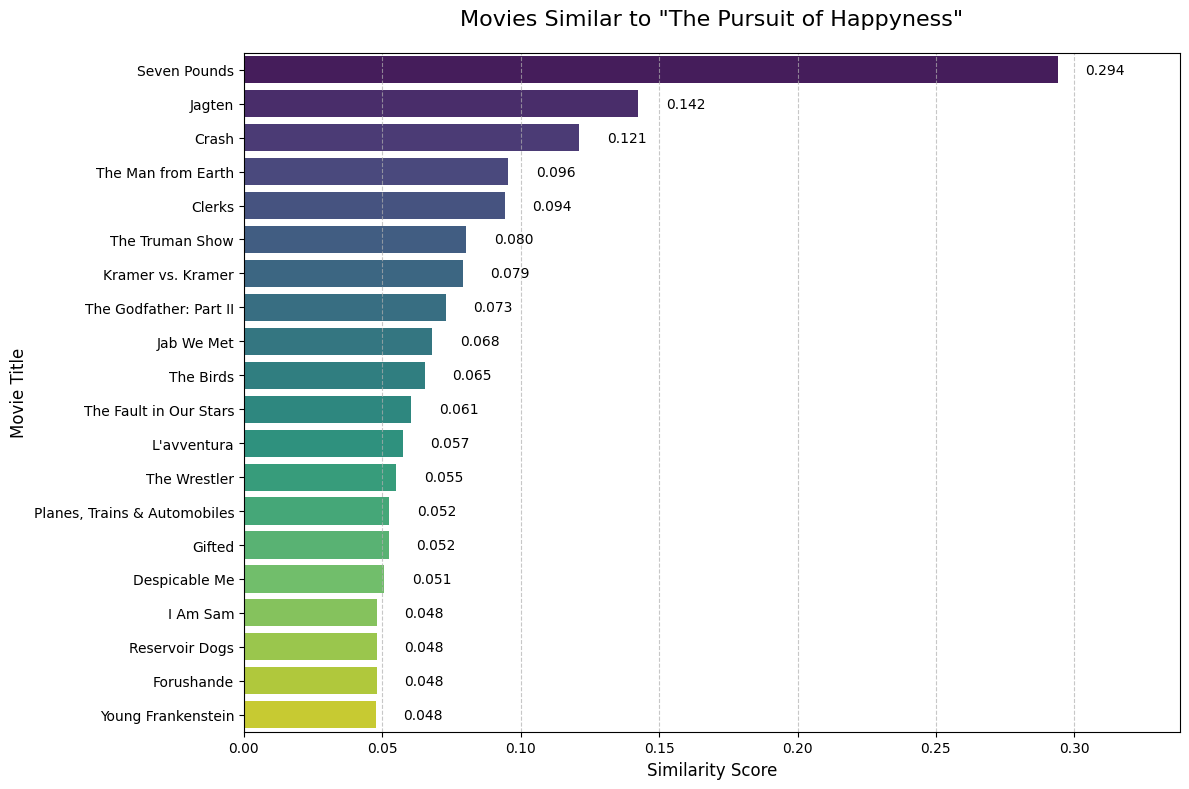

Series_Title  \
917                  Seven Pounds   
88                         Jagten   
775                         Crash   
495            The Man from Earth   
816                        Clerks   
250               The Truman Show   
689             Kramer vs. Kramer   
3          The Godfather: Part II   
490                    Jab We Met   
862                     The Birds   
731        The Fault in Our Stars   
550                   L'avventura   
489                  The Wrestler   
978  Planes, Trains & Automobiles   
883                        Gifted   
906                 Despicable Me   
788                      I Am Sam   
103                Reservoir Dogs   
572                    Forushande   
417            Young Frankenstein   

                                              Overview  \
917  A man with a fateful secret embarks on an extr...   
88   A teacher lives a lonely life, all the while s...   
775  Los Angeles citizens with vastly separate live...   
495  An impromptu goodbye party for Professor John ...   
816  A day in the lives of two convenience clerks n...   
250  An insurance salesman discovers his whole life...   
689  Ted Kramer's wife leaves him, allowing for a l...   
3    The early life and career of Vito Corleone in ...   
490  A depressed wealthy businessman finds his life...   
862  A wealthy San Francisco socialite pursues a po...   
731  Two teenage cancer patients begin a life-affir...   
550  A woman disappears during a Mediterranean boat...   
489  A faded professional wrestler must retire, but...   
978  A man must struggle to travel home for Thanksg...   
883  Frank, a single man raising his child prodigy ...   
906  When a criminal mastermind uses a trio of orph...   
788  A mentally handicapped man fights for custody ...   
103  When a simple jewelry heist goes horribly wron...   
572  While both participating in a production of "D...   
417  An American grandson of the infamous scientist...   

                   Director              Star1              Star2  \
917        Gabriele Muccino         Will Smith     Rosario Dawson   
88        Thomas Vinterberg     Mads Mikkelsen   Thomas Bo Larsen   
775             Paul Haggis        Don Cheadle     Sandra Bullock   
495       Richard Schenkman    David Lee Smith          Tony Todd   
816             Kevin Smith   Brian O'Halloran      Jeff Anderson   
250              Peter Weir         Jim Carrey          Ed Harris   
689           Robert Benton     Dustin Hoffman       Meryl Streep   
3      Francis Ford Coppola          Al Pacino     Robert De Niro   
490              Imtiaz Ali      Shahid Kapoor     Kareena Kapoor   
862        Alfred Hitchcock         Rod Taylor       Tippi Hedren   
731              Josh Boone   Shailene Woodley       Ansel Elgort   
550  Michelangelo Antonioni  Gabriele Ferzetti       Monica Vitti   
489        Darren Aronofsky      Mickey Rourke       Marisa Tomei   
978             John Hughes       Steve Martin         John Candy   
883               Marc Webb        Chris Evans      Mckenna Grace   
906           Pierre Coffin       Chris Renaud       Steve Carell   
788           Jessie Nelson          Sean Penn  Michelle Pfeiffer   
103       Quentin Tarantino      Harvey Keitel           Tim Roth   
572          Asghar Farhadi    Shahab Hosseini  Taraneh Alidoosti   
417              Mel Brooks        Gene Wilder      Madeline Kahn   

                  Star3  Similarity_Score  
917     Woody Harrelson          0.294066  
88    Annika Wedderkopp          0.142384  
775      Thandie Newton          0.121215  
495    John Billingsley          0.095538  
816  Marilyn Ghigliotti          0.094181  
250        Laura Linney          0.080294  
689      Jane Alexander          0.079085  
3         Robert Duvall          0.072920  
490         Tarun Arora          0.068000  
862       Jessica Tandy          0.065396  
731           Nat Wolff          0.060535  
550         Lea Massari          0.057433  
48

In [ ]:


run_movie_recommender(df, "The Pursuit of Happyness", 20)

In [ ]:
#Example usage
input_movie_name = "The Pursuit of Happyness"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                                Series_Title  Cosine Similarity
0                   The Pursuit of Happyness           1.000000
1               Le scaphandre et le papillon           0.983354
2                                       Lion           0.977993
3                         The Straight Story           0.969281
4                           The Elephant Man           0.964400
5   My Left Foot: The Story of Christy Brown           0.960847
6                                    Zerkalo           0.956797
7                         The Social Network           0.951563
8                           A Beautiful Mind           0.948497
9                                 Awakenings           0.940985
10                               Mar adentro           0.929086
11                        Dallas Buyers Club           0.870594


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie,
    or the top Siamese recommendation if there's no match, or the top content-based
    recommendation if no Siamese recommendation is available.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # If no Siamese recommendation is available, return the top content-based recommendation
    if isinstance(content_based_recommendations, pd.DataFrame) and not content_based_recommendations.empty:
        for _, row in content_based_recommendations.iterrows():
            if row['Series_Title'] != input_movie_name:
                return {
                    "title": row['Series_Title'],
                    "similarity_score": row['Similarity_Score'],
                    "source": "Content-based"
                }

    # Fallback if nothing suitable found
    return None

# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "The Pursuit of Happyness"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'The Pursuit of Happyness':
Recommended movie: Le scaphandre et le papillon
Similarity score: 0.9834
Source: Siamese network


Bad Movie

Top 20 movies similar to 'Her':
        Series_Title  Similarity_Score
 Lost in Translation          0.146151
Being John Malkovich          0.111035
           Gladiator          0.107271
         Jojo Rabbit          0.105469
         Adaptation.          0.105410
             Arrival          0.103007
         Stand by Me          0.100314
         The Fighter          0.095448
        The Prestige          0.095446
        Hotel Rwanda          0.092216
 Gake no ue no Ponyo          0.091497
         Match Point          0.091313
        The Avengers          0.090007
          The Artist          0.089481
        Sunset Blvd.          0.087713
      Marriage Story          0.085192
        The Warriors          0.079338
               Joker          0.077364
        Mary and Max          0.075200
       Walk the Line          0.074310


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


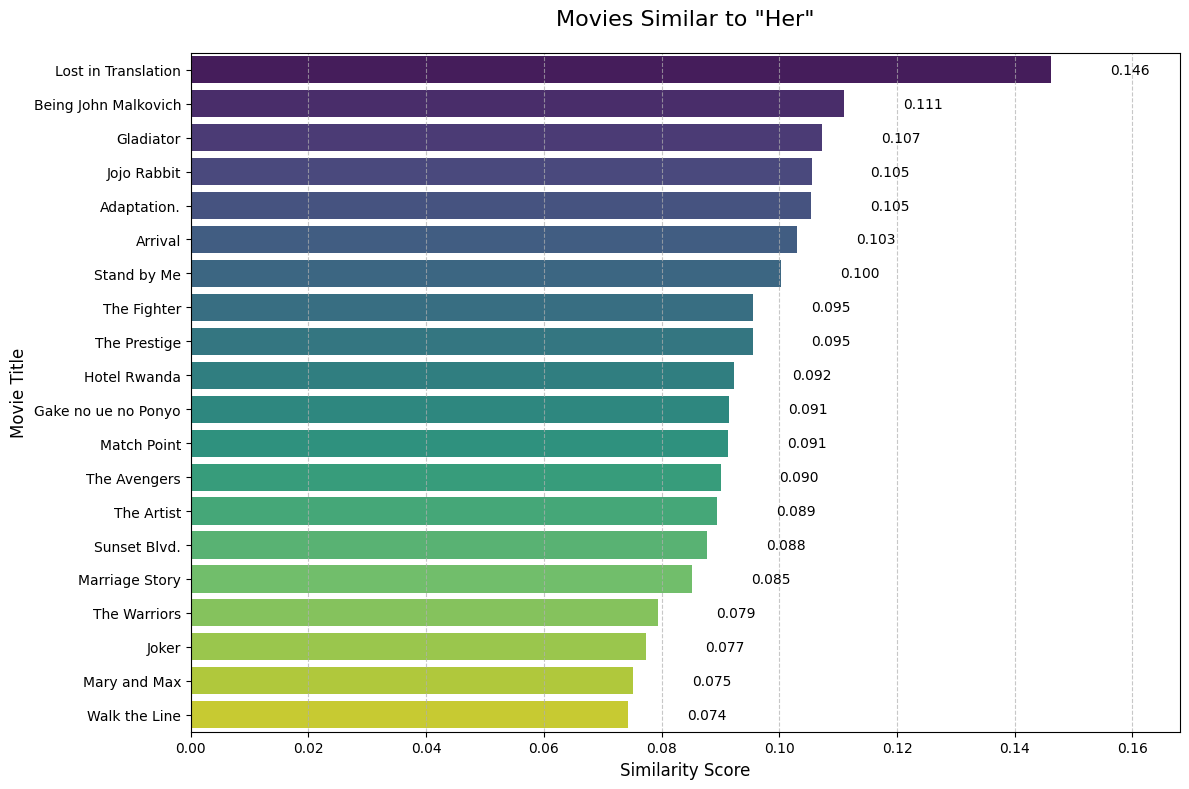

Series_Title                                           Overview  \
780   Lost in Translation  A faded movie star and a neglected young woman...   
805  Being John Malkovich  A puppeteer discovers a portal that leads lite...   
39              Gladiator  A former Roman General sets out to exact venge...   
475           Jojo Rabbit  A young boy in Hitler's army finds out his mot...   
789           Adaptation.  A lovelorn screenwriter becomes desperate as h...   
476               Arrival  A linguist works with the military to communic...   
267           Stand by Me  After the death of one of his friends, a write...   
614           The Fighter  Based on the story of Micky Ward, a fledgling ...   
36           The Prestige  After a tragic accident, two stage magicians e...   
235          Hotel Rwanda  Paul Rusesabagina, a hotel manager, houses ove...   
756   Gake no ue no Ponyo  A five-year-old boy develops a relationship wi...   
929           Match Point  At a turning point in his life, a former tenni...   
357          The Avengers  Earth's mightiest heroes must come together an...   
481            The Artist  An egomaniacal film star develops a relationsh...   
82           Sunset Blvd.  A screenwriter develops a dangerous relationsh...   
466        Marriage Story  Noah Baumbach's incisive and compassionate loo...   
983          The Warriors  In the near future, a charismatic leader summo...   
33                  Joker  In Gotham City, mentally troubled comedian Art...   
229          Mary and Max  A tale of friendship between two unlikely pen ...   
635         Walk the Line  A chronicle of country music legend Johnny Cas...   

                Director                Star1                   Star2  \
780        Sofia Coppola          Bill Murray      Scarlett Johansson   
805          Spike Jonze          John Cusack            Cameron Diaz   
39          Ridley Scott        Russell Crowe         Joaquin Phoenix   
475        Taika Waititi  Roman Griffin Davis       Thomasin McKenzie   
789          Spike Jonze         Nicolas Cage            Meryl Streep   
476     Denis Villeneuve            Amy Adams           Jeremy Renner   
267           Rob Reiner          Wil Wheaton           River Phoenix   
614     David O. Russell        Mark Wahlberg          Christian Bale   
36     Christopher Nolan       Christian Bale            Hugh Jackman   
235         Terry George          Don Cheadle          Sophie Okonedo   
756       Hayao Miyazaki       Cate Blanchett              Matt Damon   
929          Woody Allen   Scarlett Johansson    Jonathan Rhys Meyers   
357          Joss Whedon    Robert Downey Jr.             Chris Evans   
481  Michel Hazanavicius        Jean Dujardin           Bérénice Bejo   
82          Billy Wilder       William Holden          Gloria Swanson   
466        Noah Baumbach          Adam Driver      Scarlett Johansson   
983          Walter Hill         Michael Beck             James Remar   
33         Todd Phillips      Joaquin Phoenix          Robert De Niro   
229          Adam Elliot        Toni Collette  Philip Seymour Hoffman   
635        James Mangold      Joaquin Phoenix       Reese Witherspoon   

                  Star3  Similarity_Score  
780     Giovanni Ribisi          0.146151  
805    Catherine Keener          0.111035  
39       Connie Nielsen          0.107271  
475  Scarlett Johansson          0.105469  
789        Chris Cooper          0.105410  
476     Forest Whitaker          0.103007  
267       Corey Feldman          0.100314  
614           Amy Adams          0.095448  
36   Scarlett Johansson          0.095446  
235     Joaquin Phoenix          0.092216  
756         Liam Neeson          0.091497  
929      Emily Mortimer          0.091313  
357  Scarlett Johansson          0.090007  
481        John Goodman          0.089481  
82   Erich von Stroheim          0.087713  
466         Julia Greer          0.085192  
983       Dorsey Wright          0.079338  
33    

In [ ]:

run_movie_recommender(df, "Her", 20)

In [ ]:
#Example usage
input_movie_name = "Her"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                            Series_Title  Cosine Similarity
0                                    Her           1.000000
1  Eternal Sunshine of the Spotless Mind           0.927815


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie,
    or the top Siamese recommendation if there's no match, or the top content-based
    recommendation if no Siamese recommendation is available.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # If no Siamese recommendation is available, return the top content-based recommendation
    if isinstance(content_based_recommendations, pd.DataFrame) and not content_based_recommendations.empty:
        for _, row in content_based_recommendations.iterrows():
            if row['Series_Title'] != input_movie_name:
                return {
                    "title": row['Series_Title'],
                    "similarity_score": row['Similarity_Score'],
                    "source": "Content-based"
                }

    # Fallback if nothing suitable found
    return None
# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Her"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Her':
Recommended movie: Eternal Sunshine of the Spotless Mind
Similarity score: 0.9278
Source: Siamese network


Mahdi Salehi

Stardust

Top 20 movies similar to 'Full Metal Jacket':
                                                        Series_Title  Similarity_Score
                                        Kingsman: The Secret Service          0.137691
                                                               Glory          0.086712
                                                    The Great Escape          0.084706
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb          0.083620
                                                           Spartacus          0.075948
                                                  The Imitation Game          0.075147
                                      The Boy in the Striped Pyjamas          0.071024
                                                  A Clockwork Orange          0.067626
                                                         The Killing          0.067515
                                                      Paths of Glory          0.0668

<ipython-input-12-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


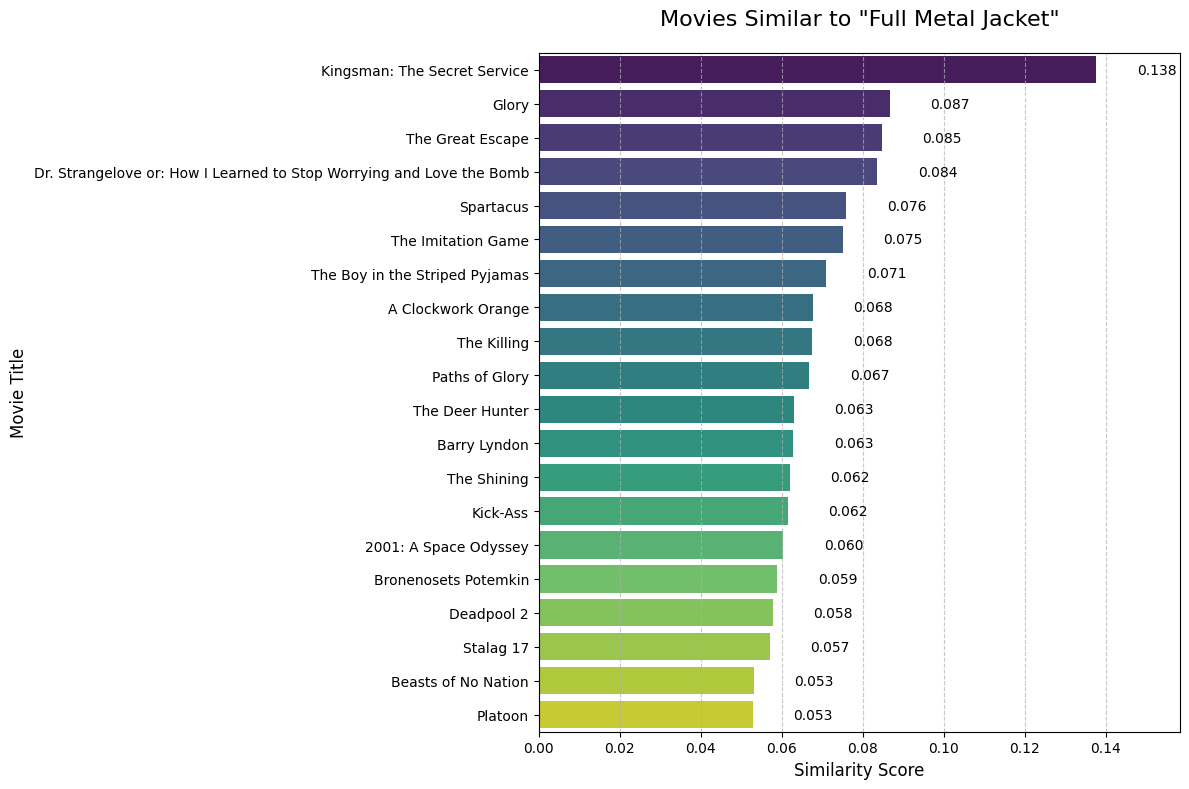

Series_Title  \
730                       Kingsman: The Secret Service   
673                                              Glory   
179                                   The Great Escape   
78   Dr. Strangelove or: How I Learned to Stop Worr...   
549                                          Spartacus   
338                                 The Imitation Game   
616                     The Boy in the Striped Pyjamas   
113                                 A Clockwork Orange   
441                                        The Killing   
80                                      Paths of Glory   
278                                    The Deer Hunter   
281                                       Barry Lyndon   
73                                         The Shining   
908                                           Kick-Ass   
114                              2001: A Space Odyssey   
462                               Bronenosets Potemkin   
722                                         Deadpool 2   
445                                          Stalag 17   
747                                Beasts of No Nation   
268                                            Platoon   

                                              Overview              Director  \
730  A spy organisation recruits a promising street...        Matthew Vaughn   
673  Robert Gould Shaw leads the U.S. Civil War's f...          Edward Zwick   
179  Allied prisoners of war plan for several hundr...          John Sturges   
78   An insane general triggers a path to nuclear h...       Stanley Kubrick   
549  The slave Spartacus leads a violent revolt aga...       Stanley Kubrick   
338  During World War II, the English mathematical ...         Morten Tyldum   
616  Through the innocent eyes of Bruno, the eight-...           Mark Herman   
113  In the future, a sadistic gang leader is impri...       Stanley Kubrick   
441  Crook Johnny Clay assembles a five man team to...       Stanley Kubrick   
80   After refusing to attack an enemy position, a ...       Stanley Kubrick   
278  An in-depth examination of the ways in which t...        Michael Cimino   
281  An Irish rogue wins the heart of a rich widow ...       Stanley Kubrick   
73   A family heads to an isolated hotel for the wi...       Stanley Kubrick   
908  Dave Lizewski is an unnoticed high school stud...        Matthew Vaughn   
114  After discovering a mysterious artifact buried...       Stanley Kubrick   
462  In the midst of the Russian Revolution of 1905...  Sergei M. Eisenstein   
722  Foul-mouthed mutant mercenary Wade Wilson (a.k...          David Leitch   
445  When two escaping American World War II prison...          Billy Wilder   
747  A drama based on the experiences of Agu, a chi...    Cary Joji Fukunaga   
268  Chris Taylor, a neophyte recruit in Vietnam, f...          Oliver Stone   

                    Star1               Star2                 Star3  \
730           Colin Firth       Taron Egerton     Samuel L. Jackson   
673     Matthew Broderick   Denzel Washington            Cary Elwes   
179         Steve McQueen        James Garner  Richard Attenborough   
78          Peter Sellers     George C. Scott       Sterling Hayden   
549          Kirk Douglas    Laurence Olivier          Jean Simmons   
338  Benedict Cumberbatch     Keira Knightley         Matthew Goode   
616       Asa Butterfield       David Thewlis         Rupert Friend   
113      Malcolm McDowell       Patrick Magee         Michael Bates   
441       Sterling Hayden         Coleen Gray         Vince Edwards   
80           Kirk Douglas        Ralph Meeker        Adolphe Menjou   
278        Robert De Niro  Christopher Walken           John Cazale   
281           Ryan O'Neal     Marisa Berenson         Patrick Magee   
73         Jack Nicholson      Shelley Duvall           Danny Lloyd   
908  Aaron Taylor-Johnson        Nicolas Cage    Chloë Grace Moretz   
114           Keir Dullea       Gary Lockwood     William Sylvester   
462   

In [ ]:
run_movie_recommender(df, "Full Metal Jacket", 20)

In [ ]:
#Example usage
input_movie_name = "Full Metal Jacket"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                      Series_Title  Cosine Similarity
0                Full Metal Jacket           1.000000
1                   Paths of Glory           0.984777
2   All Quiet on the Western Front           0.983927
3                The Thin Red Line           0.980624
4                          Platoon           0.977017
5            Judgment at Nuremberg           0.976602
6                  The Deer Hunter           0.975677
7              Saving Private Ryan           0.968558
8           La battaglia di Algeri           0.946940
9               La Grande Illusion           0.946432
10                 Ivanovo detstvo           0.935422
11             Beasts of No Nation           0.912259
12                        Lifeboat           0.901024
13           Au revoir les enfants           0.879609
14                     Mandariinid           0.816549


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie,
    or the top Siamese recommendation if there's no match, or the top content-based
    recommendation if no Siamese recommendation is available.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # If no Siamese recommendation is available, return the top content-based recommendation
    if isinstance(content_based_recommendations, pd.DataFrame) and not content_based_recommendations.empty:
        for _, row in content_based_recommendations.iterrows():
            if row['Series_Title'] != input_movie_name:
                return {
                    "title": row['Series_Title'],
                    "similarity_score": row['Similarity_Score'],
                    "source": "Content-based"
                }

    # Fallback if nothing suitable found
    return None
# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Full Metal Jacket"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Full Metal Jacket':
Recommended movie: Paths of Glory
Similarity score: 0.9848
Source: Both approaches


Bad Movie

Top 20 movies similar to 'Good Will Hunting':
                   Series_Title  Similarity_Score
                           Argo          0.142434
                 Gone Baby Gone          0.139502
                      True Grit          0.117976
          Manchester by the Sea          0.101555
           The Bourne Supremacy          0.098724
           The Bourne Ultimatum          0.096337
                The Sixth Sense          0.092017
                   Paddington 2          0.090493
                   The Departed          0.090110
                      Gone Girl          0.089195
            Gake no ue no Ponyo          0.088311
                     Awakenings          0.088003
Il buono, il brutto, il cattivo          0.087623
             Dead Poets Society          0.084863
            Saving Private Ryan          0.083707
                    The Martian          0.079752
                  Abre los ojos          0.077699
                        Aladdin          0.075652
    

<ipython-input-12-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


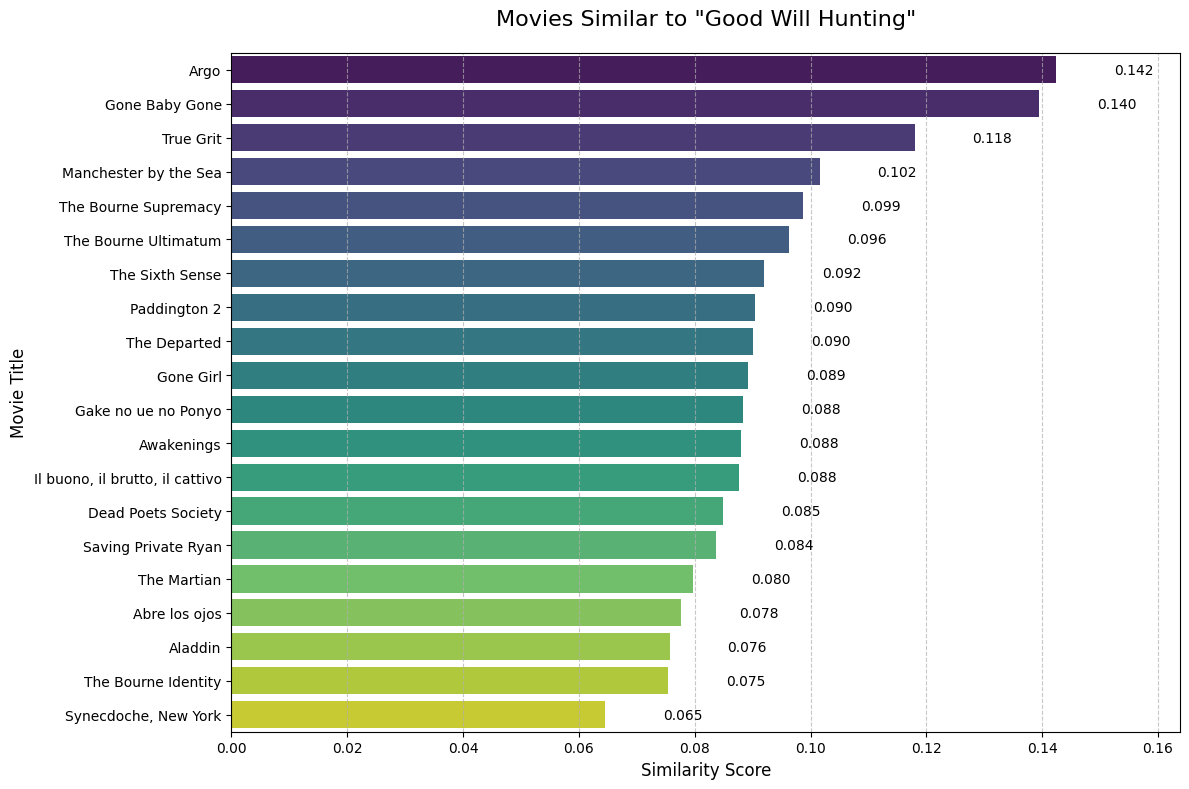

Series_Title  \
753                             Argo   
922                   Gone Baby Gone   
904                        True Grit   
580            Manchester by the Sea   
777             The Bourne Supremacy   
362             The Bourne Ultimatum   
248                  The Sixth Sense   
576                     Paddington 2   
37                      The Departed   
210                        Gone Girl   
756              Gake no ue no Ponyo   
671                       Awakenings   
12   Il buono, il brutto, il cattivo   
266               Dead Poets Society   
24               Saving Private Ryan   
329                      The Martian   
804                    Abre los ojos   
399                          Aladdin   
511              The Bourne Identity   
933             Synecdoche, New York   

                                              Overview            Director  \
753  Acting under the cover of a Hollywood producer...         Ben Affleck   
922  Two Boston area detectives investigate a littl...         Ben Affleck   
904  A stubborn teenager enlists the help of a toug...          Ethan Coen   
580  A depressed uncle is asked to take care of his...    Kenneth Lonergan   
777  When Jason Bourne is framed for a CIA operatio...     Paul Greengrass   
362  Jason Bourne dodges a ruthless C.I.A. official...     Paul Greengrass   
248  A boy who communicates with spirits seeks the ...  M. Night Shyamalan   
576  Paddington (Ben Whishaw), now happily settled ...           Paul King   
37   An undercover cop and a mole in the police att...     Martin Scorsese   
210  With his wife's disappearance having become th...       David Fincher   
756  A five-year-old boy develops a relationship wi...      Hayao Miyazaki   
671  The victims of an encephalitis epidemic many y...      Penny Marshall   
12   A bounty hunting scam joins two men in an unea...        Sergio Leone   
266  Maverick teacher John Keating uses poetry to e...          Peter Weir   
24   Following the Normandy Landings, a group of U....    Steven Spielberg   
329  An astronaut becomes stranded on Mars after hi...        Ridley Scott   
804  A very handsome man finds the love of his life...  Alejandro Amenábar   
399  A kindhearted street urchin and a power-hungry...        Ron Clements   
511  A man is picked up by a fishing boat, bullet-r...          Doug Liman   
933  A theatre director struggles with his work, an...     Charlie Kaufman   

                      Star1                Star2                Star3  \
753             Ben Affleck       Bryan Cranston         John Goodman   
922          Morgan Freeman            Ed Harris        Casey Affleck   
904               Joel Coen         Jeff Bridges           Matt Damon   
580           Casey Affleck    Michelle Williams        Kyle Chandler   
777              Matt Damon       Franka Potente           Joan Allen   
362              Matt Damon        Edgar Ramírez           Joan Allen   
248            Bruce Willis    Haley Joel Osment        Toni Collette   
576             Ben Whishaw           Hugh Grant      Hugh Bonneville   
37        Leonardo DiCaprio           Matt Damon       Jack Nicholson   
210             Ben Affleck        Rosamund Pike  Neil Patrick Harris   
756          Cate Blanchett           Matt Damon          Liam Neeson   
671          Robert De Niro       Robin Williams         Julie Kavner   
12           Clint Eastwood          Eli Wallach        Lee Van Cleef   
266          Robin Williams  Robert Sean Leonard          Ethan Hawke   
24                Tom Hanks           Matt Damon         Tom Sizemore   
329              Matt Damon     Jessica Chastain         Kristen Wiig   
804         Eduardo Noriega        Penélope Cruz           Chete Lera   
399             John Musker        Scott Weinger       Robin Williams   
511          Franka Potente           Matt Damon         Chris Cooper   
933  Philip Seymour Hoffman      Samantha Morton    Michelle Williams   

     Simil

In [ ]:
run_movie_recommender(df, "Good Will Hunting", 20)

In [ ]:
#Example usage
input_movie_name = "Good Will Hunting"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                         Series_Title  Cosine Similarity
0                   Good Will Hunting           1.000000
1                        The Notebook           0.984197
2                      Days of Heaven           0.983228
3                     Brief Encounter           0.971526
4                       Before Sunset           0.965923
5               The Last Picture Show           0.957914
6                       Belle de jour           0.954324
7                 Hiroshima mon amour           0.954284
8       The Bridges of Madison County           0.951360
9       Sunrise: A Song of Two Humans           0.951337
10                            Titanic           0.950437
11  Portrait de la jeune fille en feu           0.947881
12             The Remains of the Day           0.947380
13               Call Me by Your Name           0.945499
14                       Forrest Gump           0.945163
15              Sense and Sensibility           0.935942
16                  Pride & Pre

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie,
    or the top Siamese recommendation if there's no match, or the top content-based
    recommendation if no Siamese recommendation is available.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # If no Siamese recommendation is available, return the top content-based recommendation
    if isinstance(content_based_recommendations, pd.DataFrame) and not content_based_recommendations.empty:
        for _, row in content_based_recommendations.iterrows():
            if row['Series_Title'] != input_movie_name:
                return {
                    "title": row['Series_Title'],
                    "similarity_score": row['Similarity_Score'],
                    "source": "Content-based"
                }

    # Fallback if nothing suitable found
    return None
# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Good Will Hunting"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Good Will Hunting':
Recommended movie: The Notebook
Similarity score: 0.9842
Source: Siamese network


Marziyeh Akbari

Safety Not Guaranteed  

Top 20 movies similar to 'Young Frankenstein':
                       Series_Title  Similarity_Score
                    Blazing Saddles          0.145689
                         Paper Moon          0.108755
                        Stand by Me          0.102254
Willy Wonka & the Chocolate Factory          0.100206
                  The Invisible Man          0.092972
                      Hacksaw Ridge          0.089769
  Scarface: The Shame of the Nation          0.080543
             Swades: We, the People          0.078627
                 Back to the Future          0.076755
            Bir Zamanlar Anadolu'da          0.075722
                         Stagecoach          0.072128
                         Braveheart          0.070453
                               Coco          0.069156
                        Waking Life          0.067835
                      The Hurricane          0.067165
                Singin' in the Rain          0.065958
                         Green Book

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


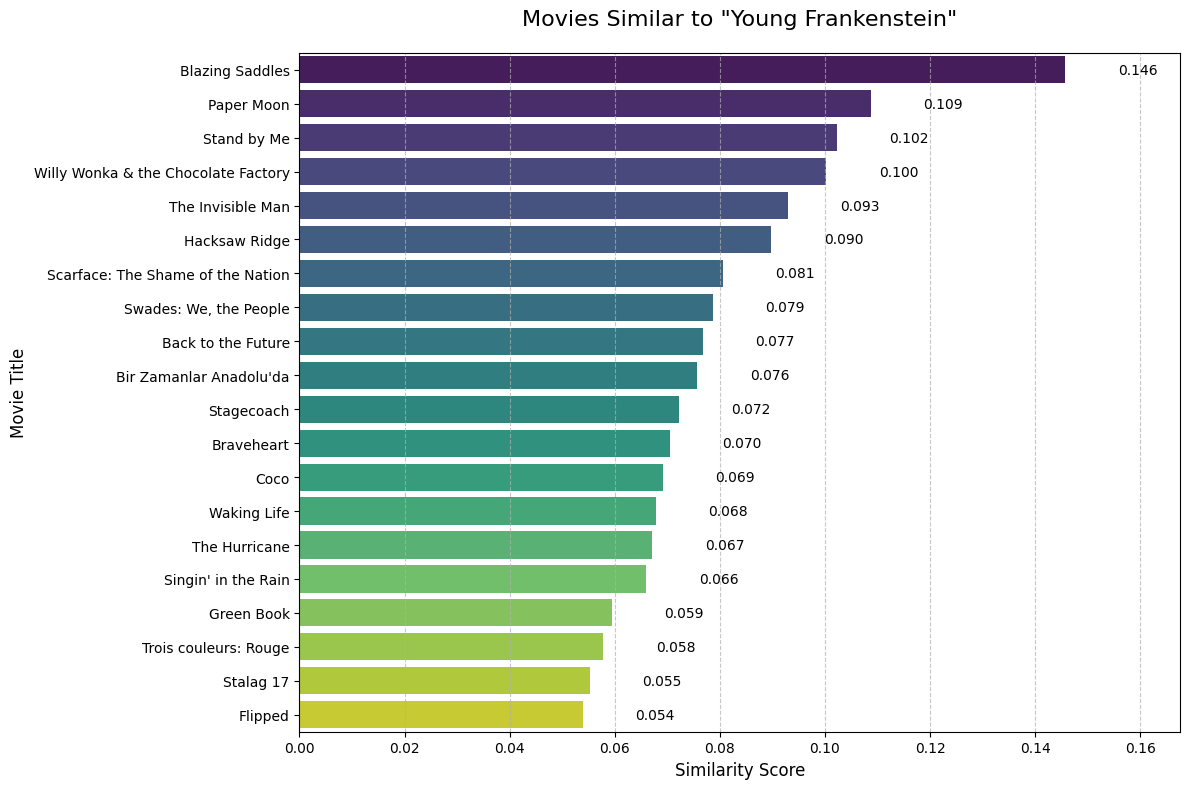

Series_Title  \
848                      Blazing Saddles   
284                           Paper Moon   
267                          Stand by Me   
698  Willy Wonka & the Chocolate Factory   
876                    The Invisible Man   
212                        Hacksaw Ridge   
718    Scarface: The Shame of the Nation   
156               Swades: We, the People   
47                    Back to the Future   
480              Bir Zamanlar Anadolu'da   
713                           Stagecoach   
102                           Braveheart   
61                                  Coco   
643                          Waking Life   
952                        The Hurricane   
120                  Singin' in the Rain   
131                           Green Book   
260                Trois couleurs: Rouge   
445                            Stalag 17   
760                              Flipped   

                                              Overview              Director  \
848  In order to ruin a western town, a corrupt pol...            Mel Brooks   
284  During the Great Depression, a con man finds h...     Peter Bogdanovich   
267  After the death of one of his friends, a write...            Rob Reiner   
698  A poor but hopeful boy seeks one of the five c...            Mel Stuart   
876  A scientist finds a way of becoming invisible,...           James Whale   
212  World War II American Army Medic Desmond T. Do...            Mel Gibson   
718  An ambitious and nearly insane violent gangste...          Howard Hawks   
156  A successful Indian scientist returns to an In...    Ashutosh Gowariker   
47   Marty McFly, a 17-year-old high school student...       Robert Zemeckis   
480  A group of men set out in search of a dead bod...     Nuri Bilge Ceylan   
713  A group of people traveling on a stagecoach fi...             John Ford   
102  Scottish warrior William Wallace leads his cou...            Mel Gibson   
61   Aspiring musician Miguel, confronted with his ...           Lee Unkrich   
643  A man shuffles through a dream meeting various...     Richard Linklater   
952  The story of Rubin 'Hurricane' Carter, a boxer...        Norman Jewison   
120  A silent film production company and cast make...         Stanley Donen   
131  A working-class Italian-American bouncer becom...        Peter Farrelly   
260  A model discovers a retired judge is keen on i...  Krzysztof Kieslowski   
445  When two escaping American World War II prison...          Billy Wilder   
760  Two eighth-graders start to have feelings for ...            Rob Reiner   

                 Star1                   Star2               Star3  \
848     Cleavon Little             Gene Wilder        Slim Pickens   
284        Ryan O'Neal            Tatum O'Neal       Madeline Kahn   
267        Wil Wheaton           River Phoenix       Corey Feldman   
698        Gene Wilder          Jack Albertson        Peter Ostrum   
876       Claude Rains           Gloria Stuart    William Harrigan   
212    Andrew Garfield         Sam Worthington         Luke Bracey   
718     Richard Rosson               Paul Muni          Ann Dvorak   
156     Shah Rukh Khan           Gayatri Joshi      Kishori Ballal   
47      Michael J. Fox       Christopher Lloyd        Lea Thompson   
480    Muhammet Uzuner          Yilmaz Erdogan        Taner Birsel   
713         John Wayne           Claire Trevor         Andy Devine   
102         Mel Gibson          Sophie Marceau    Patrick McGoohan   
61       Adrian Molina        Anthony Gonzalez  Gael García Bernal   
643        Ethan Hawke      Trevor Jack Brooks   Lorelei Linklater   
952  Denzel Washington       Vicellous Shannon  Deborah Kara Unger   
120         Gene Kelly              Gene Kelly     Donald O'Connor   
131    Viggo Mortensen          Mahershala Ali    Linda Cardellini   
260        Irène Jacob  Jean-Louis Trintignant    Frédérique Feder   
445     William Holden              Don Taylor      Otto Preminger   
760   Madeline Carroll

In [ ]:
run_movie_recommender(df, "Young Frankenstein", 20)

In [ ]:
#Example usage
input_movie_name = "Young Frankenstein"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                                         Series_Title  Cosine Similarity
0                                  Young Frankenstein           1.000000
1                                       Life of Brian           0.968341
2                                  Dazed and Confused           0.959994
3                                        Office Space           0.958725
4   Dr. Strangelove or: How I Learned to Stop Worr...           0.952775
5                                               Zelig           0.950589
6                                           Airplane!           0.946200
7                            Ferris Bueller's Day Off           0.944638
8                                              Clerks           0.941477
9                                      The Odd Couple           0.938941
10                Le charme discret de la bourgeoisie           0.918602
11                                       The Hangover           0.901219
12                                   Le dîner de co

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie,
    or the top Siamese recommendation if there's no match, or the top content-based
    recommendation if no Siamese recommendation is available.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # If no Siamese recommendation is available, return the top content-based recommendation
    if isinstance(content_based_recommendations, pd.DataFrame) and not content_based_recommendations.empty:
        for _, row in content_based_recommendations.iterrows():
            if row['Series_Title'] != input_movie_name:
                return {
                    "title": row['Series_Title'],
                    "similarity_score": row['Similarity_Score'],
                    "source": "Content-based"
                }

    # Fallback if nothing suitable found
    return None
# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Young Frankenstein"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Young Frankenstein':
Recommended movie: Life of Brian
Similarity score: 0.9683
Source: Siamese network


Top 20 movies similar to 'In Bruges':
                             Series_Title  Similarity_Score
                             Serbuan maut          0.111993
                      There Will Be Blood          0.099815
                          Song of the Sea          0.099591
                          Minority Report          0.085843
                               About Time          0.085705
                        Dial M for Murder          0.083114
            Mission: Impossible - Fallout          0.082632
                            Do lok tin si          0.081660
                                    Black          0.081269
                    Rebel Without a Cause          0.081033
                               Goodfellas          0.079236
                         The Lost Weekend          0.078919
Three Billboards Outside Ebbing, Missouri          0.077797
                               Unforgiven          0.072742
                      The Secret of Kells          0.072185
  

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


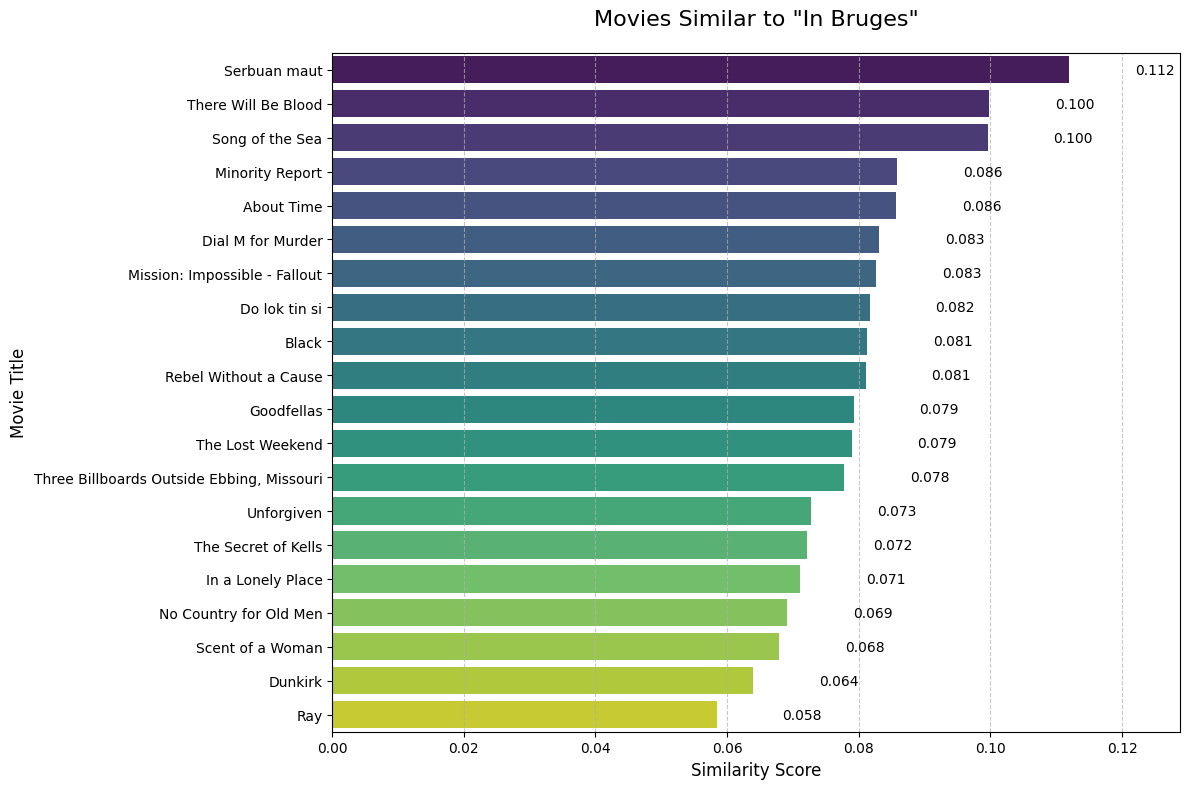

Series_Title  \
900                               Serbuan maut   
149                        There Will Be Blood   
219                            Song of the Sea   
951                            Minority Report   
593                                 About Time   
187                          Dial M for Murder   
725              Mission: Impossible - Fallout   
814                              Do lok tin si   
154                                      Black   
868                      Rebel Without a Cause   
15                                  Goodfellas   
561                           The Lost Weekend   
132  Three Billboards Outside Ebbing, Missouri   
167                                 Unforgiven   
920                        The Secret of Kells   
448                          In a Lonely Place   
232                     No Country for Old Men   
398                           Scent of a Woman   
573                                    Dunkirk   
779                                        Ray   

                                              Overview               Director  \
900  A S.W.A.T. team becomes trapped in a tenement ...           Gareth Evans   
149  A story of family, religion, hatred, oil and m...   Paul Thomas Anderson   
219  Ben, a young Irish boy, and his little sister ...             Tomm Moore   
951  In a future where a special police unit is abl...       Steven Spielberg   
593  At the age of 21, Tim discovers he can travel ...         Richard Curtis   
187  A former tennis player tries to arrange his wi...       Alfred Hitchcock   
725  Ethan Hunt and his IMF team, along with some f...  Christopher McQuarrie   
814  This Hong Kong-set crime drama follows the liv...           Kar-Wai Wong   
154  The cathartic tale of a young woman who can't ...  Sanjay Leela Bhansali   
868  A rebellious young man with a troubled past co...           Nicholas Ray   
15   The story of Henry Hill and his life in the mo...        Martin Scorsese   
561  The desperate life of a chronic alcoholic is f...           Billy Wilder   
132  A mother personally challenges the local autho...        Martin McDonagh   
167  Retired Old West gunslinger William Munny relu...         Clint Eastwood   
920  A young boy in a remote medieval outpost under...             Tomm Moore   
448  A potentially violent screenwriter is a murder...           Nicholas Ray   
232  Violence and mayhem ensue after a hunter stumb...             Ethan Coen   
398  A prep school student needing money agrees to ...           Martin Brest   
573  Allied soldiers from Belgium, the British Empi...      Christopher Nolan   
779  The story of the life and career of the legend...        Taylor Hackford   

                 Star1            Star2              Star3  Similarity_Score  
900          Iko Uwais    Ananda George       Ray Sahetapy          0.111993  
149   Daniel Day-Lewis        Paul Dano       Ciarán Hinds          0.099815  
219        David Rawle  Brendan Gleeson      Lisa Hannigan          0.099591  
951         Tom Cruise    Colin Farrell    Samantha Morton          0.085843  
593   Domhnall Gleeson   Rachel McAdams         Bill Nighy          0.085705  
187        Ray Milland      Grace Kelly    Robert Cummings          0.083114  
725         Tom Cruise     Henry Cavill        Ving Rhames          0.082632  
814           Leon Lai    Michelle Reis  Takeshi Kaneshiro          0.081660  
154   Amitabh Bachchan     Rani Mukerji      Shernaz Patel          0.081269  
868         James Dean     Natalie Wood          Sal Mineo          0.081033  
15      Robert De Niro       Ray Liotta          Joe Pesci          0.079236  
561        Ray Milland       Jane Wyman      Phillip Terry          0.078919  
132  Frances McDormand  Woody Harrelson       Sam Rockwell          0.077797  
167     Clint Eastwood     Gene Hackman     Morgan Freeman          0.072742  
920        Nora Twomey     Evan McGuire    Brendan Gleeson          0.072185  
448    Humphrey B

In [ ]:
run_movie_recommender(df, "In Bruges", 20)

In [ ]:
#Example usage
input_movie_name = "In Bruges"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

                                 Series_Title  Cosine Similarity
0                                   In Bruges           1.000000
1   Three Billboards Outside Ebbing, Missouri           0.990928
2                                 Down by Law           0.988995
3                             American Psycho           0.986929
4                                 After Hours           0.986551
5                            The Long Goodbye           0.985122
6                          The King of Comedy           0.981930
7                                  Knives Out           0.979881
8                          Chung Hing sam lam           0.976298
9                                  Paper Moon           0.975210
10                             Dom za vesanje           0.968026
11                                Adams æbler           0.951779
12                            Rang De Basanti           0.951560
13                                  The Sting           0.947056
14                       

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie,
    or the top Siamese recommendation if there's no match, or the top content-based
    recommendation if no Siamese recommendation is available.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # If no Siamese recommendation is available, return the top content-based recommendation
    if isinstance(content_based_recommendations, pd.DataFrame) and not content_based_recommendations.empty:
        for _, row in content_based_recommendations.iterrows():
            if row['Series_Title'] != input_movie_name:
                return {
                    "title": row['Series_Title'],
                    "similarity_score": row['Similarity_Score'],
                    "source": "Content-based"
                }

    # Fallback if nothing suitable found
    return None
# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "In Bruges"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'In Bruges':
Recommended movie: Three Billboards Outside Ebbing, Missouri
Similarity score: 0.9909
Source: Both approaches


Mohsen Gholami

The man from Earth

In [ ]:
#Example usage
input_movie_name = "Watchmen"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

        Series_Title  Cosine Similarity
0           Watchmen           1.000000
1           The Game           0.990232
2  Blade Runner 2049           0.982652
3            Seppuku           0.972895
4           Oldeuboi           0.809197


Top 20 movies similar to 'Watchmen':
                       Series_Title  Similarity_Score
         X-Men: Days of Future Past          0.098610
                                300          0.096108
                          Andhadhun          0.075592
                              Giant          0.056300
                    The Incredibles          0.055838
                    The Sixth Sense          0.054799
       Batman: Mask of the Phantasm          0.051062
                            The Kid          0.048402
           The Peanut Butter Falcon          0.048014
                        The Hustler          0.046950
                        Blue Velvet          0.043787
Interstate 60: Episodes of the Road          0.042228
         Back to the Future Part II          0.041480
    Who's Afraid of Virginia Woolf?          0.040929
                  Midnight in Paris          0.039548
                 Dallas Buyers Club          0.039280
                               Moon          

<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


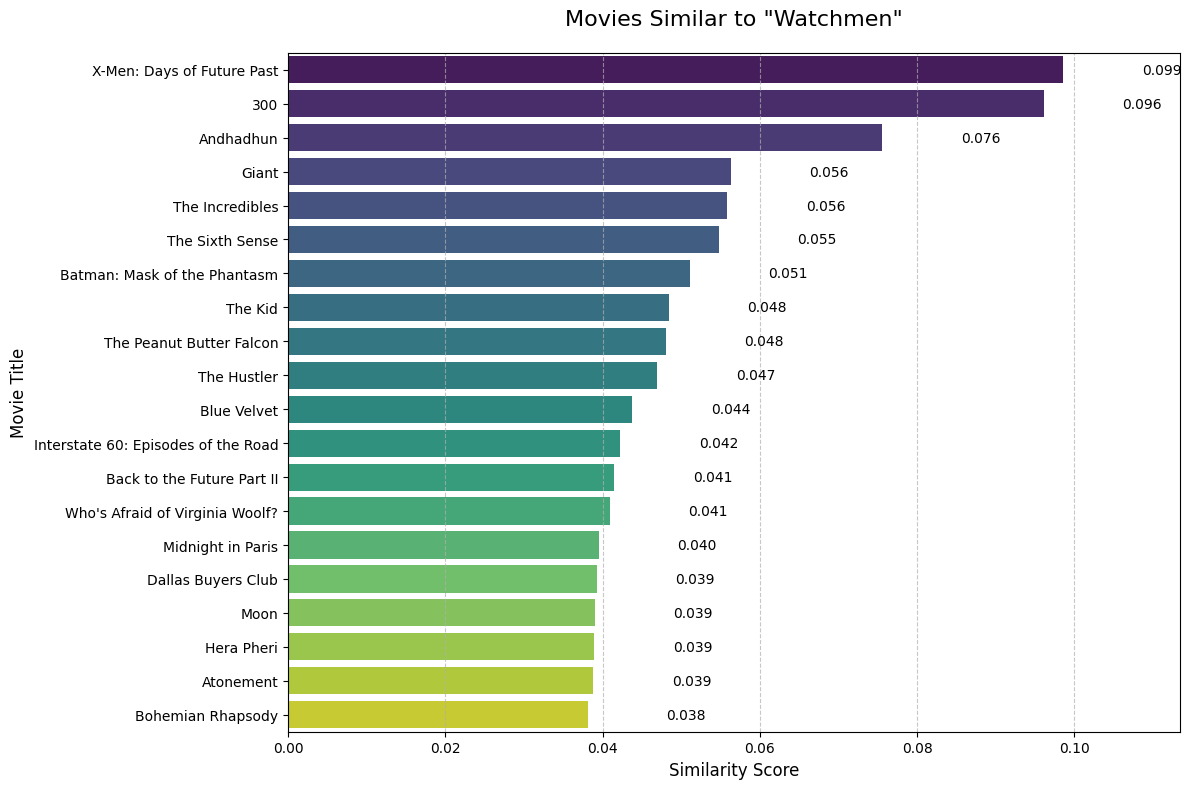

Series_Title  \
479           X-Men: Days of Future Past   
928                                  300   
86                             Andhadhun   
996                                Giant   
378                      The Incredibles   
248                      The Sixth Sense   
665         Batman: Mask of the Phantasm   
127                              The Kid   
884             The Peanut Butter Falcon   
434                          The Hustler   
834                          Blue Velvet   
798  Interstate 60: Episodes of the Road   
675           Back to the Future Part II   
428      Who's Afraid of Virginia Woolf?   
743                    Midnight in Paris   
359                   Dallas Buyers Club   
486                                 Moon   
160                           Hera Pheri   
620                            Atonement   
342                    Bohemian Rhapsody   

                                              Overview            Director  \
479  The X-Men send Wolverine to the past in a desp...        Bryan Singer   
928  King Leonidas of Sparta and a force of 300 men...         Zack Snyder   
86   A series of mysterious events change the life ...     Sriram Raghavan   
996  Sprawling epic covering the life of a Texas ca...      George Stevens   
378  A family of undercover superheroes, while tryi...           Brad Bird   
248  A boy who communicates with spirits seeks the ...  M. Night Shyamalan   
665  Batman is wrongly implicated in a series of mu...       Kevin Altieri   
127  The Tramp cares for an abandoned child, but ev...     Charles Chaplin   
884  Zak runs away from his care home to make his d...        Tyler Nilson   
434  An up-and-coming pool player plays a long-time...       Robert Rossen   
834  The discovery of a severed human ear found in ...         David Lynch   
798  Neal Oliver, a very confused young man and an ...            Bob Gale   
675  After visiting 2015, Marty McFly must repeat h...     Robert Zemeckis   
428  A bitter, aging couple, with the help of alcoh...        Mike Nichols   
743  While on a trip to Paris with his fiancée's fa...         Woody Allen   
359  In 1985 Dallas, electrician and hustler Ron Wo...    Jean-Marc Vallée   
486  Astronaut Sam Bell has a quintessentially pers...        Duncan Jones   
160  Three unemployed men look for answers to all t...        Priyadarshan   
620  Thirteen-year-old fledgling writer Briony Tall...          Joe Wright   
342  The story of the legendary British rock band Q...        Bryan Singer   

                   Star1              Star2                 Star3  \
479      Patrick Stewart       Ian McKellen          Hugh Jackman   
928        Gerard Butler        Lena Headey          David Wenham   
86    Ayushmann Khurrana               Tabu          Radhika Apte   
996     Elizabeth Taylor        Rock Hudson            James Dean   
378      Craig T. Nelson  Samuel L. Jackson          Holly Hunter   
248         Bruce Willis  Haley Joel Osment         Toni Collette   
665        Boyd Kirkland         Frank Paur              Dan Riba   
127      Charles Chaplin     Edna Purviance         Jackie Coogan   
884     Michael Schwartz     Zack Gottsagen             Ann Owens   
434          Paul Newman     Jackie Gleason          Piper Laurie   
834  Isabella Rossellini    Kyle MacLachlan         Dennis Hopper   
798        James Marsden        Gary Oldman          Kurt Russell   
675       Michael J. Fox  Christopher Lloyd          Lea Thompson   
428     Elizabeth Taylor     Richard Burton          George Segal   
743          Owen Wilson     Rachel McAdams           Kathy Bates   
359  Matthew McConaughey    Jennifer Garner            Jared Leto   
486         Sam Rockwell       Kevin Spacey  Dominique McElligott   
160         Akshay Kumar       Sunil Shetty          Paresh Rawal   
620      Keira Knightley       James McAvoy        Brenda Blethyn   
342           Rami Malek       Lucy Boynton            Gwilym Lee   

     Similarit

In [ ]:
run_movie_recommender(df, "Watchmen", 20)

In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie,
    or the top Siamese recommendation if there's no match, or the top content-based
    recommendation if no Siamese recommendation is available.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # If no Siamese recommendation is available, return the top content-based recommendation
    if isinstance(content_based_recommendations, pd.DataFrame) and not content_based_recommendations.empty:
        for _, row in content_based_recommendations.iterrows():
            if row['Series_Title'] != input_movie_name:
                return {
                    "title": row['Series_Title'],
                    "similarity_score": row['Similarity_Score'],
                    "source": "Content-based"
                }

    # Fallback if nothing suitable found
    return None
# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "Watchmen"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'Watchmen':
Recommended movie: The Game
Similarity score: 0.9902
Source: Siamese network


Bad movie

Top 20 movies similar to 'The Martian':
        Series_Title  Similarity_Score
        Interstellar          0.144051
        Blade Runner          0.116454
           Gladiator          0.083089
           True Grit          0.083000
        The Departed          0.081945
 Gake no ue no Ponyo          0.080309
   Good Will Hunting          0.079752
    Dawn of the Dead          0.079482
 Saving Private Ryan          0.076122
The Bourne Supremacy          0.075872
The Bourne Ultimatum          0.074038
                Moon          0.071970
   American Gangster          0.071403
 The Bourne Identity          0.068524
     Black Hawk Down          0.068054
               Alien          0.067457
             Gravity          0.066542
        The Avengers          0.061743
        The Revenant          0.059697
      Ford v Ferrari          0.055845


<ipython-input-11-6f28ab141b3a>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


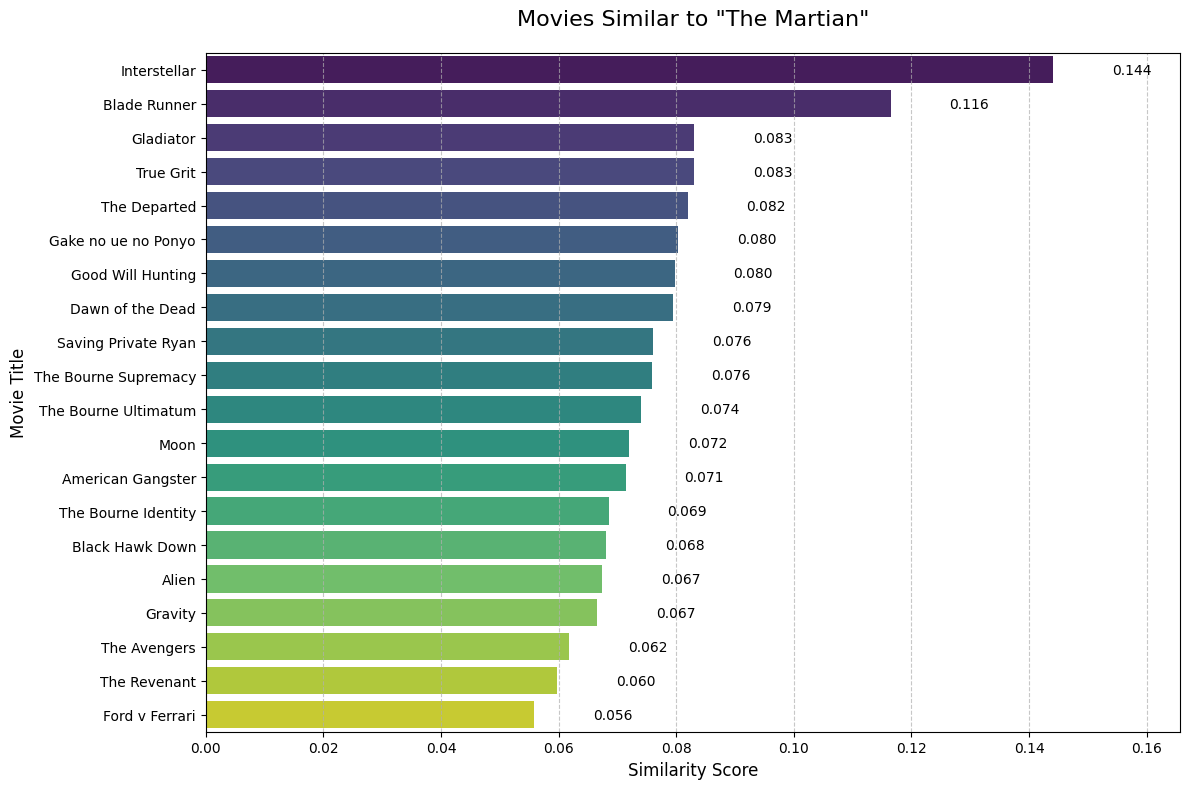

Series_Title                                           Overview  \
21           Interstellar  A team of explorers travel through a wormhole ...   
275          Blade Runner  A blade runner must pursue and terminate four ...   
39              Gladiator  A former Roman General sets out to exact venge...   
904             True Grit  A stubborn teenager enlists the help of a toug...   
37           The Departed  An undercover cop and a mole in the police att...   
756   Gake no ue no Ponyo  A five-year-old boy develops a relationship wi...   
99      Good Will Hunting  Will Hunting, a janitor at M.I.T., has a gift ...   
535      Dawn of the Dead  Following an ever-growing epidemic of zombies ...   
24    Saving Private Ryan  Following the Normandy Landings, a group of U....   
777  The Bourne Supremacy  When Jason Bourne is framed for a CIA operatio...   
362  The Bourne Ultimatum  Jason Bourne dodges a ruthless C.I.A. official...   
486                  Moon  Astronaut Sam Bell has a quintessentially pers...   
622     American Gangster  An outcast New York City cop is charged with b...   
511   The Bourne Identity  A man is picked up by a fishing boat, bullet-r...   
790       Black Hawk Down  160 elite U.S. soldiers drop into Somalia to c...   
75                  Alien  After a space merchant vessel receives an unkn...   
745               Gravity  Two astronauts work together to survive after ...   
357          The Avengers  Earth's mightiest heroes must come together an...   
343          The Revenant  A frontiersman on a fur trading expedition in ...   
217        Ford v Ferrari  American car designer Carroll Shelby and drive...   

                  Director                Star1            Star2  \
21       Christopher Nolan  Matthew McConaughey    Anne Hathaway   
275           Ridley Scott        Harrison Ford     Rutger Hauer   
39            Ridley Scott        Russell Crowe  Joaquin Phoenix   
904             Ethan Coen            Joel Coen     Jeff Bridges   
37         Martin Scorsese    Leonardo DiCaprio       Matt Damon   
756         Hayao Miyazaki       Cate Blanchett       Matt Damon   
99            Gus Van Sant       Robin Williams       Matt Damon   
535       George A. Romero           David Emge        Ken Foree   
24        Steven Spielberg            Tom Hanks       Matt Damon   
777        Paul Greengrass           Matt Damon   Franka Potente   
362        Paul Greengrass           Matt Damon    Edgar Ramírez   
486           Duncan Jones         Sam Rockwell     Kevin Spacey   
622           Ridley Scott    Denzel Washington    Russell Crowe   
511             Doug Liman       Franka Potente       Matt Damon   
790           Ridley Scott        Josh Hartnett    Ewan McGregor   
75            Ridley Scott     Sigourney Weaver     Tom Skerritt   
745         Alfonso Cuarón       Sandra Bullock   George Clooney   
357            Joss Whedon    Robert Downey Jr.      Chris Evans   
343  Alejandro G. Iñárritu    Leonardo DiCaprio        Tom Hardy   
217          James Mangold           Matt Damon   Christian Bale   

                    Star3  Similarity_Score  
21       Jessica Chastain          0.144051  
275            Sean Young          0.116454  
39         Connie Nielsen          0.083089  
904            Matt Damon          0.083000  
37         Jack Nicholson          0.081945  
756           Liam Neeson          0.080309  
99            Ben Affleck          0.079752  
535     Scott H. Reiniger          0.079482  
24           Tom Sizemore          0.076122  
777            Joan Allen          0.075872  
362            Joan Allen          0.074038  
486  Dominique McElligott          0.071970  
622      Chiwetel Ejiofor          0.071403  
511          Chris Cooper          0.068524  
790          Tom Sizemore          0.068054  
75              John Hurt          0.067457  
745             Ed Harris          0.066542  
357    Scarlett Johansson          0.061743  
343          Will Poulter    

In [ ]:
run_movie_recommender(df, "The Martian", 20)

In [ ]:
#Example usage
input_movie_name = "The Martian"
recommended_movies_df = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)
print(recommended_movies_df)

      Series_Title  Cosine Similarity
0      The Martian           1.000000
1     Interstellar           0.952958
2  Children of Men           0.951940


In [ ]:
def get_optimal_recommendation(input_movie_name, df, siamese_network, tokenizer, model):
    """
    Compare recommendations from both approaches and return the first common movie,
    or the top Siamese recommendation if there's no match, or the top content-based
    recommendation if no Siamese recommendation is available.

    Parameters:
    input_movie_name (str): Movie title to get recommendations for
    df (pandas.DataFrame): DataFrame containing movie data
    siamese_network: The trained Siamese neural network
    tokenizer: BERT tokenizer for text processing
    model: BERT model for embeddings

    Returns:
    dict: Recommended movie information
    """
    # Get Siamese network recommendations
    siamese_recommendations = recommend_movies(input_movie_name, df, siamese_network, tokenizer, model)

    # Get content-based recommendations without visualization
    # Prepare features and calculate similarity
    similarity_matrix, indices = prepare_movie_features(df)
    content_based_recommendations = get_recommendations(input_movie_name, similarity_matrix, indices, df, top_n=20)

    # Extract movie titles from both recommendation sets
    siamese_titles = siamese_recommendations['Series_Title'].tolist()

    if isinstance(content_based_recommendations, pd.DataFrame):
        content_based_titles = content_based_recommendations['Series_Title'].tolist()
    else:
        # Handle the case where content-based returns an error message
        content_based_titles = []

    # Find common movies (excluding the input movie itself)
    common_movies = []
    for title in siamese_titles:
        if title in content_based_titles and title != input_movie_name:
            common_movies.append(title)

    # If there are common movies, return the first one
    if common_movies:
        # Get the similarity score from Siamese recommendations
        similarity = siamese_recommendations[siamese_recommendations['Series_Title'] == common_movies[0]]['Cosine Similarity'].values[0]
        return {
            "title": common_movies[0],
            "similarity_score": similarity,
            "source": "Both approaches"
        }

    # If no common movie exists, return the top Siamese recommendation (excluding the input movie)
    for title, similarity in zip(siamese_titles, siamese_recommendations['Cosine Similarity']):
        if title != input_movie_name:
            return {
                "title": title,
                "similarity_score": similarity,
                "source": "Siamese network"
            }

    # If no Siamese recommendation is available, return the top content-based recommendation
    if isinstance(content_based_recommendations, pd.DataFrame) and not content_based_recommendations.empty:
        for _, row in content_based_recommendations.iterrows():
            if row['Series_Title'] != input_movie_name:
                return {
                    "title": row['Series_Title'],
                    "similarity_score": row['Similarity_Score'],
                    "source": "Content-based"
                }

    # Fallback if nothing suitable found
    return None
# Example usage
if __name__ == "__main__":
    # Assume df, siamese_network, tokenizer, and model are already loaded
    movie_query = "The Martian"

    recommendation = get_optimal_recommendation(movie_query, df, siamese_network, tokenizer, model)

    if recommendation:
        print(f"\nOptimal recommendation for '{movie_query}':")
        print(f"Recommended movie: {recommendation['title']}")
        print(f"Similarity score: {recommendation['similarity_score']:.4f}")
        print(f"Source: {recommendation['source']}")
    else:
        print(f"\nNo recommendations available for '{movie_query}'.")


Optimal recommendation for 'The Martian':
Recommended movie: Interstellar
Similarity score: 0.9530
Source: Both approaches
